# IMPORTS:

In [ ]:
!pip install dalex -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.6.0-py3-none-any.whl size=1045995 sha256=5855f9123fe484e3c6086f9f850cd7ddeaf63d4a63e6012d3cf05c8b28aba518
  Stored in directory: /root/.cache/pip/wheels/c8/45/19/f5810bf7c5ff9a476ebd89bb5b81a18ffcdf93931d17dbb0c1
Successfully built dalex


In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=9804a864c063dc8e05b2cdcd475b2f351a47c24a7c0bfe2054df3da037674d39
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
#imports necesarios
import pandas as pd
import numpy as np
from sklearn import svm
from scipy.stats import ttest_rel
from sklearn.svm import LinearSVR, NuSVR
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, median_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, HalvingGridSearchCV, RepeatedKFold
from sklearn.inspection import permutation_importance
from scipy.io.arff import loadarff
import statsmodels.api as sm
from sklearn.utils import resample
import dalex as dx
from sklearn.compose import ColumnTransformer
import seaborn as sns

In [ ]:
# Función para evaluar el signo de los valores
def evaluar_valor(valor):
    if valor >= 0:
        return "Positivo"
    else:
        return "Negativo"

In [ ]:
# Crear las columnas del MultiIndex
columns = pd.MultiIndex.from_tuples([
    ('Breakdown', 'Ranking'), ('Breakdown', 'Signo'),
    ('Shapley', 'Ranking'), ('Shapley', 'Signo'),
    ('Lime', 'Ranking'), ('Lime', 'Signo')
])

# Dataset preprocesado:

In [ ]:
#carga del dataset
data=loadarff("/content/drive/MyDrive/TFM/kitchenham_mod.arff")
df = pd.DataFrame(data[0])

In [ ]:
df.head(10) #comprobar el dataframe

,Project,Client.code,Project.type,Actual.duration,Actual.effort,Adjusted.function.points,First.estimate,First.estimate.method
0,1.0,b'1',b'A',107.0,485.0,101.65,495.0,b'EO'
1,2.0,b'1',b'D',144.0,990.0,57.12,1365.0,b'A'
2,3.0,b'1',b'D',604.0,13635.0,1010.88,8244.0,b'EO'
3,4.0,b'1',b'P',226.0,1576.0,45.60,1595.0,b'D'
4,5.0,b'1',b'D',326.0,3826.0,1022.58,3828.0,b'A'
5,6.0,b'1',b'P',294.0,1079.0,77.04,879.0,b'EO'
6,7.0,b'1',b'A',212.0,2224.0,159.60,2895.0,b'EO'
7,8.0,b'1',b'C',175.0,1698.0,225.54,1800.0,b'A'
8,9.0,b'1',b'Pr',584.0,1173.0,144.72,1160.0,b'EO'
9,10.0,b'1',b'D',171.0,1401.0,84.42,885.0,b'EO'


In [ ]:
df['Client.code'] = df['Client.code'].apply(lambda x: x.decode('utf-8'))
df['Project.type'] = df['Project.type'].apply(lambda x: x.decode('utf-8'))
df['First.estimate.method'] = df['First.estimate.method'].apply(lambda x: x.decode('utf-8'))

In [ ]:
df.head(20) #comprobar el dataframe

,Project,Client.code,Project.type,Actual.duration,Actual.effort,Adjusted.function.points,First.estimate,First.estimate.method
0,1.0,1,A,107.0,485.0,101.65,495.0,EO
1,2.0,1,D,144.0,990.0,57.12,1365.0,A
2,3.0,1,D,604.0,13635.0,1010.88,8244.0,EO
3,4.0,1,P,226.0,1576.0,45.60,1595.0,D
4,5.0,1,D,326.0,3826.0,1022.58,3828.0,A
5,6.0,1,P,294.0,1079.0,77.04,879.0,EO
6,7.0,1,A,212.0,2224.0,159.60,2895.0,EO
7,8.0,1,C,175.0,1698.0,225.54,1800.0,A
8,9.0,1,Pr,584.0,1173.0,144.72,1160.0,EO
9,10.0,1,D,171.0,1401.0,84.42,885.0,EO


In [ ]:
df=df.drop('Project', axis=1) # cumple la funcion de identificador del proyecto, no es util
df=df.drop('Client.code',axis=1) # cumple la funcion de identificador de cliente, no es util
df=df.drop('First.estimate',axis=1) # estimación de esfuerzo, es lo que estudiamos
df=df.drop('First.estimate.method',axis=1) # técnica empleada para estimar el esfuerzo, no es util

In [ ]:
print(df.shape)
#obtener nombre de los atributos
print(list(df))
#obtener lista de atributos sin la variable dependiente
feature_names=list(df)
feature_names.remove('Actual.effort')
print(feature_names)

(145, 4)
['Project.type', 'Actual.duration', 'Actual.effort', 'Adjusted.function.points']
['Project.type', 'Actual.duration', 'Adjusted.function.points']


In [ ]:
#comprobar si existen valores null o ?
print("¿Existen valores nulos?:", df.isnull().values.any())
print("¿Existen valores  '?' ?:", (df == '?').values.any())

¿Existen valores nulos?: False
¿Existen valores  '?' ?: True


In [ ]:
# Como existen valores "?", debo de encontrar en que instancia y atributo
mask = df.isin(["?"])

# Obtener las filas y columnas que contienen valores "?"
filas, columnas = np.where(mask)

# Imprimir la ubicación de los valores "?" e iterar sobre las ubicaciones de los valores "?"
for fila, columna in zip(filas, columnas):
    print("Fila:", fila, " - Columna:", columna)

Fila: 37  - Columna: 0
Fila: 40  - Columna: 0
Fila: 50  - Columna: 0
Fila: 64  - Columna: 0
Fila: 68  - Columna: 0
Fila: 81  - Columna: 0
Fila: 88  - Columna: 0
Fila: 96  - Columna: 0
Fila: 98  - Columna: 0
Fila: 143  - Columna: 0


**VALIDACIÓN CRUZADA PARA COMPROBAR SI ELIMINO LAS INSTANCIAS CON VALORES PERDIDOS:**

In [ ]:
# Todas los valores perdidos pertenecen al atributo Project.type, que es de tipo categorico
# Buscamos la moda
moda = df['Project.type'].mode()[0]
print("La moda del atributo 'Project.type' es: ", moda)

La moda del atributo 'Project.type' es:  P


In [ ]:
# Creo copias del dataframe
df_moda=df.copy()
df_eliminar=df.copy()
print("¿Existen valores  '?' ?:", (df_moda== '?').values.any())

# Sustituir los valores perdidos por la moda
df_moda['Project.type'] = df_moda['Project.type'].replace("?", moda)
print("¿Existen valores  '?' tras sustituir la moda?:", (df_moda == '?').values.any())

# Eliminar las filas con valores perdidos
df_eliminar.replace("?", pd.NA, inplace=True)
df_eliminar = df_eliminar.dropna()
print("¿Existen valores  '?' tras eliminar las instancias?:", (df_eliminar == '?').values.any())

¿Existen valores  '?' ?: True
¿Existen valores  '?' tras sustituir la moda?: False
¿Existen valores  '?' tras eliminar las instancias?: False


In [ ]:
# Debemos de transformar la variable categorica
encoder = OneHotEncoder(sparse_output=False)
cod_moda = encoder.fit_transform(df_moda[['Project.type']])
cod_eliminar = encoder.fit_transform(df_eliminar[['Project.type']])

# Obtener dataframe codificado
df_moda_cod = pd.DataFrame(cod_moda, columns=encoder.get_feature_names_out(['Project.type']))
df_eliminar_cod = pd.DataFrame(cod_eliminar, columns=encoder.get_feature_names_out(['Project.type']))
df_moda_cod

,Project.type_A,Project.type_C,Project.type_D,Project.type_P,Project.type_Pr,Project.type_U
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
140,0.0,0.0,0.0,1.0,0.0,0.0
141,0.0,0.0,0.0,1.0,0.0,0.0
142,0.0,0.0,0.0,1.0,0.0,0.0
143,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df_eliminar_cod

,Project.type_A,Project.type_C,Project.type_D,Project.type_P,Project.type_Pr,Project.type_U
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
130,0.0,0.0,1.0,0.0,0.0,0.0
131,0.0,0.0,0.0,1.0,0.0,0.0
132,0.0,0.0,0.0,1.0,0.0,0.0
133,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# Defino los algoritmos base para evaluar
reg_svr=svm.SVR()
rfr=RandomForestRegressor()
knnr=KNeighborsRegressor()
reg_gbr=GradientBoostingRegressor()
votr=VotingRegressor([('svr',reg_svr),('rf',rfr),('gbr',reg_gbr),('knn',knnr)])
modelos=[reg_svr, rfr, reg_gbr, knnr, votr]

In [ ]:
# Preparando los datos
# Escalado de datos numéricos
x_moda=df_moda[['Actual.duration', 'Adjusted.function.points']].values
y_moda=df_moda['Actual.effort'].values
x_eliminar=df_eliminar[['Actual.duration', 'Adjusted.function.points']].values
y_eliminar=df_eliminar['Actual.effort'].values

alg_escalado = StandardScaler(with_mean=True, with_std=True)

x_moda_escalado = alg_escalado.fit_transform(x_moda)
y_moda=y_moda.reshape(-1,1)
y_moda_escalado = alg_escalado.fit_transform(y_moda)
df_x_moda_transf = pd.DataFrame(x_moda_escalado, columns= ['Actual.duration', 'Adjusted.function.points'])
df_y_moda_transf = pd.DataFrame(y_moda_escalado, columns=['Actual.effort'])
df_data_moda_transf = pd.concat([df_moda_cod, df_x_moda_transf, df_y_moda_transf], axis=1)

x_eliminar_escalado = alg_escalado.fit_transform(x_eliminar)
y_eliminar=y_eliminar.reshape(-1,1)
y_eliminar_escalado = alg_escalado.fit_transform(y_eliminar)
df_x_eliminar_transf = pd.DataFrame(x_eliminar_escalado, columns= ['Actual.duration', 'Adjusted.function.points'])
df_y_eliminar_transf = pd.DataFrame(y_eliminar_escalado, columns=['Actual.effort'])
df_data_eliminar_transf = pd.concat([df_eliminar_cod, df_x_eliminar_transf, df_y_eliminar_transf], axis=1)

In [ ]:
df_data_moda_transf

,Project.type_A,Project.type_C,Project.type_D,Project.type_P,Project.type_Pr,Project.type_U,Actual.duration,Adjusted.function.points,Actual.effort
0,1.0,0.0,0.0,0.0,0.0,0.0,-0.744213,-0.280879,-0.274768
1,0.0,0.0,1.0,0.0,0.0,0.0,-0.467326,-0.310238,-0.221971
2,0.0,0.0,1.0,0.0,0.0,0.0,2.975045,0.318586,1.100057
3,0.0,0.0,0.0,1.0,0.0,0.0,0.146314,-0.317833,-0.160705
4,0.0,0.0,1.0,0.0,0.0,0.0,0.894655,0.326299,0.074531
...,...,...,...,...,...,...,...,...,...
140,0.0,0.0,0.0,1.0,0.0,0.0,0.348366,-0.230474,-0.263477
141,0.0,0.0,0.0,1.0,0.0,0.0,1.485845,-0.294177,-0.293901
142,0.0,0.0,0.0,1.0,0.0,0.0,0.258565,0.373295,-0.050091
143,0.0,0.0,0.0,1.0,0.0,0.0,-0.377525,0.313232,-0.216743


In [ ]:
df_data_eliminar_transf

,Project.type_A,Project.type_C,Project.type_D,Project.type_P,Project.type_Pr,Project.type_U,Actual.duration,Adjusted.function.points,Actual.effort
0,1.0,0.0,0.0,0.0,0.0,0.0,-0.722378,-0.271910,-0.271212
1,0.0,0.0,1.0,0.0,0.0,0.0,-0.437926,-0.300326,-0.220186
2,0.0,0.0,1.0,0.0,0.0,0.0,3.098508,0.308301,1.057504
3,0.0,0.0,0.0,1.0,0.0,0.0,0.192482,-0.307677,-0.160974
4,0.0,0.0,1.0,0.0,0.0,0.0,0.961272,0.315767,0.066373
...,...,...,...,...,...,...,...,...,...
130,0.0,0.0,1.0,0.0,0.0,0.0,-1.237467,0.179634,-0.287783
131,0.0,0.0,0.0,1.0,0.0,0.0,0.400056,-0.223125,-0.260300
132,0.0,0.0,0.0,1.0,0.0,0.0,1.568616,-0.284781,-0.289703
133,0.0,0.0,0.0,1.0,0.0,0.0,0.307801,0.361253,-0.054071


In [ ]:
feature_names=list(df_data_moda_transf)
feature_names.remove('Actual.effort')
print(feature_names)

['Project.type_A', 'Project.type_C', 'Project.type_D', 'Project.type_P', 'Project.type_Pr', 'Project.type_U', 'Actual.duration', 'Adjusted.function.points']


In [ ]:
X_moda = df_data_moda_transf[feature_names]
Y_moda = df_data_moda_transf['Actual.effort']
X_eliminar = df_data_eliminar_transf[feature_names]
Y_eliminar = df_data_eliminar_transf['Actual.effort']

for j in modelos:
  # Realizar validación cruzada con la moda y eliminando las instancias:
  # Con la moda
  cv_scores_moda = cross_val_score(j, X_moda, Y_moda, cv=5, scoring='r2')

  # Eliminando
  cv_scores_eliminar = cross_val_score(j, X_eliminar, Y_eliminar, cv=5, scoring='r2')

  # Calcular el estadístico t y el p-valor
  t_statistic, p_value = ttest_rel(cv_scores_moda, cv_scores_eliminar)

  # Mostrar los resultados
  print("-------------------------------------------------------------------------------------------------------------")
  print("El modelo: ", j)
  print("R2 de validación cruzada (moda):", cv_scores_moda)
  print("R2 de validación cruzada (eliminar):", cv_scores_eliminar)
  print("El R2 medio con la moda es: ", np.mean(cv_scores_moda), "\nEl R2 medio eliminando es: ", np.mean(cv_scores_eliminar))
  if np.mean(cv_scores_moda) > np.mean(cv_scores_eliminar):
    print("La moda mejora el desempeño del modelo, con una diferencia de: ", np.mean(cv_scores_moda)-np.mean(cv_scores_eliminar))
  else:
    print("Eliminar instancias mejora el desempeño del modelo, con una diferencia de: ", np.mean(cv_scores_eliminar)-np.mean(cv_scores_moda))

  print("Estadístico t:", t_statistic)
  print("p-valor:", p_value)

In [ ]:
# Parece que eliminando las instancias obtenemos mejores resultados, aunque es muy pequeña. Por lo tanto, vamos a eliminar las instancias con valores perdidos.

In [ ]:
features=df_eliminar[['Actual.duration', 'Adjusted.function.points']]
features = features.reset_index(drop=True)
print(features.shape)

target=df_eliminar['Actual.effort']
target = target.reset_index(drop=True)
print(target.shape)
print(df_eliminar_cod.shape)
df_final = pd.concat([df_eliminar_cod, features, target], axis=1)

(135, 2)
(135,)
(135, 6)


In [ ]:
df_final

,Project.type_A,Project.type_C,Project.type_D,Project.type_P,Project.type_Pr,Project.type_U,Actual.duration,Adjusted.function.points,Actual.effort
0,1.0,0.0,0.0,0.0,0.0,0.0,107.0,101.65,485.0
1,0.0,0.0,1.0,0.0,0.0,0.0,144.0,57.12,990.0
2,0.0,0.0,1.0,0.0,0.0,0.0,604.0,1010.88,13635.0
3,0.0,0.0,0.0,1.0,0.0,0.0,226.0,45.60,1576.0
4,0.0,0.0,1.0,0.0,0.0,0.0,326.0,1022.58,3826.0
...,...,...,...,...,...,...,...,...,...
130,0.0,0.0,1.0,0.0,0.0,0.0,40.0,809.25,321.0
131,0.0,0.0,0.0,1.0,0.0,0.0,253.0,178.10,593.0
132,0.0,0.0,0.0,1.0,0.0,0.0,405.0,81.48,302.0
133,0.0,0.0,0.0,1.0,0.0,0.0,241.0,1093.86,2634.0


In [ ]:
print(df_final.shape)
#obtener nombre de los atributos
print(list(df_final))
#obtener lista de atributos sin la variable dependiente
feature_names=list(df_final)
feature_names.remove('Actual.effort')
print(feature_names)

(135, 9)
['Project.type_A', 'Project.type_C', 'Project.type_D', 'Project.type_P', 'Project.type_Pr', 'Project.type_U', 'Actual.duration', 'Adjusted.function.points', 'Actual.effort']
['Project.type_A', 'Project.type_C', 'Project.type_D', 'Project.type_P', 'Project.type_Pr', 'Project.type_U', 'Actual.duration', 'Adjusted.function.points']


In [ ]:
#comprobar si existen valores null o ?
print("¿Existen valores nulos?:", df_final.isnull().values.any())
print("¿Existen valores  '?' ?:", (df_final == '?').values.any())

¿Existen valores nulos?: False
¿Existen valores  '?' ?: False


In [ ]:
df_final.info() #comprobar el tipo de variables y su cantidad. Parece que no hay ninguna variable objeto

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Project.type_A            135 non-null    float64
 1   Project.type_C            135 non-null    float64
 2   Project.type_D            135 non-null    float64
 3   Project.type_P            135 non-null    float64
 4   Project.type_Pr           135 non-null    float64
 5   Project.type_U            135 non-null    float64
 6   Actual.duration           135 non-null    float64
 7   Adjusted.function.points  135 non-null    float64
 8   Actual.effort             135 non-null    float64
dtypes: float64(9)
memory usage: 9.6 KB


In [ ]:
df_final.describe() #obtener algunas estadísitcas de cada atributo

,Project.type_A,Project.type_C,Project.type_D,Project.type_P,Project.type_Pr,Project.type_U,Actual.duration,Adjusted.function.points,Actual.effort
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,0.029630,0.014815,0.385185,0.555556,0.007407,0.007407,200.962963,527.751333,3169.125926
std,0.170195,0.121261,0.488451,0.498755,0.086066,0.086066,130.558982,1572.904427,9933.628371
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,18.900000,219.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,121.500000,123.985000,880.500000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,171.000000,258.240000,1557.000000
75%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,240.000000,554.580000,2877.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,946.000000,18137.480000,113930.000000


In [ ]:
correlation_matrix=df_final.corr()
print(correlation_matrix) #coeficientes de correlación

                          Project.type_A  Project.type_C  Project.type_D  \
Project.type_A                  1.000000       -0.021428       -0.138311   
Project.type_C                 -0.021428        1.000000       -0.097063   
Project.type_D                 -0.138311       -0.097063        1.000000   
Project.type_P                 -0.195366       -0.137102       -0.884948   
Project.type_Pr                -0.015095       -0.010593       -0.068377   
Project.type_U                 -0.015095       -0.010593       -0.068377   
Actual.duration                -0.042939       -0.004679        0.074885   
Adjusted.function.points       -0.018363       -0.013460        0.140812   
Actual.effort                  -0.023821       -0.022831        0.141624   

                          Project.type_P  Project.type_Pr  Project.type_U  \
Project.type_A                 -0.195366        -0.015095       -0.015095   
Project.type_C                 -0.137102        -0.010593       -0.010593   
Project.

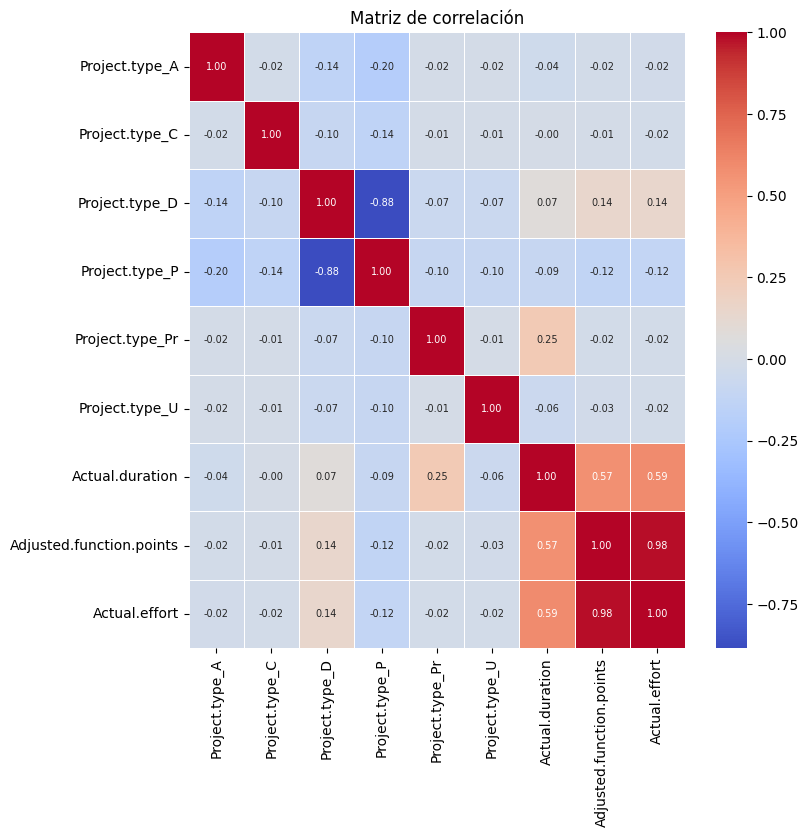

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 7}, linewidths=0.5)
plt.title("Matriz de correlación")
plt.show()

In [ ]:
# Pares de atributos con correlación superior al umbral
high_correlation_pairs = []
atributos = []

# Recorre la matriz de correlación y verifica los valores
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            attribute_pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            high_correlation_pairs.append(attribute_pair)

# Imprime los pares de atributos con correlación superior a 0.8 y crear una lista de atributos sin repetir
for pair in high_correlation_pairs:
    print("Correlación alta entre: ", pair[0], "y", pair[1])
    atributos.extend(pair)

# Eliminar duplicados y mantener el orden
atributos = list(dict.fromkeys(atributos))
atributos.remove('Actual.effort')

# Imprimir la lista de atributos
print("Lista de atributos con correlación alta: ", atributos)

Correlación alta entre:  Project.type_D y Project.type_P
Correlación alta entre:  Adjusted.function.points y Actual.effort
Lista de atributos con correlación alta:  ['Project.type_D', 'Project.type_P', 'Adjusted.function.points']


**VALIDACIÓN CRUZADA PARA COMPROBAR EL EFECTO DE LOS PARÁMETROS:**

In [ ]:
# Defino los algoritmos base para evaluar
reg_svr=svm.SVR()
rfr=RandomForestRegressor()
knnr=KNeighborsRegressor()
reg_gbr=GradientBoostingRegressor()
votr=VotingRegressor([('svr',reg_svr),('rf',rfr),('gbr',reg_gbr),('knn',knnr)])
modelos=[reg_svr, rfr, reg_gbr, knnr, votr]

In [ ]:
for i in atributos:
  print("\n##########################################################################################################")
  print("\nPARA EL ATRIBUTO: ", i)
  # Preparando los datos
  x=df_final[feature_names].values
  y=df_final['Actual.effort'].values

  alg_escalado = StandardScaler(with_mean=True, with_std=True)
  x_escalado = alg_escalado.fit_transform(x)
  y=y.reshape(-1,1)
  y_escalado = alg_escalado.fit_transform(y)

  df_x_transf = pd.DataFrame(x_escalado, columns=feature_names)
  df_y_transf = pd.DataFrame(y_escalado, columns=['Actual.effort'])
  df_data_transf = pd.concat([df_x_transf, df_y_transf], axis=1)

  X=df_data_transf[feature_names]
  Y=df_data_transf['Actual.effort']

  x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=42)
  x_train_sin=x_train.drop(i, axis=1)

  for j in modelos:
    # Realizar validación cruzada con y sin el atributo con alta correlación:
    # Con el atributo
    cv_scores_con = cross_val_score(j, x_train, y_train, cv=5, scoring='neg_mean_squared_error')

    # Sin el atributo
    cv_scores_sin = cross_val_score(j, x_train_sin, y_train, cv=5, scoring='neg_mean_squared_error')

    # Calcular el estadístico t y el p-valor
    t_statistic, p_value = ttest_rel(cv_scores_con, cv_scores_sin)

    # Mostrar los resultados
    print("-------------------------------------------------------------------------------------------------------------")
    print("El modelo: ", j)
    print("MSE de validación cruzada (con atributo):", cv_scores_con)
    print("MSE de validación cruzada (sin atributo):", cv_scores_sin)
    print("El MSE medio con atributo es: ", np.mean(cv_scores_con), "\nEl MSE medio sin atributo es: ", np.mean(cv_scores_sin))
    if np.mean(cv_scores_con) > np.mean(cv_scores_sin):
      print("El atributo mejora el desempeño del modelo, con una diferencia de: ", np.mean(cv_scores_con)-np.mean(cv_scores_sin))
    else:
      print("El atributo no mejora el desempeño del modelo, con una diferencia de: ", np.mean(cv_scores_con)-np.mean(cv_scores_sin))

    print("Estadístico t:", t_statistic)
    print("p-valor:", p_value)


##########################################################################################################

PARA EL ATRIBUTO:  Adjusted.function.points
-------------------------------------------------------------------------------------------------------------
El modelo:  SVR()
MSE de validación cruzada (con atributo): [-0.02879576 -0.02565243 -0.05991022 -0.01858096 -7.24510282]
MSE de validación cruzada (sin atributo): [-0.03665131 -0.03310794 -0.08486408 -0.02671717 -7.28285393]
El MSE medio con atributo es:  -1.47560843826066 
El MSE medio sin atributo es:  -1.492838887555412
El atributo mejora el desempeño del modelo, con una diferencia de:  0.017230449294751926
Estadístico t: 2.819568555581992
p-valor: 0.04784909702400573
-------------------------------------------------------------------------------------------------------------
El modelo:  RandomForestRegressor()
MSE de validación cruzada (con atributo): [-0.02523351 -0.02646434 -0.06995304 -0.02218442 -6.41094341]
MSE de val

In [ ]:
x=df_final[['Actual.duration', 'Adjusted.function.points']].values
y=df_final['Actual.effort'].values
binarios = df_final[['Project.type_A', 'Project.type_C', 'Project.type_D', 'Project.type_P', 'Project.type_Pr', 'Project.type_U']]

# Se realiza una normalización con el objetivo de obtener una distribución de media cero y varianza uno
alg_escalado = StandardScaler(with_mean=True, with_std=True)

x_escalado = alg_escalado.fit_transform(x)
y = y.reshape(-1,1) #es necesario que sea un array 1d
y_escalado = alg_escalado.fit_transform(y)
df_x_transf = pd.DataFrame(x_escalado, columns= ['Actual.duration', 'Adjusted.function.points'])
df_y_transf = pd.DataFrame(y_escalado, columns=['Actual.effort'])
df_data_transf = pd.concat([binarios, df_x_transf, df_y_transf], axis=1)

X=df_data_transf[feature_names]
Y=df_data_transf['Actual.effort']

In [ ]:
# Dividir en conjunto de entrenamiento y test 70%-30%
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=42)

# Algoritmos:

## **SVR:**

**GRIDSEARCHCV:**

In [ ]:
#Búsqueda combinacion de parámetros usando GridSearchCV
modelo=svm.SVR()
params={'kernel':['linear','poly', 'rbf', 'sigmoid'],'degree':[1,2,3,4],'gamma':['auto','scale',0.1],'C':list(np.arange(0.5,21.5,1.0))}
score={'mae':'neg_mean_absolute_error','mse':'neg_mean_squared_error','R2':'r2'}

# Definir la validación cruzada repetida
cv = RepeatedKFold(n_splits=5, n_repeats=3)

grid=GridSearchCV(modelo,params,cv=cv,scoring='r2',verbose=1)
grid.fit(x_train,y_train)

Fitting 15 folds for each of 1008 candidates, totalling 15120 fits


GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=None),
             estimator=SVR(),
             param_grid={'C': [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5,
                               10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5,
                               18.5, 19.5, 20.5],
                         'degree': [1, 2, 3, 4],
                         'gamma': ['auto', 'scale', 0.1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='r2', verbose=1)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

{'C': 0.5, 'degree': 1, 'gamma': 0.1, 'kernel': 'sigmoid'}
SVR(C=0.5, degree=1, gamma=0.1, kernel='sigmoid')
0.18260801407815067


In [ ]:
#definir algoritmo SVR con los mejores parámetros
svr = svm.SVR(C=0.5, degree=1, gamma=0.1, kernel='sigmoid')

In [ ]:
#entrenamiento
modelo_svr=svr.fit(x_train,y_train)

In [ ]:
#predicciones
y_pred = modelo_svr.predict(x_test)

**EVALUACIÓN MODELO:**

In [ ]:
#comprobación resultados
df_pred = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_pred)
desv_pred= np.std(y_pred)
print(f'Desviación Estándar Predicciones: {desv_pred:.2f}')
media_pred= np.mean(y_pred)
print(f'Media Predicciones: {media_pred:.2f}')

       Actual  Predicted
98  -0.124195  -0.228548
67   0.548752   0.127502
105  0.002008  -0.043622
19  -0.297989  -0.253210
42   0.250271  -0.135346
62  -0.091356  -0.153925
12  -0.216750  -0.302212
110 -0.273334  -0.237425
125 -0.188458  -0.191763
128 -0.291320   0.080600
44  -0.190883  -0.200073
40  -0.230088  -0.250141
27  -0.100753  -0.113475
100 -0.144706  -0.259402
119  0.204397   0.138394
31  -0.176232  -0.184167
51   0.095574   0.034605
4    0.066373   0.146299
84   1.263430   0.133967
81  -0.243122  -0.229405
85  -0.019918  -0.212777
26  -0.131470  -0.179026
16  -0.261613  -0.025503
18  -0.281822  -0.253761
10  -0.100955  -0.193204
111 -0.144201  -0.195110
45  -0.288592  -0.238425
11  -0.206848  -0.099153
123 -0.186033  -0.155281
80   0.231073   0.109211
104 -0.221196  -0.271344
83  -0.078422  -0.219235
36   0.347373   0.081526
0   -0.271212  -0.273816
68  -0.129853  -0.203863
56   0.267448   0.067536
24  -0.204726  -0.211739
113  0.554411   0.227811
118  0.210157   0.134428


In [ ]:
#calcular residuos
residuos = y_test - y_pred
print(residuos)

98     0.104354
67     0.421250
105    0.045630
19    -0.044778
42     0.385617
62     0.062569
12     0.085462
110   -0.035909
125    0.003305
128   -0.371920
44     0.009190
40     0.020054
27     0.012722
100    0.114695
119    0.066003
31     0.007935
51     0.060969
4     -0.079926
84     1.129463
81    -0.013717
85     0.192859
26     0.047556
16    -0.236110
18    -0.028061
10     0.092249
111    0.050909
45    -0.050167
11    -0.107695
123   -0.030752
80     0.121862
104    0.050148
83     0.140813
36     0.265847
0      0.002604
68     0.074010
56     0.199913
24     0.007013
113    0.326600
118    0.075729
55    -0.079877
15    -0.045529
Name: Actual.effort, dtype: float64


In [ ]:
#calcular métricas para evaluar el rendimiento del algoritmo
mbe=sm.tools.eval_measures.bias(y_test,y_pred)
print(f'Mean Bias Error: {mbe:.4f}')
mdbe=sm.tools.eval_measures.medianbias(y_test,y_pred)
print(f'Median Bias Error: {mdbe:.4f}')
max=sm.tools.eval_measures.maxabs(y_test,y_pred)
print(f'Maximum Absolute Error: {max:.4f}')
iqr=sm.tools.eval_measures.iqr(y_test,y_pred)
print(f'Interquartile Range of Error: {iqr:.4f}')
stde=sm.tools.eval_measures.stde(y_test,y_pred)
print(f'Standard Deviation of Error: {stde:.4f}')
vare=sm.tools.eval_measures.vare(y_test,y_pred)
print(f'Variance of Error: {vare:.4f}')

print("---------------------------------------------------")
mae = mean_absolute_error(y_test, y_pred)
mdae = median_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmspe = sm.tools.eval_measures.rmspe(y_test,y_pred)
r2=r2_score(y_test, y_pred)
mape= mean_absolute_percentage_error(y_test, y_pred)*100
print(f'Mean absolute error: {mae:.2f}')
print(f'Median absolute error: {mdae:.2f}')
print(f'Mean absolute percentage error: {mape:.2f} %')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'Root mean squared percentage error: {rmspe:.2f} %')
print(f'Coefficient of determination: {r2:.2f}')

print("---------------------------------------------------")
abs_residuos=abs(residuos)
n_residuos=len(residuos)
mre=abs_residuos/y_test
mmre=np.mean(mre)
mdmre=np.median(mre)
print(f'Mean Magnitude of Error: {mmre:.4f}')
print(f'Median Magnitude of Error: {mdmre:.4f}')
count = mre[mre <= 0.25].count()
pred_25 = (count / len(y_pred)) * 100
print(f'Percentage of Relative Error within 25%: {pred_25:.2f} %')

Mean Bias Error: 0.0745
Median Bias Error: 0.0476
Maximum Absolute Error: 1.1295
Interquartile Range of Error: 0.1324
Standard Deviation of Error: 0.2189
Variance of Error: 0.0479
---------------------------------------------------
Mean absolute error: 0.13
Median absolute error: 0.07
Mean absolute percentage error: 127.31 %
Mean squared error: 0.05
Root mean squared error: 0.23
Root mean squared percentage error: 39.12 %
Coefficient of determination: 0.42
---------------------------------------------------
Mean Magnitude of Error: 0.2430
Median Magnitude of Error: -0.1263
Percentage of Relative Error within 25%: 70.73 %


In [ ]:
modelo_svr.score(x_test, y_test)

0.4193011985018892

In [ ]:
modelo_svr.score(x_train, y_train)

-0.041730654451418214

**VALIDACIÓN CRUZADA**

In [ ]:
# El número de folds
n_folds = 5

# Inicializar listas para almacenar las puntuaciones de las métricas. Nos centramos en las métricas comunes en la literatura: R2, MAE, MSE/RMSE, MMRE, PRED(25)
r2_scores = []
mae_scores= []
mse_scores = []
rmse_scores = []
mmre_scores = []
pred_25_scores = []

# Crear los objetos KFold
kf = KFold(n_splits=n_folds)

for train_index, test_index in kf.split(df_data_transf):
    # Dividir los datos en entrenamiento y prueba
    train_data = df_data_transf.iloc[train_index]
    test_data = df_data_transf.iloc[test_index]

    X_train = train_data[feature_names]
    Y_train = train_data['Actual.effort']
    X_test = test_data[feature_names]
    Y_test = test_data['Actual.effort']

    # Entrenar el modelo.
    cv_svr=svm.SVR(C=0.5, degree=1, gamma=0.1, kernel='sigmoid')
    cv_svr.fit(X_train, Y_train)

    # Realizar las predicciones en el conjunto de prueba
    Y_pred = cv_svr.predict(X_test)

    # Cálculo de residuos
    residuos = Y_test - Y_pred

    # Calcular las métricas
    mae = mean_absolute_error(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    rmse = np.sqrt(mse)
    r2=r2_score(Y_test, Y_pred)
    abs_residuos=abs(residuos)
    n_residuos=len(residuos)
    mre=abs_residuos/Y_test
    mmre=np.mean(mre)
    count = mre[mre <= 0.25].count()
    pred_25 = (count / len(Y_pred)) * 100

    # Agregar las puntuaciones a las listas
    r2_scores.append(r2)
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    mmre_scores.append(mmre)
    pred_25_scores.append(pred_25)

# Calcular la media de las puntuaciones
mean_r2 = np.mean(r2_scores)
mean_mae = np.mean(mae_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)
mean_mmre = np.mean(mmre_scores)
mean_pred_25 = np.mean(pred_25_scores)

print(f'CV Mean absolute error: {mean_mae:.2f}')
print(f'CV Mean squared error: {mean_mse:.2f}')
print(f'CV Root mean squared error: {mean_rmse:.2f}')
print(f'CV Coefficient of determination: {mean_r2:.2f}')
print(f'CV Mean Magnitude of Error: {mean_mmre:.4f}')
print(f'CV Percentage of Relative Error within 25%: {mean_pred_25:.2f} %')

CV Mean absolute error: 0.18
CV Mean squared error: 0.68
CV Root mean squared error: 0.50
CV Coefficient of determination: 0.38
CV Mean Magnitude of Error: 0.0221
CV Percentage of Relative Error within 25%: 80.74 %


In [ ]:
cv_results = cross_validate(svr, X, Y, cv=5, scoring=('neg_mean_absolute_error','neg_mean_squared_error', 'neg_root_mean_squared_error','r2'))

In [ ]:
sorted(cv_results.keys())

['fit_time',
 'score_time',
 'test_neg_mean_absolute_error',
 'test_neg_mean_squared_error',
 'test_neg_root_mean_squared_error',
 'test_r2']

In [ ]:
print("Error Absoluto Medio: ", cv_results['test_neg_mean_absolute_error'], " // Con una media de: ", np.mean(cv_results['test_neg_mean_absolute_error']))
print("Error Cuadrático Medio: " , cv_results['test_neg_mean_squared_error'], " // Con una media de: ", np.mean(cv_results['test_neg_mean_squared_error']))
print("Raiz Error Cuadrático Medio: ", cv_results['test_neg_root_mean_squared_error'], " // Con una media de: ", np.mean(cv_results['test_neg_root_mean_squared_error']))
print("Coeficiente de Determinación: ", cv_results['test_r2'], " // Con una media de: ", np.mean(cv_results['test_r2']))

Error Absoluto Medio:  [-0.11229768 -0.09268502 -0.07673874 -0.50938499 -0.13030951]  // Con una media de:  -0.18428318821266587
Error Cuadrático Medio:  [-0.05188881 -0.02111444 -0.01312397 -3.29252493 -0.03094326]  // Con una media de:  -0.6819190811836047
Raiz Error Cuadrático Medio:  [-0.22779114 -0.1453081  -0.11455988 -1.8145316  -0.17590696]  // Con una media de:  -0.4956195371880498
Coeficiente de Determinación:  [0.14853037 0.64075005 0.65395741 0.28761039 0.15845902]  // Con una media de:  0.37786144735507776


In [ ]:
score_result={"Modelo":["SVR"],"MAE":[mean_mae], "MSE":[mean_mse], "RMSE":[mean_rmse], "R2":[mean_r2], "MMRE":[abs(mean_mmre)], "PRED(0.25)":[mean_pred_25/100]}
score_result=pd.DataFrame(score_result)

In [ ]:
score_result

,Modelo,MAE,MSE,RMSE,R2,MMRE,PRED(0.25)
0,SVR,0.184283,0.681919,0.49562,0.377861,0.022127,0.807407


## **RandomForest:**

In [ ]:
modelo=RandomForestRegressor(random_state=42)
params={'n_estimators':[100,200,400],'criterion':["squared_error", "absolute_error"],'min_samples_split':[2,3,4,5],'min_samples_leaf':[1,2,3],'bootstrap':[True,False],'max_depth':[None,1,3]}
score={'mae':'neg_mean_absolute_error','rmse':'neg_root_mean_squared_error','R2':'r2'}

# Definir la validación cruzada repetida
cv = RepeatedKFold(n_splits=5, n_repeats=3)

grid=GridSearchCV(modelo,params,cv=cv,scoring='r2',verbose=1)
grid.fit(x_train,y_train)

Fitting 15 folds for each of 432 candidates, totalling 6480 fits


GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=None),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [None, 1, 3],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [100, 200, 400]},
             scoring='r2', verbose=1)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

{'bootstrap': True, 'criterion': 'absolute_error', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 400}
RandomForestRegressor(criterion='absolute_error', max_depth=3,
                      min_samples_split=4, n_estimators=400, random_state=42)
0.1518735441795776


In [ ]:
rf = RandomForestRegressor(criterion='absolute_error', max_depth=3, min_samples_split=4, n_estimators=400, random_state=42)

In [ ]:
modelo_rf=rf.fit(x_train,y_train)

In [ ]:
y_pred = modelo_rf.predict(x_test)

**EVALUACIÓN MODELO:**

In [ ]:
#comprobación resultados
df_pred = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_pred)
desv_pred= np.std(y_pred)
print(f'Desviación Estándar Predicciones: {desv_pred:.2f}')
media_pred= np.mean(y_pred)
print(f'Media Predicciones: {media_pred:.2f}')

       Actual  Predicted
98  -0.124195  -0.163904
67   0.548752   0.174558
105  0.002008  -0.074091
19  -0.297989  -0.251969
42   0.250271  -0.101474
62  -0.091356  -0.222819
12  -0.216750  -0.243317
110 -0.273334  -0.249514
125 -0.188458  -0.150582
128 -0.291320   0.006944
44  -0.190883  -0.242689
40  -0.230088  -0.250187
27  -0.100753  -0.094575
100 -0.144706  -0.239409
119  0.204397   0.029573
31  -0.176232  -0.232993
51   0.095574  -0.046479
4    0.066373   0.082092
84   1.263430   0.180133
81  -0.243122  -0.236846
85  -0.019918  -0.227380
26  -0.131470  -0.118740
16  -0.261613  -0.066192
18  -0.281822  -0.250444
10  -0.100955  -0.224511
111 -0.144201  -0.226248
45  -0.288592  -0.249170
11  -0.206848  -0.086100
123 -0.186033  -0.107261
80   0.231073   0.000552
104 -0.221196  -0.241494
83  -0.078422  -0.246096
36   0.347373  -0.022156
0   -0.271212  -0.232374
68  -0.129853  -0.242761
56   0.267448  -0.020792
24  -0.204726  -0.243887
113  0.554411   0.104397
118  0.210157   0.042484


In [ ]:
residuos = y_test - y_pred
print(residuos)

98     0.039710
67     0.374194
105    0.076099
19    -0.046020
42     0.351745
62     0.131463
12     0.026567
110   -0.023820
125   -0.037876
128   -0.298264
44     0.051805
40     0.020099
27    -0.006178
100    0.094702
119    0.174825
31     0.056761
51     0.142053
4     -0.015720
84     1.083297
81    -0.006277
85     0.207462
26    -0.012729
16    -0.195421
18    -0.031378
10     0.123556
111    0.082046
45    -0.039421
11    -0.120748
123   -0.078772
80     0.230520
104    0.020298
83     0.167674
36     0.369530
0     -0.038839
68     0.112908
56     0.288240
24     0.039161
113    0.450014
118    0.167673
55     0.073056
15    -0.124999
Name: Actual.effort, dtype: float64


In [ ]:
#calcular métricas para evaluar el rendimiento del algoritmo
mbe=sm.tools.eval_measures.bias(y_test,y_pred)
print(f'Mean Bias Error: {mbe:.4f}')
mdbe=sm.tools.eval_measures.medianbias(y_test,y_pred)
print(f'Median Bias Error: {mdbe:.4f}')
max=sm.tools.eval_measures.maxabs(y_test,y_pred)
print(f'Maximum Absolute Error: {max:.4f}')
iqr=sm.tools.eval_measures.iqr(y_test,y_pred)
print(f'Interquartile Range of Error: {iqr:.4f}')
stde=sm.tools.eval_measures.stde(y_test,y_pred)
print(f'Standard Deviation of Error: {stde:.4f}')
vare=sm.tools.eval_measures.vare(y_test,y_pred)
print(f'Variance of Error: {vare:.4f}')

print("---------------------------------------------------")
mae = mean_absolute_error(y_test, y_pred)
mdae = median_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmspe = sm.tools.eval_measures.rmspe(y_test,y_pred)
r2=r2_score(y_test, y_pred)
mape= mean_absolute_percentage_error(y_test, y_pred)*100
print(f'Mean absolute error: {mae:.2f}')
print(f'Median absolute error: {mdae:.2f}')
print(f'Mean absolute percentage error: {mape:.2f} %')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'Root mean squared percentage error: {rmspe:.2f} %')
print(f'Coefficient of determination: {r2:.2f}')

print("---------------------------------------------------")
abs_residuos=abs(residuos)
n_residuos=len(residuos)
mre=abs_residuos/y_test
mmre=np.mean(mre)
mdmre=np.median(mre)
print(f'Mean Magnitude of Error: {mmre:.4f}')
print(f'Median Magnitude of Error: {mdmre:.4f}')
count = mre[mre <= 0.25].count()
pred_25 = (count / len(y_pred)) * 100
print(f'Percentage of Relative Error within 25%: {pred_25:.2f} %')

Mean Bias Error: 0.0946
Median Bias Error: 0.0518
Maximum Absolute Error: 1.0833
Interquartile Range of Error: 0.1915
Standard Deviation of Error: 0.2181
Variance of Error: 0.0476
---------------------------------------------------
Mean absolute error: 0.15
Median absolute error: 0.08
Mean absolute percentage error: 174.56 %
Mean squared error: 0.06
Root mean squared error: 0.24
Root mean squared percentage error: 61.84 %
Coefficient of determination: 0.39
---------------------------------------------------
Mean Magnitude of Error: 0.6040
Median Magnitude of Error: -0.1366
Percentage of Relative Error within 25%: 73.17 %


In [ ]:
modelo_rf.score(x_test, y_test)

0.4193011985018892

In [ ]:
modelo_rf.score(x_train, y_train)

-0.041730654451418214

**VALIDACIÓN CRUZADA:**

In [ ]:
# El número de folds
n_folds = 5

# Inicializar listas para almacenar las puntuaciones de las métricas. Nos centramos en las métricas comunes en la literatura: R2, MAE, MSE/RMSE, MMRE, PRED(25)
r2_scores = []
mae_scores= []
mse_scores = []
rmse_scores = []
mmre_scores = []
pred_25_scores = []

# Crear los objetos KFold
kf = KFold(n_splits=n_folds)

for train_index, test_index in kf.split(df_data_transf):
    # Dividir los datos en entrenamiento y prueba
    train_data = df_data_transf.iloc[train_index]
    test_data = df_data_transf.iloc[test_index]

    X_train = train_data[feature_names]
    Y_train = train_data['Actual.effort']
    X_test = test_data[feature_names]
    Y_test = test_data['Actual.effort']

    # Entrenar el modelo.
    cv_rf=RandomForestRegressor(criterion='absolute_error', max_depth=3, min_samples_split=4, n_estimators=400, random_state=42)
    cv_rf.fit(X_train, Y_train)

    # Realizar las predicciones en el conjunto de prueba
    Y_pred = cv_rf.predict(X_test)

    # Cálculo de residuos
    residuos = Y_test - Y_pred

    # Calcular las métricas
    mae = mean_absolute_error(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    rmse = np.sqrt(mse)
    r2=r2_score(Y_test, Y_pred)
    abs_residuos=abs(residuos)
    n_residuos=len(residuos)
    mre=abs_residuos/Y_test
    mmre=np.mean(mre)
    count = mre[mre <= 0.25].count()
    pred_25 = (count / len(Y_pred)) * 100

    # Agregar las puntuaciones a las listas
    r2_scores.append(r2)
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    mmre_scores.append(mmre)
    pred_25_scores.append(pred_25)

# Calcular la media de las puntuaciones
mean_r2 = np.mean(r2_scores)
mean_mae = np.mean(mae_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)
mean_mmre = np.mean(mmre_scores)
mean_pred_25 = np.mean(pred_25_scores)

print(f'CV Mean absolute error: {mean_mae:.2f}')
print(f'CV Mean squared error: {mean_mse:.2f}')
print(f'CV Root mean squared error: {mean_rmse:.2f}')
print(f'CV Coefficient of determination: {mean_r2:.2f}')
print(f'CV Mean Magnitude of Error: {mean_mmre:.4f}')
print(f'CV Percentage of Relative Error within 25%: {mean_pred_25:.2f} %')

CV Mean absolute error: 0.20
CV Mean squared error: 0.86
CV Root mean squared error: 0.55
CV Coefficient of determination: 0.32
CV Mean Magnitude of Error: -0.0387
CV Percentage of Relative Error within 25%: 80.74 %


In [ ]:
cv_results = cross_validate(rf, X, Y, cv=5, scoring=('neg_mean_absolute_error','neg_mean_squared_error', 'neg_root_mean_squared_error','r2'))

In [ ]:
sorted(cv_results.keys())

['fit_time',
 'score_time',
 'test_neg_mean_absolute_error',
 'test_neg_mean_squared_error',
 'test_neg_root_mean_squared_error',
 'test_r2']

In [ ]:
print("Error Absoluto Medio: ", cv_results['test_neg_mean_absolute_error'], " // Con una media de: ", np.mean(cv_results['test_neg_mean_absolute_error']))
print("Error Cuadrático Medio: " , cv_results['test_neg_mean_squared_error'], " // Con una media de: ", np.mean(cv_results['test_neg_mean_squared_error']))
print("Raiz Error Cuadrático Medio: ", cv_results['test_neg_root_mean_squared_error'], " // Con una media de: ", np.mean(cv_results['test_neg_root_mean_squared_error']))
print("Coeficiente de Determinación: ", cv_results['test_r2'], " // Con una media de: ", np.mean(cv_results['test_r2']))

Error Absoluto Medio:  [-0.086826   -0.13595274 -0.06932909 -0.5588039  -0.13463669]  // Con una media de:  -0.19710968289249522
Error Cuadrático Medio:  [-0.03688644 -0.03803675 -0.01019867 -4.1944202  -0.03635401]  // Con una media de:  -0.8631792168726518
Raiz Error Cuadrático Medio:  [-0.19205843 -0.19503014 -0.10098849 -2.04802837 -0.19066728]  // Con una media de:  -0.545354540091487
Coeficiente de Determinación:  [0.39471177 0.35282684 0.73108925 0.09247115 0.0113067 ]  // Con una media de:  0.3164811410843016


In [ ]:
score_result=score_result.append({"Modelo":"RandomForest","MAE":mean_mae, "MSE":mean_mse, "RMSE":mean_rmse, "R2":mean_r2, "MMRE":abs(mean_mmre), "PRED(0.25)":mean_pred_25/100}, ignore_index=True)

<ipython-input-54-06667e9c6bdf>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_result=score_result.append({"Modelo":"RandomForest","MAE":mean_mae, "MSE":mean_mse, "RMSE":mean_rmse, "R2":mean_r2, "MMRE":abs(mean_mmre), "PRED(0.25)":mean_pred_25/100}, ignore_index=True)


## **GradientBoostingRegresor:**

In [ ]:
#Búsqueda combinacion de parámetros usando GridSearchCV
modelo=GradientBoostingRegressor(random_state=42)
params={'loss':['squared_error', 'absolute_error'],'learning_rate':[0.1,0.3,0.5],'n_estimators':[100,300,500],'criterion':['friedman_mse','squared_error'],'min_samples_split':[2,3,4],'min_samples_leaf':[1,3,5],'max_depth':[None,1,3]}
score={'mae':'neg_mean_absolute_error','mse':'neg_mean_squared_error','R2':'r2'}

# Definir la validación cruzada repetida
cv = RepeatedKFold(n_splits=5, n_repeats=3)

grid=GridSearchCV(modelo,params,cv=cv,scoring='r2',verbose=1)
grid.fit(x_train,y_train)

Fitting 15 folds for each of 972 candidates, totalling 14580 fits


GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=None),
             estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.1, 0.3, 0.5],
                         'loss': ['squared_error', 'absolute_error'],
                         'max_depth': [None, 1, 3],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 300, 500]},
             scoring='r2', verbose=1)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

{'criterion': 'squared_error', 'learning_rate': 0.3, 'loss': 'absolute_error', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}
GradientBoostingRegressor(criterion='squared_error', learning_rate=0.3,
                          loss='absolute_error', max_depth=None,
                          min_samples_leaf=5, random_state=42)
0.43088204665360663


In [ ]:
gbr=GradientBoostingRegressor(max_depth=None, min_samples_split=3, n_estimators=300, random_state=42)

In [ ]:
modelo_gbr=gbr.fit(x_train,y_train)

In [ ]:
y_pred = modelo_gbr.predict(x_test)

**EVALUACIÓN MODELO:**

In [ ]:
#comprobación resultados
df_pred = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_pred)
desv_pred= np.std(y_pred)
print(f'Desviación Estándar Predicciones: {desv_pred:.2f}')
media_pred= np.mean(y_pred)
print(f'Media Predicciones: {media_pred:.2f}')

       Actual  Predicted
98  -0.124195  -0.216478
67   0.548752   0.550598
105  0.002008  -0.167283
19  -0.297989  -0.280351
42   0.250271  -0.110261
62  -0.091356  -0.246653
12  -0.216750  -0.262901
110 -0.273334  -0.262624
125 -0.188458  -0.077131
128 -0.291320   0.462323
44  -0.190883  -0.287322
40  -0.230088  -0.261161
27  -0.100753  -0.013756
100 -0.144706  -0.220763
119  0.204397   0.278664
31  -0.176232  -0.216734
51   0.095574   0.080961
4    0.066373   0.325875
84   1.263430   0.335700
81  -0.243122  -0.222966
85  -0.019918  -0.219000
26  -0.131470  -0.143844
16  -0.261613  -0.135092
18  -0.281822  -0.255243
10  -0.100955  -0.181645
111 -0.144201  -0.219738
45  -0.288592  -0.261095
11  -0.206848  -0.152450
123 -0.186033  -0.152527
80   0.231073   0.325461
104 -0.221196  -0.207774
83  -0.078422  -0.246406
36   0.347373   0.102384
0   -0.271212  -0.217435
68  -0.129853  -0.287360
56   0.267448  -0.031905
24  -0.204726  -0.246342
113  0.554411   0.095327
118  0.210157   0.278664


In [ ]:
residuos = y_test - y_pred
print(residuos)

98     0.092283
67    -0.001846
105    0.169291
19    -0.017638
42     0.360532
62     0.155298
12     0.046151
110   -0.010711
125   -0.111327
128   -0.753643
44     0.096439
40     0.031073
27    -0.086997
100    0.076056
119   -0.074267
31     0.040502
51     0.014613
4     -0.259502
84     0.927730
81    -0.020156
85     0.199081
26     0.012374
16    -0.126522
18    -0.026579
10     0.080690
111    0.075537
45    -0.027496
11    -0.054398
123   -0.033506
80    -0.094388
104   -0.013422
83     0.167984
36     0.244990
0     -0.053777
68     0.157507
56     0.299354
24     0.041616
113    0.459084
118   -0.068507
55     0.109647
15    -0.089262
Name: Actual.effort, dtype: float64


In [ ]:
#calcular métricas para evaluar el rendimiento del algoritmo
mbe=sm.tools.eval_measures.bias(y_test,y_pred)
print(f'Mean Bias Error: {mbe:.4f}')
mdbe=sm.tools.eval_measures.medianbias(y_test,y_pred)
print(f'Median Bias Error: {mdbe:.4f}')
max=sm.tools.eval_measures.maxabs(y_test,y_pred)
print(f'Maximum Absolute Error: {max:.4f}')
iqr=sm.tools.eval_measures.iqr(y_test,y_pred)
print(f'Interquartile Range of Error: {iqr:.4f}')
stde=sm.tools.eval_measures.stde(y_test,y_pred)
print(f'Standard Deviation of Error: {stde:.4f}')
vare=sm.tools.eval_measures.vare(y_test,y_pred)
print(f'Variance of Error: {vare:.4f}')

print("---------------------------------------------------")
mae = mean_absolute_error(y_test, y_pred)
mdae = median_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmspe = sm.tools.eval_measures.rmspe(y_test,y_pred)
r2=r2_score(y_test, y_pred)
mape= mean_absolute_percentage_error(y_test, y_pred)*100
print(f'Mean absolute error: {mae:.2f}')
print(f'Median absolute error: {mdae:.2f}')
print(f'Mean absolute percentage error: {mape:.2f} %')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'Root mean squared percentage error: {rmspe:.2f} %')
print(f'Coefficient of determination: {r2:.2f}')

print("---------------------------------------------------")
abs_residuos=abs(residuos)
n_residuos=len(residuos)
mre=abs_residuos/y_test
mmre=np.mean(mre)
mdmre=np.median(mre)
print(f'Mean Magnitude of Error: {mmre:.4f}')
print(f'Median Magnitude of Error: {mdmre:.4f}')
count = mre[mre <= 0.25].count()
pred_25 = (count / len(y_pred)) * 100
print(f'Percentage of Relative Error within 25%: {pred_25:.2f} %')

Mean Bias Error: 0.0472
Median Bias Error: 0.0146
Maximum Absolute Error: 0.9277
Interquartile Range of Error: 0.1634
Standard Deviation of Error: 0.2299
Variance of Error: 0.0529
---------------------------------------------------
Mean absolute error: 0.14
Median absolute error: 0.08
Mean absolute percentage error: 292.46 %
Mean squared error: 0.06
Root mean squared error: 0.23
Root mean squared percentage error: 132.95 %
Coefficient of determination: 0.40
---------------------------------------------------
Mean Magnitude of Error: 1.6751
Median Magnitude of Error: -0.1801
Percentage of Relative Error within 25%: 75.61 %


In [ ]:
modelo_gbr.score(x_test, y_test)

0.4017035072494112

In [ ]:
modelo_gbr.score(x_train, y_train)

0.9999999999999999

**VALIDACIÓN CRUZADA:**

In [ ]:
# El número de folds
n_folds = 5

# Inicializar listas para almacenar las puntuaciones de las métricas. Nos centramos en las métricas comunes en la literatura: R2, MAE, MSE/RMSE, MMRE, PRED(25)
r2_scores = []
mae_scores= []
mse_scores = []
rmse_scores = []
mmre_scores = []
pred_25_scores = []

# Crear los objetos KFold
kf = KFold(n_splits=n_folds)

for train_index, test_index in kf.split(df_data_transf):
    # Dividir los datos en entrenamiento y prueba
    train_data = df_data_transf.iloc[train_index]
    test_data = df_data_transf.iloc[test_index]

    X_train = train_data[feature_names]
    Y_train = train_data['Actual.effort']
    X_test = test_data[feature_names]
    Y_test = test_data['Actual.effort']

    # Entrenar el modelo.
    cv_gbr=GradientBoostingRegressor(max_depth=None, min_samples_split=3, n_estimators=300, random_state=42)
    cv_gbr.fit(X_train, Y_train)

    # Realizar las predicciones en el conjunto de prueba
    Y_pred = cv_gbr.predict(X_test)

    # Cálculo de residuos
    residuos = Y_test - Y_pred

    # Calcular las métricas
    mae = mean_absolute_error(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    rmse = np.sqrt(mse)
    r2=r2_score(Y_test, Y_pred)
    abs_residuos=abs(residuos)
    n_residuos=len(residuos)
    mre=abs_residuos/Y_test
    mmre=np.mean(mre)
    count = mre[mre <= 0.25].count()
    pred_25 = (count / len(Y_pred)) * 100

    # Agregar las puntuaciones a las listas
    r2_scores.append(r2)
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    mmre_scores.append(mmre)
    pred_25_scores.append(pred_25)

# Calcular la media de las puntuaciones
mean_r2 = np.mean(r2_scores)
mean_mae = np.mean(mae_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)
mean_mmre = np.mean(mmre_scores)
mean_pred_25 = np.mean(pred_25_scores)

print(f'CV Mean absolute error: {mean_mae:.2f}')
print(f'CV Mean squared error: {mean_mse:.2f}')
print(f'CV Root mean squared error: {mean_rmse:.2f}')
print(f'CV Coefficient of determination: {mean_r2:.2f}')
print(f'CV Mean Magnitude of Error: {mean_mmre:.4f}')
print(f'CV Percentage of Relative Error within 25%: {mean_pred_25:.2f} %')

CV Mean absolute error: 0.19
CV Mean squared error: 0.81
CV Root mean squared error: 0.53
CV Coefficient of determination: 0.33
CV Mean Magnitude of Error: 0.1125
CV Percentage of Relative Error within 25%: 82.22 %


In [ ]:
cv_results = cross_validate(gbr, X, Y, cv=5, scoring=('neg_mean_absolute_error','neg_mean_squared_error', 'neg_root_mean_squared_error','r2'))

In [ ]:
sorted(cv_results.keys())

['fit_time',
 'score_time',
 'test_neg_mean_absolute_error',
 'test_neg_mean_squared_error',
 'test_neg_root_mean_squared_error',
 'test_r2']

In [ ]:
print("Error Absoluto Medio: ", cv_results['test_neg_mean_absolute_error'], " // Con una media de: ", np.mean(cv_results['test_neg_mean_absolute_error']))
print("Error Cuadrático Medio: " , cv_results['test_neg_mean_squared_error'], " // Con una media de: ", np.mean(cv_results['test_neg_mean_squared_error']))
print("Raiz Error Cuadrático Medio: ", cv_results['test_neg_root_mean_squared_error'], " // Con una media de: ", np.mean(cv_results['test_neg_root_mean_squared_error']))
print("Coeficiente de Determinación: ", cv_results['test_r2'], " // Con una media de: ", np.mean(cv_results['test_r2']))

Error Absoluto Medio:  [-0.09031224 -0.09263364 -0.09242865 -0.55947061 -0.13120631]  // Con una media de:  -0.19321029021781125
Error Cuadrático Medio:  [-0.03514777 -0.02131448 -0.01913478 -3.91998409 -0.03833454]  // Con una media de:  -0.8067831307623304
Raiz Error Cuadrático Medio:  [-0.18747737 -0.1459948  -0.13832852 -1.97989497 -0.19579207]  // Con una media de:  -0.5294975478791287
Coeficiente de Determinación:  [ 0.42324255  0.63734654  0.49546895  0.15184972 -0.04255617]  // Con una media de:  0.3330703166882095


In [ ]:
score_result=score_result.append({"Modelo":"GradientBoosting","MAE":mean_mae, "MSE":mean_mse, "RMSE":mean_rmse, "R2":mean_r2, "MMRE":abs(mean_mmre), "PRED(0.25)":mean_pred_25/100}, ignore_index=True)

<ipython-input-62-0f69b13d04a5>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_result=score_result.append({"Modelo":"GradientBoosting","MAE":mean_mae, "MSE":mean_mse, "RMSE":mean_rmse, "R2":mean_r2, "MMRE":abs(mean_mmre), "PRED(0.25)":mean_pred_25/100}, ignore_index=True)


## **Voting:**

In [ ]:
reg_vot=VotingRegressor(estimators=[('rf',rf),('SVR',svr),('gbr',gbr)])

In [ ]:
modelo_voting=reg_vot.fit(x_train,y_train)

In [ ]:
y_pred = modelo_voting.predict(x_test)

**EVALUACIÓN MODELO:**

In [ ]:
#comprobación resultados
df_pred = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_pred)
desv_pred= np.std(y_pred)
print(f'Desviación Estándar Predicciones: {desv_pred:.2f}')
media_pred= np.mean(y_pred)
print(f'Media Predicciones: {media_pred:.2f}')

       Actual  Predicted
98  -0.124195  -0.202977
67   0.548752   0.284219
105  0.002008  -0.094999
19  -0.297989  -0.261843
42   0.250271  -0.115693
62  -0.091356  -0.207799
12  -0.216750  -0.269477
110 -0.273334  -0.249854
125 -0.188458  -0.139825
128 -0.291320   0.183289
44  -0.190883  -0.243361
40  -0.230088  -0.253830
27  -0.100753  -0.073935
100 -0.144706  -0.239858
119  0.204397   0.148877
31  -0.176232  -0.211298
51   0.095574   0.023029
4    0.066373   0.184755
84   1.263430   0.216600
81  -0.243122  -0.229739
85  -0.019918  -0.219719
26  -0.131470  -0.147203
16  -0.261613  -0.075596
18  -0.281822  -0.253149
10  -0.100955  -0.199787
111 -0.144201  -0.213699
45  -0.288592  -0.249564
11  -0.206848  -0.112568
123 -0.186033  -0.138356
80   0.231073   0.145075
104 -0.221196  -0.240204
83  -0.078422  -0.237246
36   0.347373   0.053918
0   -0.271212  -0.241208
68  -0.129853  -0.244661
56   0.267448   0.004946
24  -0.204726  -0.233990
113  0.554411   0.142512
118  0.210157   0.151859


In [ ]:
residuos = y_test - y_pred
print(residuos)

98     0.078782
67     0.264533
105    0.097007
19    -0.036145
42     0.365964
62     0.116443
12     0.052727
110   -0.023480
125   -0.048633
128   -0.474609
44     0.052478
40     0.023742
27    -0.026818
100    0.095151
119    0.055520
31     0.035066
51     0.072545
4     -0.118383
84     1.046830
81    -0.013383
85     0.199800
26     0.015734
16    -0.186018
18    -0.028673
10     0.098832
111    0.069497
45    -0.039028
11    -0.094280
123   -0.047677
80     0.085998
104    0.019008
83     0.158824
36     0.293455
0     -0.030004
68     0.114808
56     0.262502
24     0.029264
113    0.411899
118    0.058298
55     0.034275
15    -0.086597
Name: Actual.effort, dtype: float64


In [ ]:
#calcular métricas para evaluar el rendimiento del algoritmo
mbe=sm.tools.eval_measures.bias(y_test,y_pred)
print(f'Mean Bias Error: {mbe:.4f}')
mdbe=sm.tools.eval_measures.medianbias(y_test,y_pred)
print(f'Median Bias Error: {mdbe:.4f}')
max=sm.tools.eval_measures.maxabs(y_test,y_pred)
print(f'Maximum Absolute Error: {max:.4f}')
iqr=sm.tools.eval_measures.iqr(y_test,y_pred)
print(f'Interquartile Range of Error: {iqr:.4f}')
stde=sm.tools.eval_measures.stde(y_test,y_pred)
print(f'Standard Deviation of Error: {stde:.4f}')
vare=sm.tools.eval_measures.vare(y_test,y_pred)
print(f'Variance of Error: {vare:.4f}')

print("---------------------------------------------------")
mae = mean_absolute_error(y_test, y_pred)
mdae = median_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmspe = sm.tools.eval_measures.rmspe(y_test,y_pred)
r2=r2_score(y_test, y_pred)
mape= mean_absolute_percentage_error(y_test, y_pred)*100
print(f'Mean absolute error: {mae:.2f}')
print(f'Median absolute error: {mdae:.2f}')
print(f'Mean absolute percentage error: {mape:.2f} %')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'Root mean squared percentage error: {rmspe:.2f} %')
print(f'Coefficient of determination: {r2:.2f}')

print("---------------------------------------------------")
abs_residuos=abs(residuos)
n_residuos=len(residuos)
mre=abs_residuos/y_test
mmre=np.mean(mre)
mdmre=np.median(mre)
print(f'Mean Magnitude of Error: {mmre:.4f}')
print(f'Median Magnitude of Error: {mdmre:.4f}')
count = mre[mre <= 0.25].count()
pred_25 = (count / len(y_pred)) * 100
print(f'Percentage of Relative Error within 25%: {pred_25:.2f} %')

Mean Bias Error: 0.0721
Median Bias Error: 0.0525
Maximum Absolute Error: 1.0468
Interquartile Range of Error: 0.1275
Standard Deviation of Error: 0.2137
Variance of Error: 0.0457
---------------------------------------------------
Mean absolute error: 0.13
Median absolute error: 0.07
Mean absolute percentage error: 195.00 %
Mean squared error: 0.05
Root mean squared error: 0.23
Root mean squared percentage error: 77.40 %
Coefficient of determination: 0.45
---------------------------------------------------
Mean Magnitude of Error: 0.8360
Median Magnitude of Error: -0.1352
Percentage of Relative Error within 25%: 70.73 %


In [ ]:
modelo_voting.score(x_test, y_test)

0.45153139263219066

In [ ]:
modelo_voting.score(x_train, y_train)

0.5370085964401223

**VALIDACIÓN CRUZADA:**

In [ ]:
# El número de folds
n_folds = 5

# Inicializar listas para almacenar las puntuaciones de las métricas. Nos centramos en las métricas comunes en la literatura: R2, MAE, MSE/RMSE, MMRE, PRED(25)
r2_scores = []
mae_scores= []
mse_scores = []
rmse_scores = []
mmre_scores = []
pred_25_scores = []

# Crear los objetos KFold
kf = KFold(n_splits=n_folds)

for train_index, test_index in kf.split(df_data_transf):
    # Dividir los datos en entrenamiento y prueba
    train_data = df_data_transf.iloc[train_index]
    test_data = df_data_transf.iloc[test_index]

    X_train = train_data[feature_names]
    Y_train = train_data['Actual.effort']
    X_test = test_data[feature_names]
    Y_test = test_data['Actual.effort']

    # Entrenar el modelo.
    cv_vot=VotingRegressor(estimators=[('rf',rf),('SVR',svr),('gbr',gbr)])
    cv_vot.fit(X_train, Y_train)

    # Realizar las predicciones en el conjunto de prueba
    Y_pred = cv_vot.predict(X_test)

    # Cálculo de residuos
    residuos = Y_test - Y_pred

    # Calcular las métricas
    mae = mean_absolute_error(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    rmse = np.sqrt(mse)
    r2=r2_score(Y_test, Y_pred)
    abs_residuos=abs(residuos)
    n_residuos=len(residuos)
    mre=abs_residuos/Y_test
    mmre=np.mean(mre)
    count = np.sum(mre <= 0.25)
    pred_25 = (count / len(Y_pred)) * 100

    # Agregar las puntuaciones a las listas
    r2_scores.append(r2)
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    mmre_scores.append(mmre)
    pred_25_scores.append(pred_25)

# Calcular la media de las puntuaciones
mean_r2 = np.mean(r2_scores)
mean_mae = np.mean(mae_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)
mean_mmre = np.mean(mmre_scores)
mean_pred_25 = np.mean(pred_25_scores)

print(f'CV Mean absolute error: {mean_mae:.2f}')
print(f'CV Mean squared error: {mean_mse:.2f}')
print(f'CV Root mean squared error: {mean_rmse:.2f}')
print(f'CV Coefficient of determination: {mean_r2:.2f}')
print(f'CV Mean Magnitude of Error: {mean_mmre:.4f}')
print(f'CV Percentage of Relative Error within 25%: {mean_pred_25:.2f} %')

CV Mean absolute error: 0.18
CV Mean squared error: 0.78
CV Root mean squared error: 0.51
CV Coefficient of determination: 0.40
CV Mean Magnitude of Error: 0.0701
CV Percentage of Relative Error within 25%: 82.96 %


In [ ]:
cv_results = cross_validate(reg_vot, X, Y, cv=5, scoring=('neg_mean_absolute_error','neg_mean_squared_error', 'neg_root_mean_squared_error','r2'))

In [ ]:
sorted(cv_results.keys())

['fit_time',
 'score_time',
 'test_neg_mean_absolute_error',
 'test_neg_mean_squared_error',
 'test_neg_root_mean_squared_error',
 'test_r2']

In [ ]:
print("Error Absoluto Medio: ", cv_results['test_neg_mean_absolute_error'], " // Con una media de: ", np.mean(cv_results['test_neg_mean_absolute_error']))
print("Error Cuadrático Medio: " , cv_results['test_neg_mean_squared_error'], " // Con una media de: ", np.mean(cv_results['test_neg_mean_squared_error']))
print("Raiz Error Cuadrático Medio: ", cv_results['test_neg_root_mean_squared_error'], " // Con una media de: ", np.mean(cv_results['test_neg_root_mean_squared_error']))
print("Coeficiente de Determinación: ", cv_results['test_r2'], " // Con una media de: ", np.mean(cv_results['test_r2']))

Error Absoluto Medio:  [-0.09548787 -0.08991524 -0.06675836 -0.51778378 -0.12803142]  // Con una media de:  -0.17959533253287657
Error Cuadrático Medio:  [-0.04353879 -0.01973357 -0.0093112  -3.48713749 -0.03149907]  // Con una media de:  -0.7182440234229619
Raiz Error Cuadrático Medio:  [-0.2086595  -0.14047624 -0.09649455 -1.86738788 -0.17747976]  // Con una media de:  -0.498099585775165
Coeficiente de Determinación:  [0.28555004 0.66424478 0.75448955 0.2455029  0.14334306]  // Con una media de:  0.41862606449327017


In [ ]:
score_result=score_result.append({"Modelo":"Voting","MAE":mean_mae, "MSE":mean_mse, "RMSE":mean_rmse, "R2":mean_r2, "MMRE":abs(mean_mmre), "PRED(0.25)":mean_pred_25/100}, ignore_index=True)

<ipython-input-70-c16958f5272a>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_result=score_result.append({"Modelo":"Voting","MAE":mean_mae, "MSE":mean_mse, "RMSE":mean_rmse, "R2":mean_r2, "MMRE":abs(mean_mmre), "PRED(0.25)":mean_pred_25/100}, ignore_index=True)


# **Explicabilidad:**

In [ ]:
# Crear las columnas del MultiIndex
columns_multi = pd.MultiIndex.from_tuples([
    ('Breakdown', 'Ranking'), ('Breakdown', 'Signo'),
    ('Shapley', 'Ranking'), ('Shapley', 'Signo'),
    ('Lime', 'Ranking'), ('Lime', 'Signo')
])

## **SVR:**

**FEATURE IMPORTANCE:**

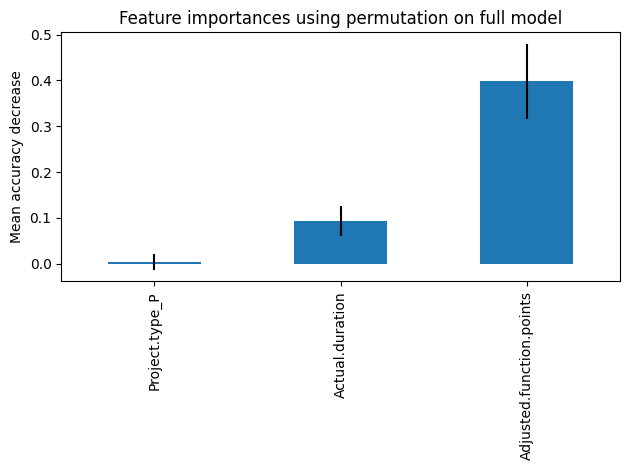

In [ ]:
#uso de permutation importance
permu = permutation_importance(modelo_svr, x_test, y_test, n_repeats=20, random_state=42, n_jobs=2)
permu_importances = pd.Series(permu.importances_mean.round(3), index=feature_names)[permu.importances_mean.round(3) > 0.000]
fig, ax = plt.subplots()
permu_importances.plot.bar(yerr=permu.importances_std[permu.importances_mean.round(3) > 0.000], ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

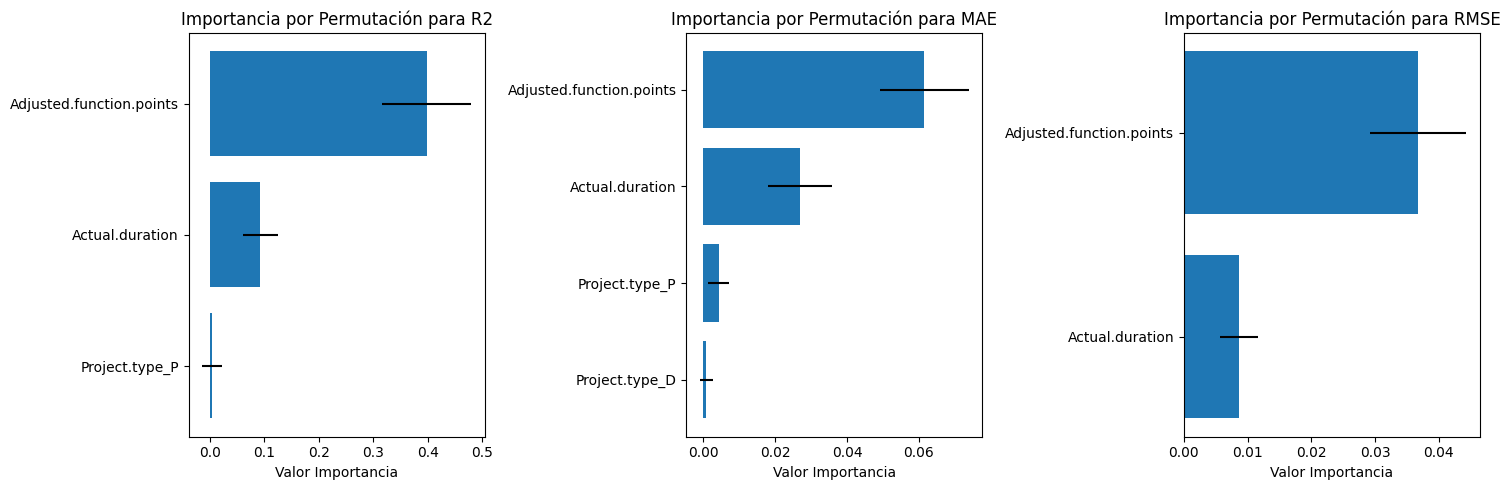

In [ ]:
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']
metric_names = ['R2', 'MAE', 'RMSE']

permu_score = permutation_importance(modelo_svr, x_test, y_test, n_repeats=20, random_state=42, scoring=scoring)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Itera a través de las métricas
for i, metric in enumerate(scoring):
    permu = permu_score[metric]

    # Filtra las características que cumplen la condición
    filtered_indices = [j for j in range(len(permu.importances_mean)) if permu.importances_mean[j].round(3) > 0.000]
    sorted_feature_names = [feature_names[j] for j in filtered_indices]
    importances_mean = permu.importances_mean[filtered_indices]
    importances_std = permu.importances_std[filtered_indices]

    # Ordena los datos por importancia de mayor a menor
    sorted_indices = np.argsort(importances_mean)[::1]
    sorted_feature_names = [sorted_feature_names[j] for j in sorted_indices]
    importances_mean = importances_mean[sorted_indices]
    importances_std = importances_std[sorted_indices]

    # Crea la representación gráfica en el subplot correspondiente
    axs[i].barh(range(len(sorted_feature_names)), importances_mean, xerr=importances_std, align='center')
    axs[i].set_yticks(range(len(sorted_feature_names)))
    axs[i].set_yticklabels(sorted_feature_names)
    axs[i].set_xlabel('Valor Importancia')
    axs[i].set_title(f'Importancia por Permutación para {metric_names[i]}')

# Ajusta los espacios entre subplots y muestra la figura
plt.tight_layout()
plt.show()

In [ ]:
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']

# Crea un diccionario para almacenar los DataFrames
results_global_svr = {}

permu_score = permutation_importance(modelo_svr, x_test, y_test, n_repeats=20, random_state=42, scoring=scoring)
for i, metric in enumerate(scoring):
  permu = permu_score[metric]

  # Filtra las características que cumplen la condición
  filtered_indices = [j for j in range(len(permu.importances_mean)) if permu.importances_mean[j].round(3) > 0.000]
  sorted_feature_names = [feature_names[j] for j in filtered_indices]
  importances_mean = permu.importances_mean[filtered_indices]
  importances_std = permu.importances_std[filtered_indices]



  # Crear un DataFrame con los resultados
  df_exp_global = pd.DataFrame({'Feature': sorted_feature_names,
                       'Importance_Mean': importances_mean,
                       'Importance_Std': importances_std})

  # Ordenar el DataFrame por importance_mean en orden descendente
  df_exp_global = df_exp_global.sort_values(by='Importance_Mean', ascending=False)

  # Asignar el DataFrame al diccionario con el nombre de la métrica
  results_global_svr[f'df_global_{metric_names[i]}'] = df_exp_global

In [ ]:
results_global_svr['df_global_R2']

,Feature,Importance_Mean,Importance_Std
2,Adjusted.function.points,0.398338,0.082096
1,Actual.duration,0.093233,0.032297
0,Project.type_P,0.003917,0.017742


In [ ]:
results_global_svr['df_global_MAE']

,Feature,Importance_Mean,Importance_Std
3,Adjusted.function.points,0.061544,0.012378
2,Actual.duration,0.026957,0.008793
1,Project.type_P,0.004290,0.003005
0,Project.type_D,0.000860,0.001813


In [ ]:
results_global_svr['df_global_RMSE']

,Feature,Importance_Mean,Importance_Std
1,Adjusted.function.points,0.036683,0.007560
0,Actual.duration,0.008586,0.002974


**BREAK-DOWN, SHAP Y LIME:**

In [ ]:
#primero definimos el explainer
exp = dx.Explainer(modelo_svr, x_train, y_train)

Preparation of a new explainer is initiated

  -> data              : 94 rows 8 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 94 values
  -> model_class       : sklearn.svm._classes.SVR (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x78483f08c670> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = -0.371, mean = -0.11, max = 0.37
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.312, mean = 0.126, max = 11.6
  -> model_info        : package sklearn

A new explainer has been created!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


In [ ]:
#Primero obtenemos las instancias con valor estimado máximo, minimo y en la mediana.
max_index = np.argmax(y_pred)
min_index = np.argmin(y_pred)
mediana = np.median(y_pred)
#Encontrar el índice de la instancia cuyo valor estimado está en la mediana
median_index = np.argmin(np.abs(y_pred - mediana))

print("Índice de la instancia del conjunto de entrenamiento con mayor esfuerzo estimado es: ", max_index)
print("El valor máximo obtenido es: ", y_pred[max_index])
print("Ínidce de la instancia del conjunto de entrenamiento con menor esfuerzo estimado es: ", min_index)
print("El valor mínimo obtenido es: ", y_pred[min_index])
print("Índice de la instancia del conjunto de entrenamiento con esfuerzo estimado en la mediana: ", median_index)
print("El valor de la mediana es: ", y_pred[median_index])

Índice de la instancia del conjunto de entrenamiento con mayor esfuerzo estimado es:  37
El valor máximo obtenido es:  0.22781096706356924
Ínidce de la instancia del conjunto de entrenamiento con menor esfuerzo estimado es:  6
El valor mínimo obtenido es:  -0.30221177381499686
Índice de la instancia del conjunto de entrenamiento con esfuerzo estimado en la mediana:  15
El valor de la mediana es:  -0.1841665787739257


In [ ]:
df_instancia_max = x_test.iloc[max_index]
df_instancia_median = x_test.iloc[median_index]
df_instancia_min = x_test.iloc[min_index]

In [ ]:
breakdown_max = exp.predict_parts(df_instancia_max, type="break_down",random_state=42)
breakdown_median = exp.predict_parts(df_instancia_median, type="break_down",random_state=42)
breakdown_min = exp.predict_parts(df_instancia_min, type="break_down",random_state=42)

shap_max = exp.predict_parts(df_instancia_max, type="shap",random_state=42)
shap_median = exp.predict_parts(df_instancia_median, type="shap",random_state=42)
shap_min = exp.predict_parts(df_instancia_min, type="shap",random_state=42)

lime_max = exp.predict_surrogate(df_instancia_max, random_state=42)
lime_median = exp.predict_surrogate(df_instancia_median, random_state=42)
lime_min = exp.predict_surrogate(df_instancia_min, random_state=42)

breakdown_df_max = breakdown_max.result
shap_df_max = shap_max.result
lime_df_max=lime_max.result
breakdown_df_median = breakdown_median.result
shap_df_median = shap_median.result
lime_df_median= lime_median.result
breakdown_df_min = breakdown_min.result
shap_df_min = shap_min.result
lime_df_min = lime_min.result

In [ ]:
breakdown_max.plot()
breakdown_median.plot()
breakdown_min.plot()

In [ ]:
shap_max.plot()
shap_median.plot()
shap_min.plot()

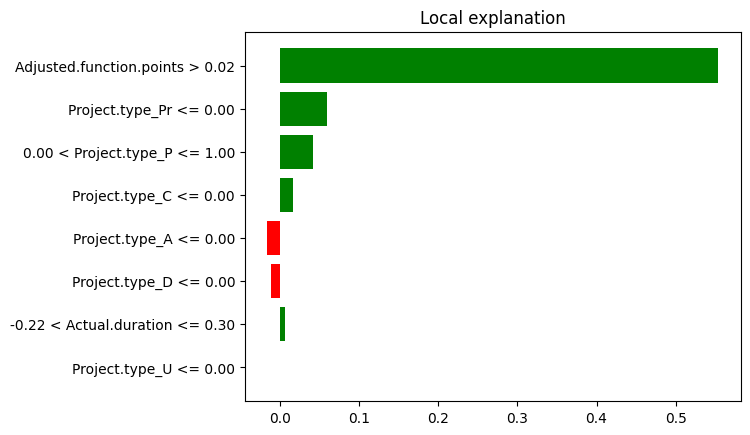

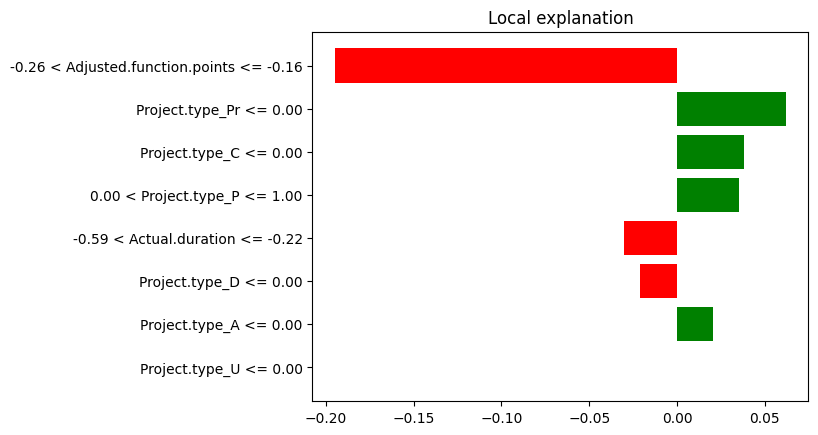

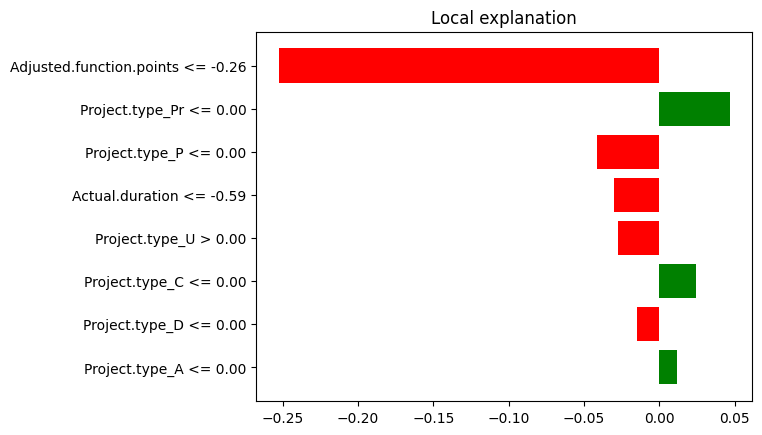

In [ ]:
lime_max.plot()
lime_median.plot()
lime_min.plot()

In [ ]:
lime_max.show_in_notebook()
lime_median.show_in_notebook()
lime_min.show_in_notebook()

### MAX:

In [ ]:
breakdown_df_max = breakdown_df_max.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_max = breakdown_df_max.drop(index=[0, 9])
breakdown_df_max['sign'] = breakdown_df_max['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_max = breakdown_df_max.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_max = shap_df_max.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_max = shap_df_max.tail(8)
shap_df_max['sign'] = shap_df_max['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_max = shap_df_max.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_max["Variable"] = lime_df_max["variable"].str.split(" ").str[0]
lime_df_max["Signo"] = lime_df_max["effect"].apply(evaluar_valor)
lime_df_max = lime_df_max.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_max = lime_df_max.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_max['Ranking'] = breakdown_df_max['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_max.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_max = breakdown_df_max[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_max['Ranking'] = shap_df_max['contribution'].abs().rank(ascending=False).astype(int)
shap_df_max.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_max = shap_df_max[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_max['Ranking'] = lime_df_max['effect'].abs().rank(ascending=False).astype(int)
lime_df_max = lime_df_max.head(5)
lime_df_max = lime_df_max[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_max = breakdown_df_max.drop(columns=['contribution'])
shap_df_max = shap_df_max.drop(columns=['contribution'])
lime_df_max = lime_df_max.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_max = breakdown_df_max.head(5)
breakdown_df_max = breakdown_df_max.reset_index(drop=True)

shap_df_max = shap_df_max.head(5)
shap_df_max = shap_df_max.reset_index(drop=True)

lime_df_max = lime_df_max.reset_index(drop=True)
lime_df_max.at[2, "Variable"] = "Project.type_P"

print(breakdown_df_max)
print(shap_df_max)
print(lime_df_max)

                   Variable  Ranking     Signo
0  Adjusted.function.points        1  Positivo
1           Actual.duration        2  Positivo
2            Project.type_P        3  Positivo
3            Project.type_D        4  Negativo
4            Project.type_C        5  Positivo
                   Variable  Ranking     Signo
0  Adjusted.function.points        1  Positivo
1           Actual.duration        2  Positivo
2            Project.type_P        3  Positivo
3            Project.type_D        4  Negativo
4            Project.type_C        5  Positivo
                   Variable  Ranking     Signo
0  Adjusted.function.points        1  Positivo
1           Project.type_Pr        2  Positivo
2            Project.type_P        3  Positivo
3            Project.type_C        4  Positivo
4            Project.type_A        5  Negativo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_max['Variable'])
shapley_features = list(shap_df_max['Variable'])
lime_features = list(lime_df_max['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_max = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_max['Variable'] = list(all_features)
df_final_max= df_final_max[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_max['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_max[breakdown_df_max['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_max[shap_df_max['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_max[lime_df_max['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_max

['Adjusted.function.points', 'Actual.duration', 'Project.type_P', 'Project.type_D', 'Project.type_C']
['Adjusted.function.points', 'Actual.duration', 'Project.type_P', 'Project.type_D', 'Project.type_C']
['Adjusted.function.points', 'Project.type_Pr', 'Project.type_P', 'Project.type_C', 'Project.type_A']
['Project.type_P', 'Project.type_D', 'Actual.duration', 'Project.type_C', 'Adjusted.function.points', 'Project.type_Pr', 'Project.type_A']


Variable Breakdown           Shapley              Lime  \
                              Ranking     Signo Ranking     Signo Ranking   
0            Project.type_P         3  Positivo       3  Positivo       3   
1            Project.type_D         4  Negativo       4  Negativo       -   
2           Actual.duration         2  Positivo       2  Positivo       -   
3            Project.type_C         5  Positivo       5  Positivo       4   
4  Adjusted.function.points         1  Positivo       1  Positivo       1   
5           Project.type_Pr         -         -       -         -       2   
6            Project.type_A         -         -       -         -       5   

             
      Signo  
0  Positivo  
1         -  
2         -  
3  Positivo  
4  Positivo  
5  Positivo  
6  Negativo

In [ ]:
df_final_max.set_index('Variable', inplace=True)
nuevo_orden = ["Adjusted.function.points", "Actual.duration", "Project.type_P", "Project.type_D", "Project.type_C", "Project.type_Pr", "Project.type_A"]

# Reorganizar el DataFrame según el nuevo orden
df_final_max = df_final_max.reindex(nuevo_orden)

df_final_max

Breakdown           Shapley              Lime  \
                           Ranking     Signo Ranking     Signo Ranking   
Variable                                                                 
Adjusted.function.points         1  Positivo       1  Positivo       1   
Actual.duration                  2  Positivo       2  Positivo       -   
Project.type_P                   3  Positivo       3  Positivo       3   
Project.type_D                   4  Negativo       4  Negativo       -   
Project.type_C                   5  Positivo       5  Positivo       4   
Project.type_Pr                  -         -       -         -       2   
Project.type_A                   -         -       -         -       5   

                                    
                             Signo  
Variable                            
Adjusted.function.points  Positivo  
Actual.duration                  -  
Project.type_P            Positivo  
Project.type_D                   -  
Project.type_C            Positivo  
Project.type_Pr           Positivo  
Project.type_A            Negativo

### MEDIAN:

In [ ]:
breakdown_df_median = breakdown_df_median.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_median = breakdown_df_median.drop(index=[0, 9])
breakdown_df_median['sign'] = breakdown_df_median['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_median = breakdown_df_median.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_median = shap_df_median.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_median = shap_df_median.tail(8)
shap_df_median['sign'] = shap_df_median['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_median = shap_df_median.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_median["Variable"] = lime_df_median["variable"].str.split(" ").str[0]
lime_df_median["Signo"] = lime_df_median["effect"].apply(evaluar_valor)
lime_df_median = lime_df_median.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_median = lime_df_median.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_median['Ranking'] = breakdown_df_median['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_median.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_median = breakdown_df_median[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_median['Ranking'] = shap_df_median['contribution'].abs().rank(ascending=False).astype(int)
shap_df_median.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_median = shap_df_median[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_median['Ranking'] = lime_df_median['effect'].abs().rank(ascending=False).astype(int)
lime_df_median = lime_df_median.head(5)
lime_df_median = lime_df_median[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_median = breakdown_df_median.drop(columns=['contribution'])
shap_df_median = shap_df_median.drop(columns=['contribution'])
lime_df_median = lime_df_median.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_median = breakdown_df_median.head(5)
breakdown_df_median = breakdown_df_median.reset_index(drop=True)

shap_df_median = shap_df_median.head(5)
shap_df_median = shap_df_median.reset_index(drop=True)

lime_df_median = lime_df_median.reset_index(drop=True)
lime_df_median.at[0, "Variable"]="Adjusted.function.points"
lime_df_median.at[3, "Variable"]="Project.type_P"
lime_df_median.at[4, "Variable"]="Actual.duration"

print(breakdown_df_median)
print(shap_df_median)
print(lime_df_median)

                   Variable  Ranking     Signo
0  Adjusted.function.points        1  Negativo
1            Project.type_P        2  Positivo
2            Project.type_D        3  Negativo
3            Project.type_C        4  Positivo
4           Actual.duration        5  Negativo
                   Variable  Ranking     Signo
0  Adjusted.function.points        1  Negativo
1           Actual.duration        2  Negativo
2            Project.type_P        3  Positivo
3            Project.type_D        4  Negativo
4            Project.type_C        5  Positivo
                   Variable  Ranking     Signo
0  Adjusted.function.points        1  Negativo
1           Project.type_Pr        2  Positivo
2            Project.type_C        3  Positivo
3            Project.type_P        4  Positivo
4           Actual.duration        5  Negativo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_median['Variable'])
shapley_features = list(shap_df_median['Variable'])
lime_features = list(lime_df_median['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_median = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_median['Variable'] = list(all_features)
df_final_median= df_final_median[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_median['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_median[breakdown_df_median['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_median[shap_df_median['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_median[lime_df_median['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_median

['Adjusted.function.points', 'Project.type_P', 'Project.type_D', 'Project.type_C', 'Actual.duration']
['Adjusted.function.points', 'Actual.duration', 'Project.type_P', 'Project.type_D', 'Project.type_C']
['Adjusted.function.points', 'Project.type_Pr', 'Project.type_C', 'Project.type_P', 'Actual.duration']
['Project.type_P', 'Project.type_D', 'Actual.duration', 'Project.type_C', 'Adjusted.function.points', 'Project.type_Pr']


Variable Breakdown           Shapley              Lime  \
                              Ranking     Signo Ranking     Signo Ranking   
0            Project.type_P         2  Positivo       3  Positivo       4   
1            Project.type_D         3  Negativo       4  Negativo       -   
2           Actual.duration         5  Negativo       2  Negativo       5   
3            Project.type_C         4  Positivo       5  Positivo       3   
4  Adjusted.function.points         1  Negativo       1  Negativo       1   
5           Project.type_Pr         -         -       -         -       2   

             
      Signo  
0  Positivo  
1         -  
2  Negativo  
3  Positivo  
4  Negativo  
5  Positivo

In [ ]:
df_final_median.set_index('Variable', inplace=True)
nuevo_orden = ["Adjusted.function.points", "Project.type_P", "Project.type_D", "Project.type_C", "Actual.duration", "Project.type_Pr"]

# Reorganizar el DataFrame según el nuevo orden
df_final_median = df_final_median.reindex(nuevo_orden)

df_final_median

Breakdown           Shapley              Lime  \
                           Ranking     Signo Ranking     Signo Ranking   
Variable                                                                 
Adjusted.function.points         1  Negativo       1  Negativo       1   
Project.type_P                   2  Positivo       3  Positivo       4   
Project.type_D                   3  Negativo       4  Negativo       -   
Project.type_C                   4  Positivo       5  Positivo       3   
Actual.duration                  5  Negativo       2  Negativo       5   
Project.type_Pr                  -         -       -         -       2   

                                    
                             Signo  
Variable                            
Adjusted.function.points  Negativo  
Project.type_P            Positivo  
Project.type_D                   -  
Project.type_C            Positivo  
Actual.duration           Negativo  
Project.type_Pr           Positivo

### MIN:

In [ ]:
breakdown_df_min = breakdown_df_min.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_min = breakdown_df_min.drop(index=[0, 9])
breakdown_df_min['sign'] = breakdown_df_min['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_min = breakdown_df_min.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_min = shap_df_min.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_min = shap_df_min.tail(8)
shap_df_min['sign'] = shap_df_min['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_min = shap_df_min.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_min["Variable"] = lime_df_min["variable"].str.split(" ").str[0]
lime_df_min["Signo"] = lime_df_min["effect"].apply(evaluar_valor)
lime_df_min = lime_df_min.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_min = lime_df_min.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_min['Ranking'] = breakdown_df_min['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_min.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_min = breakdown_df_min[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_min['Ranking'] = shap_df_min['contribution'].abs().rank(ascending=False).astype(int)
shap_df_min.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_min = shap_df_min[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_min['Ranking'] = lime_df_min['effect'].abs().rank(ascending=False).astype(int)
lime_df_min = lime_df_min.head(5)
lime_df_min = lime_df_min[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_min = breakdown_df_min.drop(columns=['contribution'])
shap_df_min = shap_df_min.drop(columns=['contribution'])
lime_df_min = lime_df_min.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_min = breakdown_df_min.head(5)
breakdown_df_min = breakdown_df_min.reset_index(drop=True)

shap_df_min = shap_df_min.head(5)
shap_df_min = shap_df_min.reset_index(drop=True)

lime_df_min = lime_df_min.reset_index(drop=True)

print(breakdown_df_min)
print(shap_df_min)
print(lime_df_min)

                   Variable  Ranking     Signo
0  Adjusted.function.points        1  Negativo
1           Actual.duration        2  Negativo
2            Project.type_P        3  Negativo
3            Project.type_D        4  Negativo
4            Project.type_C        5  Positivo
                   Variable  Ranking     Signo
0  Adjusted.function.points        1  Negativo
1           Actual.duration        2  Negativo
2            Project.type_P        3  Negativo
3            Project.type_D        4  Negativo
4            Project.type_C        5  Positivo
                   Variable  Ranking     Signo
0  Adjusted.function.points        1  Negativo
1           Project.type_Pr        2  Positivo
2            Project.type_P        3  Negativo
3           Actual.duration        4  Negativo
4            Project.type_U        5  Negativo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_min['Variable'])
shapley_features = list(shap_df_min['Variable'])
lime_features = list(lime_df_min['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_min = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_min['Variable'] = list(all_features)
df_final_min= df_final_min[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_min['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_min[breakdown_df_min['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_min[shap_df_min['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_min[lime_df_min['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_min

['Adjusted.function.points', 'Actual.duration', 'Project.type_P', 'Project.type_D', 'Project.type_C']
['Adjusted.function.points', 'Actual.duration', 'Project.type_P', 'Project.type_D', 'Project.type_C']
['Adjusted.function.points', 'Project.type_Pr', 'Project.type_P', 'Actual.duration', 'Project.type_U']
['Project.type_P', 'Project.type_U', 'Project.type_D', 'Actual.duration', 'Project.type_C', 'Adjusted.function.points', 'Project.type_Pr']


Variable Breakdown           Shapley              Lime  \
                              Ranking     Signo Ranking     Signo Ranking   
0            Project.type_P         3  Negativo       3  Negativo       3   
1            Project.type_U         -         -       -         -       5   
2            Project.type_D         4  Negativo       4  Negativo       -   
3           Actual.duration         2  Negativo       2  Negativo       4   
4            Project.type_C         5  Positivo       5  Positivo       -   
5  Adjusted.function.points         1  Negativo       1  Negativo       1   
6           Project.type_Pr         -         -       -         -       2   

             
      Signo  
0  Negativo  
1  Negativo  
2         -  
3  Negativo  
4         -  
5  Negativo  
6  Positivo

In [ ]:
df_final_min.set_index('Variable', inplace=True)
nuevo_orden = ["Adjusted.function.points", "Actual.duration", "Project.type_P", "Project.type_D", "Project.type_C", "Project.type_Pr", "Project.type_U"]

# Reorganizar el DataFrame según el nuevo orden
df_final_min = df_final_min.reindex(nuevo_orden)

df_final_min

Breakdown           Shapley              Lime  \
                           Ranking     Signo Ranking     Signo Ranking   
Variable                                                                 
Adjusted.function.points         1  Negativo       1  Negativo       1   
Actual.duration                  2  Negativo       2  Negativo       4   
Project.type_P                   3  Negativo       3  Negativo       3   
Project.type_D                   4  Negativo       4  Negativo       -   
Project.type_C                   5  Positivo       5  Positivo       -   
Project.type_Pr                  -         -       -         -       2   
Project.type_U                   -         -       -         -       5   

                                    
                             Signo  
Variable                            
Adjusted.function.points  Negativo  
Actual.duration           Negativo  
Project.type_P            Negativo  
Project.type_D                   -  
Project.type_C                   -  
Project.type_Pr           Positivo  
Project.type_U            Negativo

### GLOBAL

In [ ]:
ranking_valores = {
    'Breakdown': [],
    'Shapley': [],
    'Lime': []
}

# Recorre los DataFrames y almacena los pares de valores por técnica
for tecnica in ranking_valores:
    for caracteristica in df_final_max.index:
        ranking = df_final_max[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

    for caracteristica in df_final_median.index:
        ranking = df_final_median[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

    for caracteristica in df_final_min.index:
        ranking = df_final_min[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

# Calcula el ranking medio por técnica y característica
ranking_medio = {
    'Breakdown': {},
    'Shapley': {},
    'Lime': {}
}

for tecnica, ranking_values in ranking_valores.items():
    for caracteristica, ranking in ranking_values:
        if caracteristica not in ranking_medio[tecnica]:
            ranking_medio[tecnica][caracteristica] = [ranking]
        else:
            ranking_medio[tecnica][caracteristica].append(ranking)

for tecnica, ranking_values in ranking_medio.items():
    for caracteristica in ranking_values:
        ranking_medio[tecnica][caracteristica] = sum(ranking_values[caracteristica]) / len(ranking_values[caracteristica])


# Ahora el conteo de apariciones por característica y técnica
apariciones_count = {
    'Breakdown': {},
    'Shapley': {},
    'Lime': {}
}

for tecnica, ranking_values in ranking_valores.items():
    for caracteristica, _ in ranking_values:
        if caracteristica not in apariciones_count[tecnica]:
            apariciones_count[tecnica][caracteristica] = 1
        else:
            apariciones_count[tecnica][caracteristica] += 1

# Tengo los valores, los conteos de apariciones y los ranking medios por técnica en los respectivos diccionarios
print(ranking_valores)
print(apariciones_count)
print(ranking_medio)

{'Breakdown': [('Adjusted.function.points', 1), ('Actual.duration', 2), ('Project.type_P', 3), ('Project.type_D', 4), ('Project.type_C', 5), ('Adjusted.function.points', 1), ('Project.type_P', 2), ('Project.type_D', 3), ('Project.type_C', 4), ('Actual.duration', 5), ('Adjusted.function.points', 1), ('Actual.duration', 2), ('Project.type_P', 3), ('Project.type_D', 4), ('Project.type_C', 5)], 'Shapley': [('Adjusted.function.points', 1), ('Actual.duration', 2), ('Project.type_P', 3), ('Project.type_D', 4), ('Project.type_C', 5), ('Adjusted.function.points', 1), ('Project.type_P', 3), ('Project.type_D', 4), ('Project.type_C', 5), ('Actual.duration', 2), ('Adjusted.function.points', 1), ('Actual.duration', 2), ('Project.type_P', 3), ('Project.type_D', 4), ('Project.type_C', 5)], 'Lime': [('Adjusted.function.points', 1), ('Project.type_P', 3), ('Project.type_C', 4), ('Project.type_Pr', 2), ('Project.type_A', 5), ('Adjusted.function.points', 1), ('Project.type_P', 4), ('Project.type_C', 3), (

In [ ]:
# Lista de técnicas
techniques = ['Breakdown', 'Shapley', 'Lime']

# Diccionario para almacenar los datos
data_dict = {}

# Crear una lista de todas las características
all_caract = list(set().union(*[set(ranking_medio[technique]) for technique in techniques]))

# Recorrer las técnicas y las características
for technique in techniques:
    caract = list(ranking_medio[technique].keys())
    rank = [ranking_medio[technique].get(c, "-") for c in all_caract]
    apar = [apariciones_count[technique].get(c, "-") for c in all_caract]

    # Agregar los datos al diccionario
    data_dict[(technique, "Ranking Medio")] = rank
    data_dict[(technique, "Conteo")] = apar

# Crear el DataFrame resumen
df_resumen_svr = pd.DataFrame(data_dict, index=all_caract)

df_resumen_svr

Breakdown              Shapley         \
                         Ranking Medio Conteo Ranking Medio Conteo   
Project.type_A                       -      -             -      -   
Project.type_Pr                      -      -             -      -   
Adjusted.function.points           1.0      3           1.0      3   
Project.type_C                4.666667      3           5.0      3   
Actual.duration                    3.0      3           2.0      3   
Project.type_D                3.666667      3           4.0      3   
Project.type_U                       -      -             -      -   
Project.type_P                2.666667      3           3.0      3   

                                  Lime         
                         Ranking Medio Conteo  
Project.type_A                     5.0      1  
Project.type_Pr                    2.0      3  
Adjusted.function.points           1.0      3  
Project.type_C                     3.5      2  
Actual.duration                    4.5      2  
Project.type_D                       -      -  
Project.type_U                     5.0      1  
Project.type_P                3.333333      3

In [ ]:
# Calcular el ranking medio general omitiendo los valores "-"
df_resumen_svr[("General", "Ranking")] = df_resumen_svr[[(tech, "Ranking Medio") for tech in techniques]].replace('-', np.nan).mean(axis=1)

# Calcular la suma total de apariciones omitiendo los valores "-"
df_resumen_svr[("General", "Conteo Total")] = df_resumen_svr[[(tech, "Conteo") for tech in techniques]].replace('-', 0).sum(axis=1)

# Mostrar el DataFrame resumen actualizado
df_resumen_svr

Breakdown              Shapley         \
                         Ranking Medio Conteo Ranking Medio Conteo   
Project.type_A                       -      -             -      -   
Project.type_Pr                      -      -             -      -   
Adjusted.function.points           1.0      3           1.0      3   
Project.type_C                4.666667      3           5.0      3   
Actual.duration                    3.0      3           2.0      3   
Project.type_D                3.666667      3           4.0      3   
Project.type_U                       -      -             -      -   
Project.type_P                2.666667      3           3.0      3   

                                  Lime          General               
                         Ranking Medio Conteo   Ranking Conteo Total  
Project.type_A                     5.0      1  5.000000            1  
Project.type_Pr                    2.0      3  2.000000            3  
Adjusted.function.points           1.0      3  1.000000            9  
Project.type_C                     3.5      2  4.388889            8  
Actual.duration                    4.5      2  3.166667            8  
Project.type_D                       -      -  3.833333            6  
Project.type_U                     5.0      1  5.000000            1  
Project.type_P                3.333333      3  3.000000            9

In [ ]:
# Obtener el número de características
num_caract = df_resumen_svr.shape[0]

# Calcular el peso para el ranking y apariciones
df_resumen_svr[("General", "Peso Rango")] = 1 - ((df_resumen_svr[("General", "Ranking")].rank(ascending=True) - 1) / num_caract)
df_resumen_svr[("General", "Peso Conteo")] = df_resumen_svr[("General", "Conteo Total")].rank(ascending=True) / num_caract

# Calcular el puntaje final como suma de los pesos
df_resumen_svr[("General", "Puntaje")] = df_resumen_svr[("General", "Peso Rango")] + df_resumen_svr[("General", "Peso Conteo")]
df_resumen_svr[("General", "Ranking")] = df_resumen_svr[("General", "Puntaje")].rank(ascending=False, method="min")

# Eliminar la subcolumnas innecesarias
df_resumen_svr.drop("Peso Rango", axis=1, level=1, inplace=True)
df_resumen_svr.drop("Peso Conteo", axis=1, level=1, inplace=True)
df_resumen_svr.drop("Puntaje", axis=1, level=1, inplace=True)

df_resumen_svr

Breakdown              Shapley         \
                         Ranking Medio Conteo Ranking Medio Conteo   
Project.type_A                       -      -             -      -   
Project.type_Pr                      -      -             -      -   
Adjusted.function.points           1.0      3           1.0      3   
Project.type_C                4.666667      3           5.0      3   
Actual.duration                    3.0      3           2.0      3   
Project.type_D                3.666667      3           4.0      3   
Project.type_U                       -      -             -      -   
Project.type_P                2.666667      3           3.0      3   

                                  Lime        General               
                         Ranking Medio Conteo Ranking Conteo Total  
Project.type_A                     5.0      1     7.0            1  
Project.type_Pr                    2.0      3     4.0            3  
Adjusted.function.points           1.0      3     1.0            9  
Project.type_C                     3.5      2     5.0            8  
Actual.duration                    4.5      2     3.0            8  
Project.type_D                       -      -     6.0            6  
Project.type_U                     5.0      1     7.0            1  
Project.type_P                3.333333      3     2.0            9

In [ ]:
# Obtener las columnas actuales del DataFrame
columns = df_resumen_svr.columns

# Extraer las columnas de "General" y sus subcolumnas
general_columns = columns.get_level_values(0) == "General"

# Crear una lista con las subcolumnas de "General"
general_subcolumns = [("General", "Ranking"), ("General", "Conteo Total")]

# Crear una lista con las subcolumnas asociadas a las técnicas
technique_subcolumns = list(columns[~general_columns])

# Reorganizar las columnas para mover "General" al principio
new_columns = general_subcolumns + technique_subcolumns

# Crear un nuevo DataFrame con las columnas reorganizadas
df_resumen_svr = df_resumen_svr[new_columns]

In [ ]:
df_resumen_svr.sort_values(by=("General", "Ranking"), ascending=True, inplace=True)

# Formatear los valores
for tech in techniques:
    df_resumen_svr[(tech, "Ranking Medio")] = df_resumen_svr[(tech, "Ranking Medio")].apply(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)

df_resumen_svr

General                  Breakdown         \
                         Ranking Conteo Total Ranking Medio Conteo   
Adjusted.function.points     1.0            9          1.00      3   
Project.type_P               2.0            9          2.67      3   
Actual.duration              3.0            8          3.00      3   
Project.type_Pr              4.0            3             -      -   
Project.type_C               5.0            8          4.67      3   
Project.type_D               6.0            6          3.67      3   
Project.type_A               7.0            1             -      -   
Project.type_U               7.0            1             -      -   

                               Shapley                 Lime         
                         Ranking Medio Conteo Ranking Medio Conteo  
Adjusted.function.points          1.00      3          1.00      3  
Project.type_P                    3.00      3          3.33      3  
Actual.duration                   2.00      3          4.50      2  
Project.type_Pr                      -      -          2.00      3  
Project.type_C                    5.00      3          3.50      2  
Project.type_D                    4.00      3             -      -  
Project.type_A                       -      -          5.00      1  
Project.type_U                       -      -          5.00      1

## **RandomForest:**

**FEATURE IMPORTANCE:**

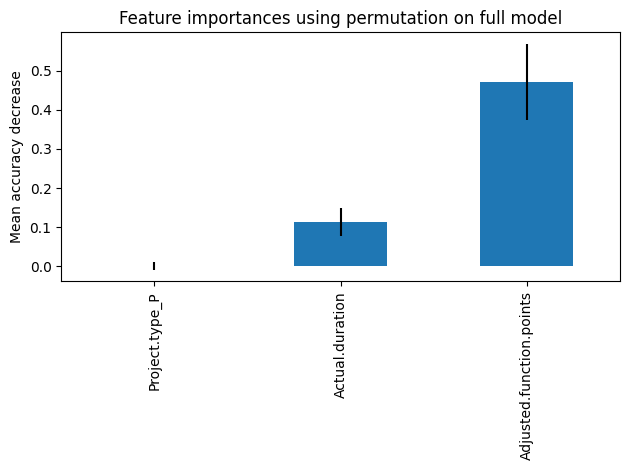

In [ ]:
#uso de permutation importance
permu = permutation_importance(modelo_rf, x_test, y_test, n_repeats=20, random_state=42, n_jobs=2)
permu_importances = pd.Series(permu.importances_mean.round(3), index=feature_names)[permu.importances_mean.round(3) > 0.000]
fig, ax = plt.subplots()
permu_importances.plot.bar(yerr=permu.importances_std[permu.importances_mean.round(3) > 0.000], ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

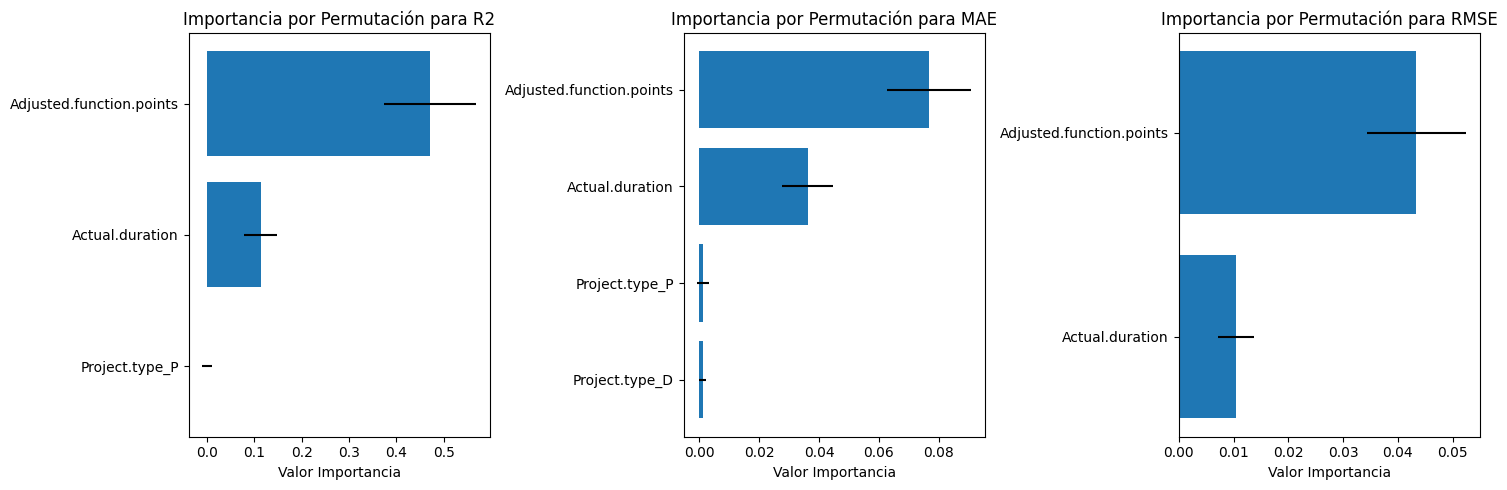

In [ ]:
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']
metric_names = ['R2', 'MAE', 'RMSE']

permu_score = permutation_importance(modelo_rf, x_test, y_test, n_repeats=20, random_state=42, scoring=scoring)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Itera a través de las métricas
for i, metric in enumerate(scoring):
    permu = permu_score[metric]

    # Filtra las características que cumplen la condición
    filtered_indices = [j for j in range(len(permu.importances_mean)) if permu.importances_mean[j].round(3) > 0.000]
    sorted_feature_names = [feature_names[j] for j in filtered_indices]
    importances_mean = permu.importances_mean[filtered_indices]
    importances_std = permu.importances_std[filtered_indices]

    # Ordena los datos por importancia de mayor a menor
    sorted_indices = np.argsort(importances_mean)[::1]
    sorted_feature_names = [sorted_feature_names[j] for j in sorted_indices]
    importances_mean = importances_mean[sorted_indices]
    importances_std = importances_std[sorted_indices]

    # Crea la representación gráfica en el subplot correspondiente
    axs[i].barh(range(len(sorted_feature_names)), importances_mean, xerr=importances_std, align='center')
    axs[i].set_yticks(range(len(sorted_feature_names)))
    axs[i].set_yticklabels(sorted_feature_names)
    axs[i].set_xlabel('Valor Importancia')
    axs[i].set_title(f'Importancia por Permutación para {metric_names[i]}')

# Ajusta los espacios entre subplots y muestra la figura
plt.tight_layout()
plt.show()

In [ ]:
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']

# Crea un diccionario para almacenar los DataFrames
results_global_rf = {}

permu_score = permutation_importance(modelo_rf, x_test, y_test, n_repeats=20, random_state=42, scoring=scoring)
for i, metric in enumerate(scoring):
  permu = permu_score[metric]

  # Filtra las características que cumplen la condición
  filtered_indices = [j for j in range(len(permu.importances_mean)) if permu.importances_mean[j].round(3) > 0.000]
  sorted_feature_names = [feature_names[j] for j in filtered_indices]
  importances_mean = permu.importances_mean[filtered_indices]
  importances_std = permu.importances_std[filtered_indices]



  # Crear un DataFrame con los resultados
  df_exp_global = pd.DataFrame({'Feature': sorted_feature_names,
                       'Importance_Mean': importances_mean,
                       'Importance_Std': importances_std})

  # Ordenar el DataFrame por importance_mean en orden descendente
  df_exp_global = df_exp_global.sort_values(by='Importance_Mean', ascending=False)

  # Asignar el DataFrame al diccionario con el nombre de la métrica
  results_global_rf[f'df_global_{metric_names[i]}'] = df_exp_global

In [ ]:
results_global_rf['df_global_R2']

,Feature,Importance_Mean,Importance_Std
2,Adjusted.function.points,0.470989,0.097558
1,Actual.duration,0.113471,0.035551
0,Project.type_P,0.000613,0.009981


In [ ]:
results_global_rf['df_global_MAE']

,Feature,Importance_Mean,Importance_Std
3,Adjusted.function.points,0.076727,0.014142
2,Actual.duration,0.036235,0.008600
1,Project.type_P,0.001331,0.001929
0,Project.type_D,0.001168,0.001101


In [ ]:
results_global_rf['df_global_RMSE']

,Feature,Importance_Mean,Importance_Std
1,Adjusted.function.points,0.043374,0.008984
0,Actual.duration,0.010450,0.003274


**BREAK-DOWN, SHAP Y LIME:**

In [ ]:
#primero definimos el explainer
exp = dx.Explainer(modelo_rf, x_train, y_train)

Preparation of a new explainer is initiated

  -> data              : 94 rows 8 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 94 values
  -> model_class       : sklearn.ensemble._forest.RandomForestRegressor (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x78483f08c670> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = -0.251, mean = -0.051, max = 6.71
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.466, mean = 0.067, max = 4.48
  -> model_info        : package sklearn

A new explainer has been created!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
#Primero obtenemos las instancias con valor estimado máximo, minimo y en la mediana.
max_index = np.argmax(y_pred)
min_index = np.argmin(y_pred)
mediana = np.median(y_pred)
#Encontrar el índice de la instancia cuyo valor estimado está en la mediana
median_index = np.argmin(np.abs(y_pred - mediana))

print("Índice de la instancia del conjunto de entrenamiento con mayor esfuerzo estimado es: ", max_index)
print("El valor máximo obtenido es: ", y_pred[max_index])
print("Ínidce de la instancia del conjunto de entrenamiento con menor esfuerzo estimado es: ", min_index)
print("El valor mínimo obtenido es: ", y_pred[min_index])
print("Índice de la instancia del conjunto de entrenamiento con esfuerzo estimado en la mediana: ", median_index)
print("El valor de la mediana es: ", y_pred[median_index])

Índice de la instancia del conjunto de entrenamiento con mayor esfuerzo estimado es:  18
El valor máximo obtenido es:  0.18013256303119818
Ínidce de la instancia del conjunto de entrenamiento con menor esfuerzo estimado es:  3
El valor mínimo obtenido es:  -0.25196894907307155
Índice de la instancia del conjunto de entrenamiento con esfuerzo estimado en la mediana:  0
El valor de la mediana es:  -0.16390447365192617


In [ ]:
df_instancia_max = x_test.iloc[max_index]
df_instancia_median = x_test.iloc[median_index]
df_instancia_min = x_test.iloc[min_index]

In [ ]:
breakdown_max = exp.predict_parts(df_instancia_max, type="break_down",random_state=42)
breakdown_median = exp.predict_parts(df_instancia_median, type="break_down",random_state=42)
breakdown_min = exp.predict_parts(df_instancia_min, type="break_down",random_state=42)

shap_max = exp.predict_parts(df_instancia_max, type="shap",random_state=42)
shap_median = exp.predict_parts(df_instancia_median, type="shap",random_state=42)
shap_min = exp.predict_parts(df_instancia_min, type="shap",random_state=42)

lime_max = exp.predict_surrogate(df_instancia_max, random_state=42)
lime_median = exp.predict_surrogate(df_instancia_median, random_state=42)
lime_min = exp.predict_surrogate(df_instancia_min, random_state=42)

breakdown_df_max = breakdown_max.result
shap_df_max = shap_max.result
lime_df_max=lime_max.result
breakdown_df_median = breakdown_median.result
shap_df_median = shap_median.result
lime_df_median= lime_median.result
breakdown_df_min = breakdown_min.result
shap_df_min = shap_min.result
lime_df_min = lime_min.result

In [ ]:
breakdown_max.plot()
breakdown_median.plot()
breakdown_min.plot()

In [ ]:
shap_max.plot()
shap_median.plot()
shap_min.plot()

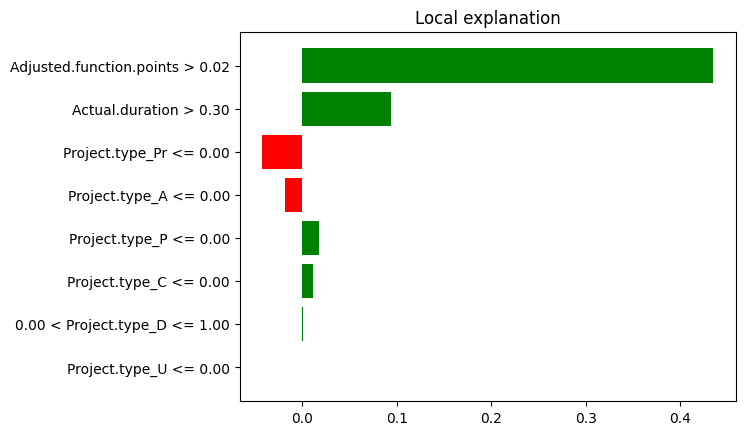

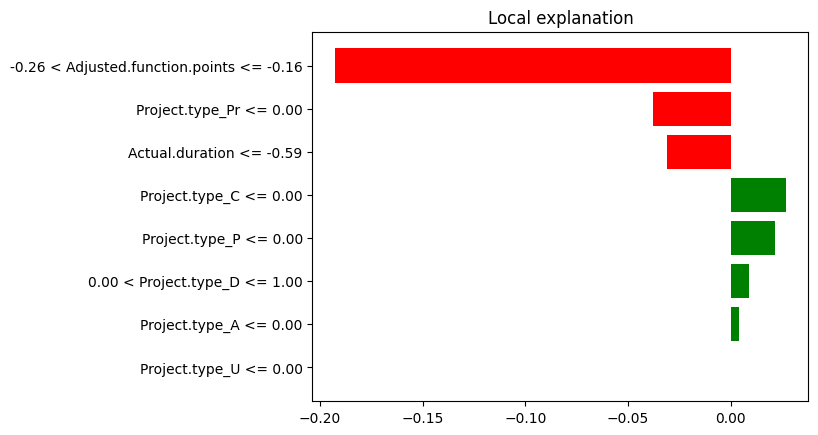

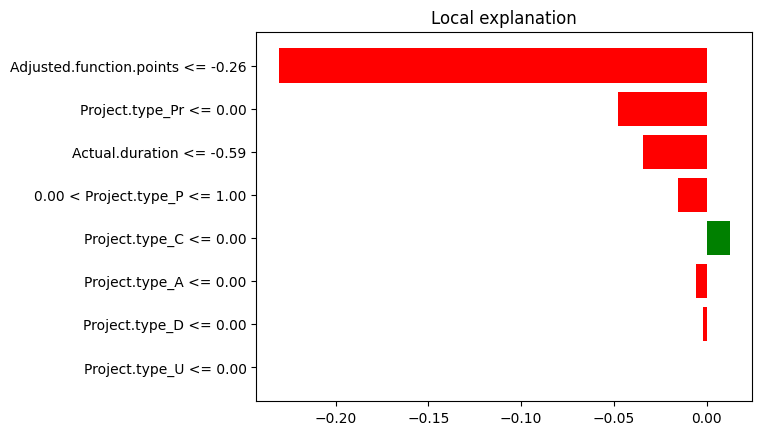

In [ ]:
lime_max.plot()
lime_median.plot()
lime_min.plot()

In [ ]:
lime_max.show_in_notebook()
lime_median.show_in_notebook()
lime_min.show_in_notebook()

### MAX:

In [ ]:
breakdown_df_max = breakdown_df_max.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_max = breakdown_df_max.drop(index=[0, 9])
breakdown_df_max['sign'] = breakdown_df_max['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_max = breakdown_df_max.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_max = shap_df_max.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_max = shap_df_max.tail(8)
shap_df_max['sign'] = shap_df_max['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_max = shap_df_max.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_max["Variable"] = lime_df_max["variable"].str.split(" ").str[0]
lime_df_max["Signo"] = lime_df_max["effect"].apply(evaluar_valor)
lime_df_max = lime_df_max.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_max = lime_df_max.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_max['Ranking'] = breakdown_df_max['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_max.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_max = breakdown_df_max[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_max['Ranking'] = shap_df_max['contribution'].abs().rank(ascending=False).astype(int)
shap_df_max.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_max = shap_df_max[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_max['Ranking'] = lime_df_max['effect'].abs().rank(ascending=False).astype(int)
lime_df_max = lime_df_max.head(5)
lime_df_max = lime_df_max[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_max = breakdown_df_max.drop(columns=['contribution'])
shap_df_max = shap_df_max.drop(columns=['contribution'])
lime_df_max = lime_df_max.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_max = breakdown_df_max.head(5)
breakdown_df_max = breakdown_df_max.reset_index(drop=True)

shap_df_max = shap_df_max.head(5)
shap_df_max = shap_df_max.reset_index(drop=True)

lime_df_max = lime_df_max.reset_index(drop=True)

print(breakdown_df_max)
print(shap_df_max)
print(lime_df_max)

                   Variable  Ranking     Signo
0  Adjusted.function.points        1  Positivo
1           Actual.duration        2  Positivo
2            Project.type_D        3  Positivo
3            Project.type_P        4  Positivo
4            Project.type_C        5  Positivo
                   Variable  Ranking     Signo
0  Adjusted.function.points        1  Positivo
1           Actual.duration        2  Positivo
2            Project.type_P        3  Positivo
3            Project.type_D        4  Positivo
4            Project.type_A        5  Negativo
                   Variable  Ranking     Signo
0  Adjusted.function.points        1  Positivo
1           Actual.duration        2  Positivo
2           Project.type_Pr        3  Negativo
3            Project.type_A        4  Negativo
4            Project.type_P        5  Positivo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_max['Variable'])
shapley_features = list(shap_df_max['Variable'])
lime_features = list(lime_df_max['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_max = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_max['Variable'] = list(all_features)
df_final_max= df_final_max[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_max['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_max[breakdown_df_max['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_max[shap_df_max['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_max[lime_df_max['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_max

['Adjusted.function.points', 'Actual.duration', 'Project.type_D', 'Project.type_P', 'Project.type_C']
['Adjusted.function.points', 'Actual.duration', 'Project.type_P', 'Project.type_D', 'Project.type_A']
['Adjusted.function.points', 'Actual.duration', 'Project.type_Pr', 'Project.type_A', 'Project.type_P']
['Project.type_P', 'Project.type_D', 'Actual.duration', 'Project.type_C', 'Adjusted.function.points', 'Project.type_Pr', 'Project.type_A']


Variable Breakdown           Shapley              Lime  \
                              Ranking     Signo Ranking     Signo Ranking   
0            Project.type_P         4  Positivo       3  Positivo       5   
1            Project.type_D         3  Positivo       4  Positivo       -   
2           Actual.duration         2  Positivo       2  Positivo       2   
3            Project.type_C         5  Positivo       -         -       -   
4  Adjusted.function.points         1  Positivo       1  Positivo       1   
5           Project.type_Pr         -         -       -         -       3   
6            Project.type_A         -         -       5  Negativo       4   

             
      Signo  
0  Positivo  
1         -  
2  Positivo  
3         -  
4  Positivo  
5  Negativo  
6  Negativo

In [ ]:
df_final_max.set_index('Variable', inplace=True)
nuevo_orden = ["Adjusted.function.points", "Actual.duration", "Project.type_D", "Project.type_P", "Project.type_C", "Project.type_A", "Project.type_Pr"]

# Reorganizar el DataFrame según el nuevo orden
df_final_max = df_final_max.reindex(nuevo_orden)

df_final_max

Breakdown           Shapley              Lime  \
                           Ranking     Signo Ranking     Signo Ranking   
Variable                                                                 
Adjusted.function.points         1  Positivo       1  Positivo       1   
Actual.duration                  2  Positivo       2  Positivo       2   
Project.type_D                   3  Positivo       4  Positivo       -   
Project.type_P                   4  Positivo       3  Positivo       5   
Project.type_C                   5  Positivo       -         -       -   
Project.type_A                   -         -       5  Negativo       4   
Project.type_Pr                  -         -       -         -       3   

                                    
                             Signo  
Variable                            
Adjusted.function.points  Positivo  
Actual.duration           Positivo  
Project.type_D                   -  
Project.type_P            Positivo  
Project.type_C                   -  
Project.type_A            Negativo  
Project.type_Pr           Negativo

### MEDIAN:

In [ ]:
breakdown_df_median = breakdown_df_median.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_median = breakdown_df_median.drop(index=[0, 9])
breakdown_df_median['sign'] = breakdown_df_median['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_median = breakdown_df_median.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_median = shap_df_median.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_median = shap_df_median.tail(8)
shap_df_median['sign'] = shap_df_median['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_median = shap_df_median.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_median["Variable"] = lime_df_median["variable"].str.split(" ").str[0]
lime_df_median["Signo"] = lime_df_median["effect"].apply(evaluar_valor)
lime_df_median = lime_df_median.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_median = lime_df_median.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_median['Ranking'] = breakdown_df_median['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_median.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_median = breakdown_df_median[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_median['Ranking'] = shap_df_median['contribution'].abs().rank(ascending=False).astype(int)
shap_df_median.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_median = shap_df_median[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_median['Ranking'] = lime_df_median['effect'].abs().rank(ascending=False).astype(int)
lime_df_median = lime_df_median.head(5)
lime_df_median = lime_df_median[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_median = breakdown_df_median.drop(columns=['contribution'])
shap_df_median = shap_df_median.drop(columns=['contribution'])
lime_df_median = lime_df_median.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_median = breakdown_df_median.head(5)
breakdown_df_median = breakdown_df_median.reset_index(drop=True)

shap_df_median = shap_df_median.head(5)
shap_df_median = shap_df_median.reset_index(drop=True)

lime_df_median = lime_df_median.reset_index(drop=True)
lime_df_median.at[0, "Variable"]="Adjusted.function.points"

print(breakdown_df_median)
print(shap_df_median)
print(lime_df_median)

                   Variable  Ranking     Signo
0           Actual.duration        1  Negativo
1  Adjusted.function.points        2  Negativo
2            Project.type_P        3  Positivo
3            Project.type_D        4  Positivo
4            Project.type_A        5  Negativo
                   Variable  Ranking     Signo
0           Actual.duration        1  Negativo
1  Adjusted.function.points        2  Negativo
2            Project.type_P        3  Positivo
3            Project.type_A        4  Negativo
4            Project.type_D        5  Positivo
                   Variable  Ranking     Signo
0  Adjusted.function.points        1  Negativo
1           Project.type_Pr        2  Negativo
2           Actual.duration        3  Negativo
3            Project.type_C        4  Positivo
4            Project.type_P        5  Positivo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_median['Variable'])
shapley_features = list(shap_df_median['Variable'])
lime_features = list(lime_df_median['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_median = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_median['Variable'] = list(all_features)
df_final_median= df_final_median[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_median['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_median[breakdown_df_median['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_median[shap_df_median['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_median[lime_df_median['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_median

['Actual.duration', 'Adjusted.function.points', 'Project.type_P', 'Project.type_D', 'Project.type_A']
['Actual.duration', 'Adjusted.function.points', 'Project.type_P', 'Project.type_A', 'Project.type_D']
['Adjusted.function.points', 'Project.type_Pr', 'Actual.duration', 'Project.type_C', 'Project.type_P']
['Project.type_P', 'Project.type_D', 'Actual.duration', 'Project.type_C', 'Adjusted.function.points', 'Project.type_Pr', 'Project.type_A']


Variable Breakdown           Shapley              Lime  \
                              Ranking     Signo Ranking     Signo Ranking   
0            Project.type_P         3  Positivo       3  Positivo       5   
1            Project.type_D         4  Positivo       5  Positivo       -   
2           Actual.duration         1  Negativo       1  Negativo       3   
3            Project.type_C         -         -       -         -       4   
4  Adjusted.function.points         2  Negativo       2  Negativo       1   
5           Project.type_Pr         -         -       -         -       2   
6            Project.type_A         5  Negativo       4  Negativo       -   

             
      Signo  
0  Positivo  
1         -  
2  Negativo  
3  Positivo  
4  Negativo  
5  Negativo  
6         -

In [ ]:
df_final_median.set_index('Variable', inplace=True)

nuevo_orden = ["Actual.duration","Adjusted.function.points", "Project.type_P", "Project.type_D", "Project.type_A", "Project.type_Pr", "Project.type_C"]

# Reorganizar el DataFrame según el nuevo orden
df_final_median = df_final_median.reindex(nuevo_orden)

df_final_median

Breakdown           Shapley              Lime  \
                           Ranking     Signo Ranking     Signo Ranking   
Variable                                                                 
Actual.duration                  1  Negativo       1  Negativo       3   
Adjusted.function.points         2  Negativo       2  Negativo       1   
Project.type_P                   3  Positivo       3  Positivo       5   
Project.type_D                   4  Positivo       5  Positivo       -   
Project.type_A                   5  Negativo       4  Negativo       -   
Project.type_Pr                  -         -       -         -       2   
Project.type_C                   -         -       -         -       4   

                                    
                             Signo  
Variable                            
Actual.duration           Negativo  
Adjusted.function.points  Negativo  
Project.type_P            Positivo  
Project.type_D                   -  
Project.type_A                   -  
Project.type_Pr           Negativo  
Project.type_C            Positivo

### MIN:

In [ ]:
breakdown_df_min = breakdown_df_min.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_min = breakdown_df_min.drop(index=[0, 9])
breakdown_df_min['sign'] = breakdown_df_min['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_min = breakdown_df_min.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_min = shap_df_min.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_min = shap_df_min.tail(8)
shap_df_min['sign'] = shap_df_min['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_min = shap_df_min.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_min["Variable"] = lime_df_min["variable"].str.split(" ").str[0]
lime_df_min["Signo"] = lime_df_min["effect"].apply(evaluar_valor)
lime_df_min = lime_df_min.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_min = lime_df_min.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_min['Ranking'] = breakdown_df_min['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_min.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_min = breakdown_df_min[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_min['Ranking'] = shap_df_min['contribution'].abs().rank(ascending=False).astype(int)
shap_df_min.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_min = shap_df_min[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_min['Ranking'] = lime_df_min['effect'].abs().rank(ascending=False).astype(int)
lime_df_min = lime_df_min.head(5)
lime_df_min = lime_df_min[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_min = breakdown_df_min.drop(columns=['contribution'])
shap_df_min = shap_df_min.drop(columns=['contribution'])
lime_df_min = lime_df_min.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_min = breakdown_df_min.head(5)
breakdown_df_min = breakdown_df_min.reset_index(drop=True)

shap_df_min = shap_df_min.head(5)
shap_df_min = shap_df_min.reset_index(drop=True)

lime_df_min = lime_df_min.reset_index(drop=True)
lime_df_min.at[3, "Variable"] = "Project.type_P"

print(breakdown_df_min)
print(shap_df_min)
print(lime_df_min)

                   Variable  Ranking     Signo
0  Adjusted.function.points        1  Negativo
1           Actual.duration        2  Negativo
2            Project.type_P        3  Negativo
3            Project.type_D        4  Negativo
4            Project.type_A        5  Negativo
                   Variable  Ranking     Signo
0  Adjusted.function.points        1  Negativo
1           Actual.duration        2  Negativo
2            Project.type_P        3  Negativo
3            Project.type_D        4  Negativo
4            Project.type_A        5  Negativo
                   Variable  Ranking     Signo
0  Adjusted.function.points        1  Negativo
1           Project.type_Pr        2  Negativo
2           Actual.duration        3  Negativo
3            Project.type_P        4  Negativo
4            Project.type_C        5  Positivo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_min['Variable'])
shapley_features = list(shap_df_min['Variable'])
lime_features = list(lime_df_min['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_min = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_min['Variable'] = list(all_features)
df_final_min= df_final_min[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_min['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_min[breakdown_df_min['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_min[shap_df_min['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_min[lime_df_min['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_min

['Adjusted.function.points', 'Actual.duration', 'Project.type_P', 'Project.type_D', 'Project.type_A']
['Adjusted.function.points', 'Actual.duration', 'Project.type_P', 'Project.type_D', 'Project.type_A']
['Adjusted.function.points', 'Project.type_Pr', 'Actual.duration', 'Project.type_P', 'Project.type_C']
['Project.type_P', 'Project.type_D', 'Actual.duration', 'Project.type_C', 'Adjusted.function.points', 'Project.type_Pr', 'Project.type_A']


Variable Breakdown           Shapley              Lime  \
                              Ranking     Signo Ranking     Signo Ranking   
0            Project.type_P         3  Negativo       3  Negativo       4   
1            Project.type_D         4  Negativo       4  Negativo       -   
2           Actual.duration         2  Negativo       2  Negativo       3   
3            Project.type_C         -         -       -         -       5   
4  Adjusted.function.points         1  Negativo       1  Negativo       1   
5           Project.type_Pr         -         -       -         -       2   
6            Project.type_A         5  Negativo       5  Negativo       -   

             
      Signo  
0  Negativo  
1         -  
2  Negativo  
3  Positivo  
4  Negativo  
5  Negativo  
6         -

In [ ]:
df_final_min.set_index('Variable', inplace=True)
nuevo_orden = ["Adjusted.function.points", "Actual.duration", "Project.type_P", "Project.type_D", "Project.type_A", "Project.type_Pr", "Project.type_C"]

# Reorganizar el DataFrame según el nuevo orden
df_final_min = df_final_min.reindex(nuevo_orden)

df_final_min

Breakdown           Shapley              Lime  \
                           Ranking     Signo Ranking     Signo Ranking   
Variable                                                                 
Adjusted.function.points         1  Negativo       1  Negativo       1   
Actual.duration                  2  Negativo       2  Negativo       3   
Project.type_P                   3  Negativo       3  Negativo       4   
Project.type_D                   4  Negativo       4  Negativo       -   
Project.type_A                   5  Negativo       5  Negativo       -   
Project.type_Pr                  -         -       -         -       2   
Project.type_C                   -         -       -         -       5   

                                    
                             Signo  
Variable                            
Adjusted.function.points  Negativo  
Actual.duration           Negativo  
Project.type_P            Negativo  
Project.type_D                   -  
Project.type_A                   -  
Project.type_Pr           Negativo  
Project.type_C            Positivo

### GLOBAL

In [ ]:
ranking_valores = {
    'Breakdown': [],
    'Shapley': [],
    'Lime': []
}

# Recorre los DataFrames y almacena los pares de valores por técnica
for tecnica in ranking_valores:
    for caracteristica in df_final_max.index:
        ranking = df_final_max[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

    for caracteristica in df_final_median.index:
        ranking = df_final_median[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

    for caracteristica in df_final_min.index:
        ranking = df_final_min[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

# Calcula el ranking medio por técnica y característica
ranking_medio = {
    'Breakdown': {},
    'Shapley': {},
    'Lime': {}
}

for tecnica, ranking_values in ranking_valores.items():
    for caracteristica, ranking in ranking_values:
        if caracteristica not in ranking_medio[tecnica]:
            ranking_medio[tecnica][caracteristica] = [ranking]
        else:
            ranking_medio[tecnica][caracteristica].append(ranking)

for tecnica, ranking_values in ranking_medio.items():
    for caracteristica in ranking_values:
        ranking_medio[tecnica][caracteristica] = sum(ranking_values[caracteristica]) / len(ranking_values[caracteristica])


# Ahora el conteo de apariciones por característica y técnica
apariciones_count = {
    'Breakdown': {},
    'Shapley': {},
    'Lime': {}
}

for tecnica, ranking_values in ranking_valores.items():
    for caracteristica, _ in ranking_values:
        if caracteristica not in apariciones_count[tecnica]:
            apariciones_count[tecnica][caracteristica] = 1
        else:
            apariciones_count[tecnica][caracteristica] += 1

# Tengo los valores, los conteos de apariciones y los ranking medios por técnica en los respectivos diccionarios
print(ranking_valores)
print(apariciones_count)
print(ranking_medio)

{'Breakdown': [('Adjusted.function.points', 1), ('Actual.duration', 2), ('Project.type_D', 3), ('Project.type_P', 4), ('Project.type_C', 5), ('Actual.duration', 1), ('Adjusted.function.points', 2), ('Project.type_P', 3), ('Project.type_D', 4), ('Project.type_A', 5), ('Adjusted.function.points', 1), ('Actual.duration', 2), ('Project.type_P', 3), ('Project.type_D', 4), ('Project.type_A', 5)], 'Shapley': [('Adjusted.function.points', 1), ('Actual.duration', 2), ('Project.type_D', 4), ('Project.type_P', 3), ('Project.type_A', 5), ('Actual.duration', 1), ('Adjusted.function.points', 2), ('Project.type_P', 3), ('Project.type_D', 5), ('Project.type_A', 4), ('Adjusted.function.points', 1), ('Actual.duration', 2), ('Project.type_P', 3), ('Project.type_D', 4), ('Project.type_A', 5)], 'Lime': [('Adjusted.function.points', 1), ('Actual.duration', 2), ('Project.type_P', 5), ('Project.type_A', 4), ('Project.type_Pr', 3), ('Actual.duration', 3), ('Adjusted.function.points', 1), ('Project.type_P', 5),

In [ ]:
# Lista de técnicas
techniques = ['Breakdown', 'Shapley', 'Lime']

# Diccionario para almacenar los datos
data_dict = {}

# Crear una lista de todas las características
all_caract = list(set().union(*[set(ranking_medio[technique]) for technique in techniques]))

# Recorrer las técnicas y las características
for technique in techniques:
    caract = list(ranking_medio[technique].keys())
    rank = [ranking_medio[technique].get(c, "-") for c in all_caract]
    apar = [apariciones_count[technique].get(c, "-") for c in all_caract]

    # Agregar los datos al diccionario
    data_dict[(technique, "Ranking Medio")] = rank
    data_dict[(technique, "Conteo")] = apar

# Crear el DataFrame resumen
df_resumen_rf = pd.DataFrame(data_dict, index=all_caract)

df_resumen_rf

Breakdown              Shapley         \
                         Ranking Medio Conteo Ranking Medio Conteo   
Project.type_A                     5.0      2      4.666667      3   
Project.type_Pr                      -      -             -      -   
Adjusted.function.points      1.333333      3      1.333333      3   
Project.type_C                     5.0      1             -      -   
Actual.duration               1.666667      3      1.666667      3   
Project.type_D                3.666667      3      4.333333      3   
Project.type_P                3.333333      3           3.0      3   

                                  Lime         
                         Ranking Medio Conteo  
Project.type_A                     4.0      1  
Project.type_Pr               2.333333      3  
Adjusted.function.points           1.0      3  
Project.type_C                     4.5      2  
Actual.duration               2.666667      3  
Project.type_D                       -      -  
Project.type_P                4.666667      3

In [ ]:
# Calcular el ranking medio general omitiendo los valores "-"
df_resumen_rf[("General", "Ranking")] = df_resumen_rf[[(tech, "Ranking Medio") for tech in techniques]].replace('-', np.nan).mean(axis=1)

# Calcular la suma total de apariciones omitiendo los valores "-"
df_resumen_rf[("General", "Conteo Total")] = df_resumen_rf[[(tech, "Conteo") for tech in techniques]].replace('-', 0).sum(axis=1)

# Mostrar el DataFrame resumen actualizado
df_resumen_rf

Breakdown              Shapley         \
                         Ranking Medio Conteo Ranking Medio Conteo   
Project.type_A                     5.0      2      4.666667      3   
Project.type_Pr                      -      -             -      -   
Adjusted.function.points      1.333333      3      1.333333      3   
Project.type_C                     5.0      1             -      -   
Actual.duration               1.666667      3      1.666667      3   
Project.type_D                3.666667      3      4.333333      3   
Project.type_P                3.333333      3           3.0      3   

                                  Lime          General               
                         Ranking Medio Conteo   Ranking Conteo Total  
Project.type_A                     4.0      1  4.555556            6  
Project.type_Pr               2.333333      3  2.333333            3  
Adjusted.function.points           1.0      3  1.222222            9  
Project.type_C                     4.5      2  4.750000            3  
Actual.duration               2.666667      3  2.000000            9  
Project.type_D                       -      -  4.000000            6  
Project.type_P                4.666667      3  3.666667            9

In [ ]:
# Obtener el número de características
num_caract = df_resumen_rf.shape[0]

# Calcular el peso para el ranking y apariciones
df_resumen_rf[("General", "Peso Rango")] = 1 - ((df_resumen_rf[("General", "Ranking")].rank(ascending=True) - 1) / num_caract)
df_resumen_rf[("General", "Peso Conteo")] = df_resumen_rf[("General", "Conteo Total")].rank(ascending=True) / num_caract

# Calcular el puntaje final como suma de los pesos
df_resumen_rf[("General", "Puntaje")] = df_resumen_rf[("General", "Peso Rango")] + df_resumen_rf[("General", "Peso Conteo")]
df_resumen_rf[("General", "Ranking")] = df_resumen_rf[("General", "Puntaje")].rank(ascending=False, method="min")

# Eliminar la subcolumnas innecesarias
df_resumen_rf.drop("Peso Rango", axis=1, level=1, inplace=True)
df_resumen_rf.drop("Peso Conteo", axis=1, level=1, inplace=True)
df_resumen_rf.drop("Puntaje", axis=1, level=1, inplace=True)

df_resumen_rf

Breakdown              Shapley         \
                         Ranking Medio Conteo Ranking Medio Conteo   
Project.type_A                     5.0      2      4.666667      3   
Project.type_Pr                      -      -             -      -   
Adjusted.function.points      1.333333      3      1.333333      3   
Project.type_C                     5.0      1             -      -   
Actual.duration               1.666667      3      1.666667      3   
Project.type_D                3.666667      3      4.333333      3   
Project.type_P                3.333333      3           3.0      3   

                                  Lime        General               
                         Ranking Medio Conteo Ranking Conteo Total  
Project.type_A                     4.0      1     6.0            6  
Project.type_Pr               2.333333      3     4.0            3  
Adjusted.function.points           1.0      3     1.0            9  
Project.type_C                     4.5      2     7.0            3  
Actual.duration               2.666667      3     2.0            9  
Project.type_D                       -      -     4.0            6  
Project.type_P                4.666667      3     3.0            9

In [ ]:
# Obtener las columnas actuales del DataFrame
columns = df_resumen_rf.columns

# Extraer las columnas de "General" y sus subcolumnas
general_columns = columns.get_level_values(0) == "General"

# Crear una lista con las subcolumnas de "General"
general_subcolumns = [("General", "Ranking"), ("General", "Conteo Total")]

# Crear una lista con las subcolumnas asociadas a las técnicas
technique_subcolumns = list(columns[~general_columns])

# Reorganizar las columnas para mover "General" al principio
new_columns = general_subcolumns + technique_subcolumns

# Crear un nuevo DataFrame con las columnas reorganizadas
df_resumen_rf = df_resumen_rf[new_columns]

In [ ]:
df_resumen_rf.sort_values(by=("General", "Ranking"), ascending=True, inplace=True)

# Formatear los valores
for tech in techniques:
    df_resumen_rf[(tech, "Ranking Medio")] = df_resumen_rf[(tech, "Ranking Medio")].apply(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)

df_resumen_rf

General                  Breakdown         \
                         Ranking Conteo Total Ranking Medio Conteo   
Adjusted.function.points     1.0            9          1.33      3   
Actual.duration              2.0            9          1.67      3   
Project.type_P               3.0            9          3.33      3   
Project.type_Pr              4.0            3             -      -   
Project.type_D               4.0            6          3.67      3   
Project.type_A               6.0            6          5.00      2   
Project.type_C               7.0            3          5.00      1   

                               Shapley                 Lime         
                         Ranking Medio Conteo Ranking Medio Conteo  
Adjusted.function.points          1.33      3          1.00      3  
Actual.duration                   1.67      3          2.67      3  
Project.type_P                    3.00      3          4.67      3  
Project.type_Pr                      -      -          2.33      3  
Project.type_D                    4.33      3             -      -  
Project.type_A                    4.67      3          4.00      1  
Project.type_C                       -      -          4.50      2

## **GradientBoostingRegresor:**

**FEATURE IMPORTANCE:**

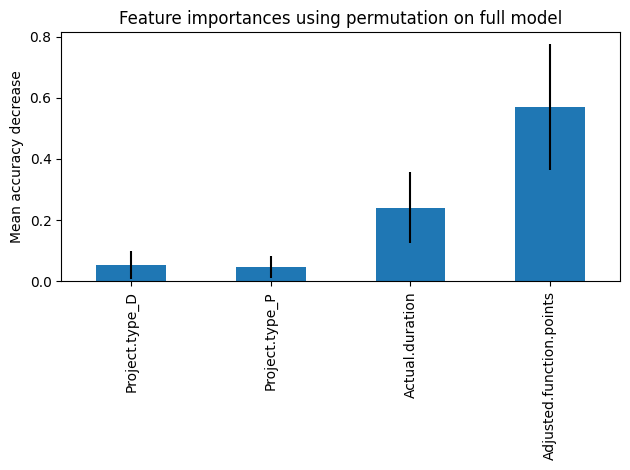

In [ ]:
#uso de permutation importance
permu = permutation_importance(modelo_gbr, x_test, y_test, n_repeats=20, random_state=42, n_jobs=2)
permu_importances = pd.Series(permu.importances_mean.round(3), index=feature_names)[permu.importances_mean.round(3) > 0.000]
fig, ax = plt.subplots()
permu_importances.plot.bar(yerr=permu.importances_std[permu.importances_mean.round(3) > 0.000], ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

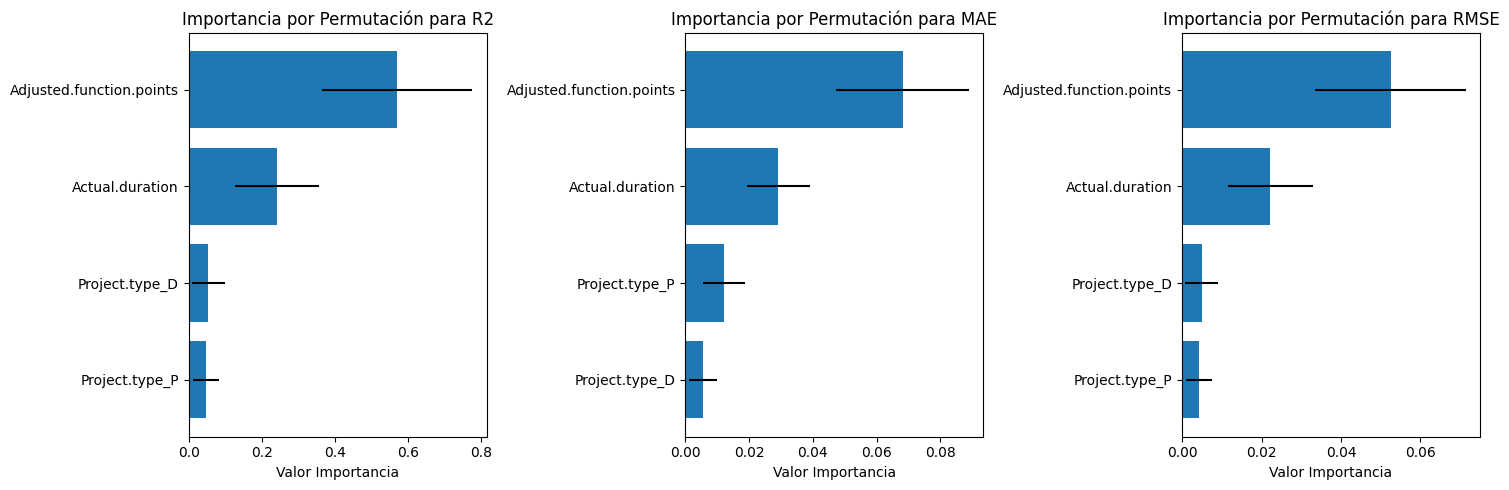

In [ ]:
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']
metric_names = ['R2', 'MAE', 'RMSE']

permu_score = permutation_importance(modelo_gbr, x_test, y_test, n_repeats=20, random_state=42, scoring=scoring)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Itera a través de las métricas
for i, metric in enumerate(scoring):
    permu = permu_score[metric]

    # Filtra las características que cumplen la condición
    filtered_indices = [j for j in range(len(permu.importances_mean)) if permu.importances_mean[j].round(3) > 0.000]
    sorted_feature_names = [feature_names[j] for j in filtered_indices]
    importances_mean = permu.importances_mean[filtered_indices]
    importances_std = permu.importances_std[filtered_indices]

    # Ordena los datos por importancia de mayor a menor
    sorted_indices = np.argsort(importances_mean)[::1]
    sorted_feature_names = [sorted_feature_names[j] for j in sorted_indices]
    importances_mean = importances_mean[sorted_indices]
    importances_std = importances_std[sorted_indices]

    # Crea la representación gráfica en el subplot correspondiente
    axs[i].barh(range(len(sorted_feature_names)), importances_mean, xerr=importances_std, align='center')
    axs[i].set_yticks(range(len(sorted_feature_names)))
    axs[i].set_yticklabels(sorted_feature_names)
    axs[i].set_xlabel('Valor Importancia')
    axs[i].set_title(f'Importancia por Permutación para {metric_names[i]}')

# Ajusta los espacios entre subplots y muestra la figura
plt.tight_layout()
plt.show()

In [ ]:
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']

# Crea un diccionario para almacenar los DataFrames
results_global_gbr = {}

permu_score = permutation_importance(modelo_gbr, x_test, y_test, n_repeats=20, random_state=42, scoring=scoring)
for i, metric in enumerate(scoring):
  permu = permu_score[metric]

  # Filtra las características que cumplen la condición
  filtered_indices = [j for j in range(len(permu.importances_mean)) if permu.importances_mean[j].round(3) > 0.000]
  sorted_feature_names = [feature_names[j] for j in filtered_indices]
  importances_mean = permu.importances_mean[filtered_indices]
  importances_std = permu.importances_std[filtered_indices]



  # Crear un DataFrame con los resultados
  df_exp_global = pd.DataFrame({'Feature': sorted_feature_names,
                       'Importance_Mean': importances_mean,
                       'Importance_Std': importances_std})

  # Ordenar el DataFrame por importance_mean en orden descendente
  df_exp_global = df_exp_global.sort_values(by='Importance_Mean', ascending=False)

  # Asignar el DataFrame al diccionario con el nombre de la métrica
  results_global_gbr[f'df_global_{metric_names[i]}'] = df_exp_global

In [ ]:
results_global_gbr['df_global_R2']

,Feature,Importance_Mean,Importance_Std
3,Adjusted.function.points,0.569906,0.205471
2,Actual.duration,0.241458,0.115594
0,Project.type_D,0.053361,0.044653
1,Project.type_P,0.046919,0.035597


In [ ]:
results_global_gbr['df_global_MAE']

,Feature,Importance_Mean,Importance_Std
3,Adjusted.function.points,0.068180,0.020901
2,Actual.duration,0.029134,0.009952
1,Project.type_P,0.012250,0.006573
0,Project.type_D,0.005463,0.004344


In [ ]:
results_global_gbr['df_global_RMSE']

,Feature,Importance_Mean,Importance_Std
3,Adjusted.function.points,0.052483,0.018922
2,Actual.duration,0.022236,0.010645
0,Project.type_D,0.004914,0.004112
1,Project.type_P,0.004321,0.003278


**BREAK-DOWN, SHAP Y LIME:**

In [ ]:
#primero definimos el explainer
exp = dx.Explainer(modelo_gbr, x_train, y_train)

Preparation of a new explainer is initiated

  -> data              : 94 rows 8 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 94 values
  -> model_class       : sklearn.ensemble._gb.GradientBoostingRegressor (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x78483f08c670> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = -0.298, mean = 0.016, max = 11.2
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -3.73e-08, mean = 3.36e-18, max = 4.13e-08
  -> model_info        : package sklearn

A new explainer has been created!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [ ]:
#Primero obtenemos las instancias con valor estimado máximo, minimo y en la mediana.
max_index = np.argmax(y_pred)
min_index = np.argmin(y_pred)
mediana = np.median(y_pred)
#Encontrar el índice de la instancia cuyo valor estimado está en la mediana
median_index = np.argmin(np.abs(y_pred - mediana))

print("Índice de la instancia del conjunto de entrenamiento con mayor esfuerzo estimado es: ", max_index)
print("El valor máximo obtenido es: ", y_pred[max_index])
print("Ínidce de la instancia del conjunto de entrenamiento con menor esfuerzo estimado es: ", min_index)
print("El valor mínimo obtenido es: ", y_pred[min_index])
print("Índice de la instancia del conjunto de entrenamiento con esfuerzo estimado en la mediana: ", median_index)
print("El valor de la mediana es: ", y_pred[median_index])

Índice de la instancia del conjunto de entrenamiento con mayor esfuerzo estimado es:  1
El valor máximo obtenido es:  0.5505979922300012
Ínidce de la instancia del conjunto de entrenamiento con menor esfuerzo estimado es:  34
El valor mínimo obtenido es:  -0.2873597224187125
Índice de la instancia del conjunto de entrenamiento con esfuerzo estimado en la mediana:  40
El valor de la mediana es:  -0.1984206223185204


In [ ]:
df_instancia_max = x_test.iloc[max_index]
df_instancia_median = x_test.iloc[median_index]
df_instancia_min = x_test.iloc[min_index]

In [ ]:
breakdown_max = exp.predict_parts(df_instancia_max, type="break_down",random_state=42)
breakdown_median = exp.predict_parts(df_instancia_median, type="break_down",random_state=42)
breakdown_min = exp.predict_parts(df_instancia_min, type="break_down",random_state=42)

shap_max = exp.predict_parts(df_instancia_max, type="shap",random_state=42)
shap_median = exp.predict_parts(df_instancia_median, type="shap",random_state=42)
shap_min = exp.predict_parts(df_instancia_min, type="shap",random_state=42)

lime_max = exp.predict_surrogate(df_instancia_max, random_state=42)
lime_median = exp.predict_surrogate(df_instancia_median, random_state=42)
lime_min = exp.predict_surrogate(df_instancia_min, random_state=42)

breakdown_df_max = breakdown_max.result
shap_df_max = shap_max.result
lime_df_max=lime_max.result
breakdown_df_median = breakdown_median.result
shap_df_median = shap_median.result
lime_df_median= lime_median.result
breakdown_df_min = breakdown_min.result
shap_df_min = shap_min.result
lime_df_min = lime_min.result

In [ ]:
breakdown_max.plot()
breakdown_median.plot()
breakdown_min.plot()

In [ ]:
shap_max.plot()
shap_median.plot()
shap_min.plot()

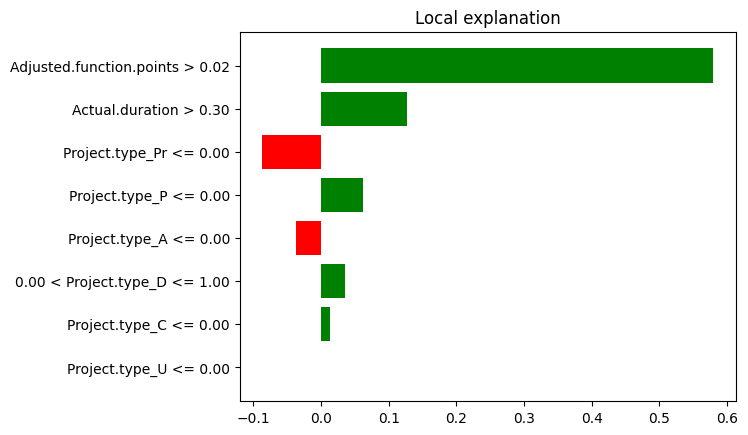

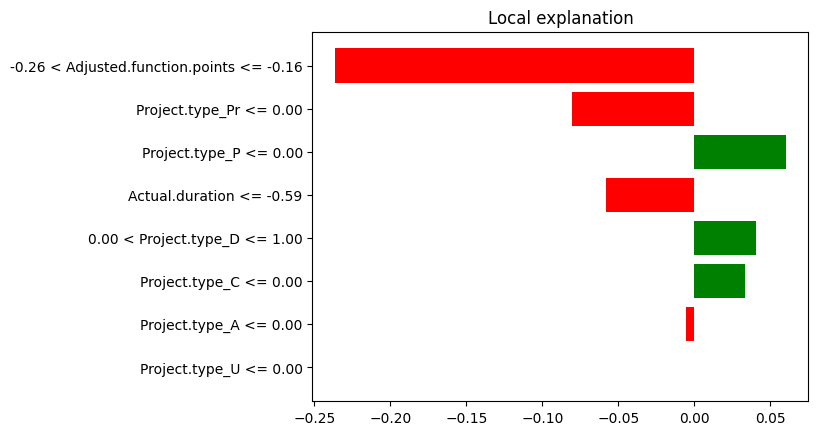

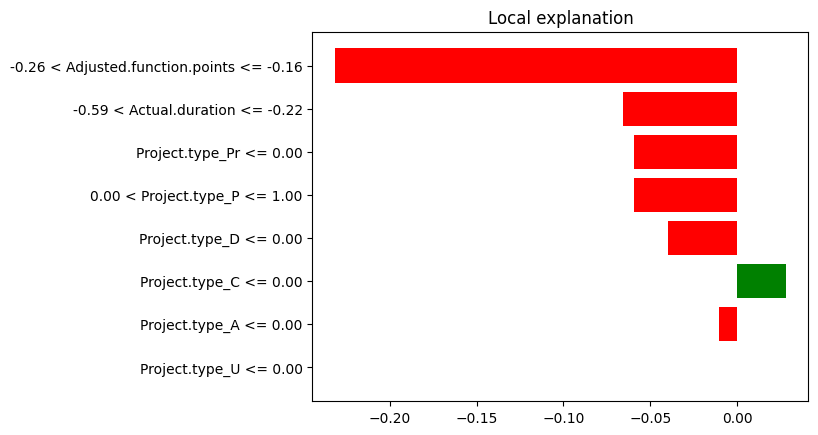

In [ ]:
lime_max.plot()
lime_median.plot()
lime_min.plot()

In [ ]:
lime_max.show_in_notebook()
lime_median.show_in_notebook()
lime_min.show_in_notebook()

### MAX:

In [ ]:
breakdown_df_max = breakdown_df_max.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_max = breakdown_df_max.drop(index=[0, 9])
breakdown_df_max['sign'] = breakdown_df_max['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_max = breakdown_df_max.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_max = shap_df_max.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_max = shap_df_max.tail(8)
shap_df_max['sign'] = shap_df_max['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_max = shap_df_max.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_max["Variable"] = lime_df_max["variable"].str.split(" ").str[0]
lime_df_max["Signo"] = lime_df_max["effect"].apply(evaluar_valor)
lime_df_max = lime_df_max.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_max = lime_df_max.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_max['Ranking'] = breakdown_df_max['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_max.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_max = breakdown_df_max[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_max['Ranking'] = shap_df_max['contribution'].abs().rank(ascending=False).astype(int)
shap_df_max.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_max = shap_df_max[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_max['Ranking'] = lime_df_max['effect'].abs().rank(ascending=False).astype(int)
lime_df_max = lime_df_max.head(5)
lime_df_max = lime_df_max[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_max = breakdown_df_max.drop(columns=['contribution'])
shap_df_max = shap_df_max.drop(columns=['contribution'])
lime_df_max = lime_df_max.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_max = breakdown_df_max.head(5)
breakdown_df_max = breakdown_df_max.reset_index(drop=True)

shap_df_max = shap_df_max.head(5)
shap_df_max = shap_df_max.reset_index(drop=True)

lime_df_max = lime_df_max.reset_index(drop=True)

print(breakdown_df_max)
print(shap_df_max)
print(lime_df_max)

                   Variable  Ranking     Signo
0  Adjusted.function.points        1  Positivo
1           Actual.duration        2  Positivo
2            Project.type_D        3  Positivo
3            Project.type_P        4  Positivo
4            Project.type_C        6      Nulo
                   Variable  Ranking     Signo
0  Adjusted.function.points        1  Positivo
1           Actual.duration        2  Positivo
2            Project.type_D        3  Positivo
3            Project.type_P        4  Positivo
4            Project.type_A        5  Negativo
                   Variable  Ranking     Signo
0  Adjusted.function.points        1  Positivo
1           Actual.duration        2  Positivo
2           Project.type_Pr        3  Negativo
3            Project.type_P        4  Positivo
4            Project.type_A        5  Negativo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_max['Variable'])
shapley_features = list(shap_df_max['Variable'])
lime_features = list(lime_df_max['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_max = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_max['Variable'] = list(all_features)
df_final_max= df_final_max[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_max['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_max[breakdown_df_max['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_max[shap_df_max['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_max[lime_df_max['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_max

['Adjusted.function.points', 'Actual.duration', 'Project.type_D', 'Project.type_P', 'Project.type_C']
['Adjusted.function.points', 'Actual.duration', 'Project.type_D', 'Project.type_P', 'Project.type_A']
['Adjusted.function.points', 'Actual.duration', 'Project.type_Pr', 'Project.type_P', 'Project.type_A']
['Project.type_P', 'Project.type_D', 'Actual.duration', 'Project.type_C', 'Adjusted.function.points', 'Project.type_Pr', 'Project.type_A']


Variable Breakdown           Shapley              Lime  \
                              Ranking     Signo Ranking     Signo Ranking   
0            Project.type_P         4  Positivo       4  Positivo       4   
1            Project.type_D         3  Positivo       3  Positivo       -   
2           Actual.duration         2  Positivo       2  Positivo       2   
3            Project.type_C         6      Nulo       -         -       -   
4  Adjusted.function.points         1  Positivo       1  Positivo       1   
5           Project.type_Pr         -         -       -         -       3   
6            Project.type_A         -         -       5  Negativo       5   

             
      Signo  
0  Positivo  
1         -  
2  Positivo  
3         -  
4  Positivo  
5  Negativo  
6  Negativo

In [ ]:
df_final_max.set_index('Variable', inplace=True)
nuevo_orden = ["Adjusted.function.points", "Actual.duration", "Project.type_D", "Project.type_P", "Project.type_A", "Project.type_Pr"]

# Reorganizar el DataFrame según el nuevo orden
df_final_max = df_final_max.reindex(nuevo_orden)

df_final_max

Breakdown           Shapley              Lime  \
                           Ranking     Signo Ranking     Signo Ranking   
Variable                                                                 
Adjusted.function.points         1  Positivo       1  Positivo       1   
Actual.duration                  2  Positivo       2  Positivo       2   
Project.type_D                   3  Positivo       3  Positivo       -   
Project.type_P                   4  Positivo       4  Positivo       4   
Project.type_A                   -         -       5  Negativo       5   
Project.type_Pr                  -         -       -         -       3   

                                    
                             Signo  
Variable                            
Adjusted.function.points  Positivo  
Actual.duration           Positivo  
Project.type_D                   -  
Project.type_P            Positivo  
Project.type_A            Negativo  
Project.type_Pr           Negativo

### MEDIAN:

In [ ]:
breakdown_df_median = breakdown_df_median.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_median = breakdown_df_median.drop(index=[0, 9])
breakdown_df_median['sign'] = breakdown_df_median['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_median = breakdown_df_median.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_median = shap_df_median.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_median = shap_df_median.tail(8)
shap_df_median['sign'] = shap_df_median['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_median = shap_df_median.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_median["Variable"] = lime_df_median["variable"].str.split(" ").str[0]
lime_df_median["Signo"] = lime_df_median["effect"].apply(evaluar_valor)
lime_df_median = lime_df_median.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_median = lime_df_median.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_median['Ranking'] = breakdown_df_median['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_median.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_median = breakdown_df_median[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_median['Ranking'] = shap_df_median['contribution'].abs().rank(ascending=False).astype(int)
shap_df_median.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_median = shap_df_median[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_median['Ranking'] = lime_df_median['effect'].abs().rank(ascending=False).astype(int)
lime_df_median = lime_df_median.head(5)
lime_df_median = lime_df_median[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_median = breakdown_df_median.drop(columns=['contribution'])
shap_df_median = shap_df_median.drop(columns=['contribution'])
lime_df_median = lime_df_median.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_median = breakdown_df_median.head(5)
breakdown_df_median = breakdown_df_median.reset_index(drop=True)

shap_df_median = shap_df_median.head(5)
shap_df_median = shap_df_median.reset_index(drop=True)

lime_df_median = lime_df_median.reset_index(drop=True)
lime_df_median.at[0, "Variable"] = "Adjusted.function.points"
lime_df_median.at[4, "Variable"] = "Project.type_D"

print(breakdown_df_median)
print(shap_df_median)
print(lime_df_median)

                   Variable  Ranking     Signo
0           Actual.duration        1  Negativo
1  Adjusted.function.points        2  Negativo
2            Project.type_D        3  Positivo
3            Project.type_P        4  Negativo
4            Project.type_A        5  Negativo
                   Variable  Ranking     Signo
0           Actual.duration        1  Negativo
1  Adjusted.function.points        2  Negativo
2            Project.type_D        3  Positivo
3            Project.type_P        4  Negativo
4            Project.type_A        5  Negativo
                   Variable  Ranking     Signo
0  Adjusted.function.points        1  Negativo
1           Project.type_Pr        2  Negativo
2            Project.type_P        3  Positivo
3           Actual.duration        4  Negativo
4            Project.type_D        5  Positivo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_median['Variable'])
shapley_features = list(shap_df_median['Variable'])
lime_features = list(lime_df_median['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_median = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_median['Variable'] = list(all_features)
df_final_median= df_final_median[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_median['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_median[breakdown_df_median['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_median[shap_df_median['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_median[lime_df_median['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_median

['Actual.duration', 'Adjusted.function.points', 'Project.type_D', 'Project.type_P', 'Project.type_A']
['Actual.duration', 'Adjusted.function.points', 'Project.type_D', 'Project.type_P', 'Project.type_A']
['Adjusted.function.points', 'Project.type_Pr', 'Project.type_P', 'Actual.duration', 'Project.type_D']
['Project.type_P', 'Project.type_D', 'Actual.duration', 'Adjusted.function.points', 'Project.type_Pr', 'Project.type_A']


Variable Breakdown           Shapley              Lime  \
                              Ranking     Signo Ranking     Signo Ranking   
0            Project.type_P         4  Negativo       4  Negativo       3   
1            Project.type_D         3  Positivo       3  Positivo       5   
2           Actual.duration         1  Negativo       1  Negativo       4   
3  Adjusted.function.points         2  Negativo       2  Negativo       1   
4           Project.type_Pr         -         -       -         -       2   
5            Project.type_A         5  Negativo       5  Negativo       -   

             
      Signo  
0  Positivo  
1  Positivo  
2  Negativo  
3  Negativo  
4  Negativo  
5         -

In [ ]:
df_final_median.set_index('Variable', inplace=True)
nuevo_orden = ["Actual.duration", "Adjusted.function.points", "Project.type_D", "Project.type_P", "Project.type_A", "Project.type_Pr"]

# Reorganizar el DataFrame según el nuevo orden
df_final_median = df_final_median.reindex(nuevo_orden)

df_final_median

Breakdown           Shapley              Lime  \
                           Ranking     Signo Ranking     Signo Ranking   
Variable                                                                 
Actual.duration                  1  Negativo       1  Negativo       4   
Adjusted.function.points         2  Negativo       2  Negativo       1   
Project.type_D                   3  Positivo       3  Positivo       5   
Project.type_P                   4  Negativo       4  Negativo       3   
Project.type_A                   5  Negativo       5  Negativo       -   
Project.type_Pr                  -         -       -         -       2   

                                    
                             Signo  
Variable                            
Actual.duration           Negativo  
Adjusted.function.points  Negativo  
Project.type_D            Positivo  
Project.type_P            Positivo  
Project.type_A                   -  
Project.type_Pr           Negativo

### MIN:

In [ ]:
breakdown_df_min = breakdown_df_min.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_min = breakdown_df_min.drop(index=[0, 9])
breakdown_df_min['sign'] = breakdown_df_min['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_min = breakdown_df_min.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_min = shap_df_min.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_min = shap_df_min.tail(8)
shap_df_min['sign'] = shap_df_min['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_min = shap_df_min.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_min["Variable"] = lime_df_min["variable"].str.split(" ").str[0]
lime_df_min["Signo"] = lime_df_min["effect"].apply(evaluar_valor)
lime_df_min = lime_df_min.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_min = lime_df_min.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_min['Ranking'] = breakdown_df_min['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_min.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_min = breakdown_df_min[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_min['Ranking'] = shap_df_min['contribution'].abs().rank(ascending=False).astype(int)
shap_df_min.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_min = shap_df_min[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_min['Ranking'] = lime_df_min['effect'].abs().rank(ascending=False).astype(int)
lime_df_min = lime_df_min.head(5)
lime_df_min = lime_df_min[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_min = breakdown_df_min.drop(columns=['contribution'])
shap_df_min = shap_df_min.drop(columns=['contribution'])
lime_df_min = lime_df_min.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_min = breakdown_df_min.head(5)
breakdown_df_min = breakdown_df_min.reset_index(drop=True)

shap_df_min = shap_df_min.head(5)
shap_df_min = shap_df_min.reset_index(drop=True)

lime_df_min = lime_df_min.reset_index(drop=True)
lime_df_min.at[0, "Variable"] = "Adjusted.function.points"
lime_df_min.at[1, "Variable"] = "Actual.duration"
lime_df_min.at[3, "Variable"] = "Project.type_P"

print(breakdown_df_min)
print(shap_df_min)
print(lime_df_min)

                   Variable  Ranking     Signo
0  Adjusted.function.points        1  Negativo
1           Actual.duration        2  Negativo
2            Project.type_P        3  Positivo
3            Project.type_D        4  Negativo
4            Project.type_A        5  Negativo
                   Variable  Ranking     Signo
0  Adjusted.function.points        1  Negativo
1           Actual.duration        2  Negativo
2            Project.type_P        3  Negativo
3            Project.type_D        4  Negativo
4            Project.type_A        5  Negativo
                   Variable  Ranking     Signo
0  Adjusted.function.points        1  Negativo
1           Actual.duration        2  Negativo
2           Project.type_Pr        3  Negativo
3            Project.type_P        4  Negativo
4            Project.type_D        5  Negativo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_min['Variable'])
shapley_features = list(shap_df_min['Variable'])
lime_features = list(lime_df_min['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_min = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_min['Variable'] = list(all_features)
df_final_min= df_final_min[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_min['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_min[breakdown_df_min['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_min[shap_df_min['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_min[lime_df_min['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_min

['Adjusted.function.points', 'Actual.duration', 'Project.type_P', 'Project.type_D', 'Project.type_A']
['Adjusted.function.points', 'Actual.duration', 'Project.type_P', 'Project.type_D', 'Project.type_A']
['Adjusted.function.points', 'Actual.duration', 'Project.type_Pr', 'Project.type_P', 'Project.type_D']
['Project.type_P', 'Project.type_D', 'Actual.duration', 'Adjusted.function.points', 'Project.type_Pr', 'Project.type_A']


Variable Breakdown           Shapley              Lime  \
                              Ranking     Signo Ranking     Signo Ranking   
0            Project.type_P         3  Positivo       3  Negativo       4   
1            Project.type_D         4  Negativo       4  Negativo       5   
2           Actual.duration         2  Negativo       2  Negativo       2   
3  Adjusted.function.points         1  Negativo       1  Negativo       1   
4           Project.type_Pr         -         -       -         -       3   
5            Project.type_A         5  Negativo       5  Negativo       -   

             
      Signo  
0  Negativo  
1  Negativo  
2  Negativo  
3  Negativo  
4  Negativo  
5         -

In [ ]:
df_final_min.set_index('Variable', inplace=True)
nuevo_orden = ["Adjusted.function.points", "Actual.duration", "Project.type_P", "Project.type_D", "Project.type_A", "Project.type_Pr"]

# Reorganizar el DataFrame según el nuevo orden
df_final_min = df_final_min.reindex(nuevo_orden)

df_final_min

Breakdown           Shapley              Lime  \
                           Ranking     Signo Ranking     Signo Ranking   
Variable                                                                 
Adjusted.function.points         1  Negativo       1  Negativo       1   
Actual.duration                  2  Negativo       2  Negativo       2   
Project.type_P                   3  Positivo       3  Negativo       4   
Project.type_D                   4  Negativo       4  Negativo       5   
Project.type_A                   5  Negativo       5  Negativo       -   
Project.type_Pr                  -         -       -         -       3   

                                    
                             Signo  
Variable                            
Adjusted.function.points  Negativo  
Actual.duration           Negativo  
Project.type_P            Negativo  
Project.type_D            Negativo  
Project.type_A                   -  
Project.type_Pr           Negativo

### GLOBAL

In [ ]:
ranking_valores = {
    'Breakdown': [],
    'Shapley': [],
    'Lime': []
}

# Recorre los DataFrames y almacena los pares de valores por técnica
for tecnica in ranking_valores:
    for caracteristica in df_final_max.index:
        ranking = df_final_max[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

    for caracteristica in df_final_median.index:
        ranking = df_final_median[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

    for caracteristica in df_final_min.index:
        ranking = df_final_min[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

# Calcula el ranking medio por técnica y característica
ranking_medio = {
    'Breakdown': {},
    'Shapley': {},
    'Lime': {}
}

for tecnica, ranking_values in ranking_valores.items():
    for caracteristica, ranking in ranking_values:
        if caracteristica not in ranking_medio[tecnica]:
            ranking_medio[tecnica][caracteristica] = [ranking]
        else:
            ranking_medio[tecnica][caracteristica].append(ranking)

for tecnica, ranking_values in ranking_medio.items():
    for caracteristica in ranking_values:
        ranking_medio[tecnica][caracteristica] = sum(ranking_values[caracteristica]) / len(ranking_values[caracteristica])


# Ahora el conteo de apariciones por característica y técnica
apariciones_count = {
    'Breakdown': {},
    'Shapley': {},
    'Lime': {}
}

for tecnica, ranking_values in ranking_valores.items():
    for caracteristica, _ in ranking_values:
        if caracteristica not in apariciones_count[tecnica]:
            apariciones_count[tecnica][caracteristica] = 1
        else:
            apariciones_count[tecnica][caracteristica] += 1

# Tengo los valores, los conteos de apariciones y los ranking medios por técnica en los respectivos diccionarios
print(ranking_valores)
print(apariciones_count)
print(ranking_medio)

{'Breakdown': [('Adjusted.function.points', 1), ('Actual.duration', 2), ('Project.type_D', 3), ('Project.type_P', 4), ('Actual.duration', 1), ('Adjusted.function.points', 2), ('Project.type_D', 3), ('Project.type_P', 4), ('Project.type_A', 5), ('Adjusted.function.points', 1), ('Actual.duration', 2), ('Project.type_P', 3), ('Project.type_D', 4), ('Project.type_A', 5)], 'Shapley': [('Adjusted.function.points', 1), ('Actual.duration', 2), ('Project.type_D', 3), ('Project.type_P', 4), ('Project.type_A', 5), ('Actual.duration', 1), ('Adjusted.function.points', 2), ('Project.type_D', 3), ('Project.type_P', 4), ('Project.type_A', 5), ('Adjusted.function.points', 1), ('Actual.duration', 2), ('Project.type_P', 3), ('Project.type_D', 4), ('Project.type_A', 5)], 'Lime': [('Adjusted.function.points', 1), ('Actual.duration', 2), ('Project.type_P', 4), ('Project.type_A', 5), ('Project.type_Pr', 3), ('Actual.duration', 4), ('Adjusted.function.points', 1), ('Project.type_D', 5), ('Project.type_P', 3),

In [ ]:
# Lista de técnicas
techniques = ['Breakdown', 'Shapley', 'Lime']

# Diccionario para almacenar los datos
data_dict = {}

# Crear una lista de todas las características
all_caract = list(set().union(*[set(ranking_medio[technique]) for technique in techniques]))

# Recorrer las técnicas y las características
for technique in techniques:
    caract = list(ranking_medio[technique].keys())
    rank = [ranking_medio[technique].get(c, "-") for c in all_caract]
    apar = [apariciones_count[technique].get(c, "-") for c in all_caract]

    # Agregar los datos al diccionario
    data_dict[(technique, "Ranking Medio")] = rank
    data_dict[(technique, "Conteo")] = apar

# Crear el DataFrame resumen
df_resumen_gbr = pd.DataFrame(data_dict, index=all_caract)

df_resumen_gbr

Breakdown              Shapley         \
                         Ranking Medio Conteo Ranking Medio Conteo   
Project.type_A                     5.0      2           5.0      3   
Project.type_Pr                      -      -             -      -   
Adjusted.function.points      1.333333      3      1.333333      3   
Actual.duration               1.666667      3      1.666667      3   
Project.type_D                3.333333      3      3.333333      3   
Project.type_P                3.666667      3      3.666667      3   

                                  Lime         
                         Ranking Medio Conteo  
Project.type_A                5.000000      1  
Project.type_Pr               2.666667      3  
Adjusted.function.points      1.000000      3  
Actual.duration               2.666667      3  
Project.type_D                5.000000      2  
Project.type_P                3.666667      3

In [ ]:
# Calcular el ranking medio general omitiendo los valores "-"
df_resumen_gbr[("General", "Ranking")] = df_resumen_gbr[[(tech, "Ranking Medio") for tech in techniques]].replace('-', np.nan).mean(axis=1)

# Calcular la suma total de apariciones omitiendo los valores "-"
df_resumen_gbr[("General", "Conteo Total")] = df_resumen_gbr[[(tech, "Conteo") for tech in techniques]].replace('-', 0).sum(axis=1)

# Mostrar el DataFrame resumen actualizado
df_resumen_gbr

Breakdown              Shapley         \
                         Ranking Medio Conteo Ranking Medio Conteo   
Project.type_A                     5.0      2           5.0      3   
Project.type_Pr                      -      -             -      -   
Adjusted.function.points      1.333333      3      1.333333      3   
Actual.duration               1.666667      3      1.666667      3   
Project.type_D                3.333333      3      3.333333      3   
Project.type_P                3.666667      3      3.666667      3   

                                  Lime          General               
                         Ranking Medio Conteo   Ranking Conteo Total  
Project.type_A                5.000000      1  5.000000            6  
Project.type_Pr               2.666667      3  2.666667            3  
Adjusted.function.points      1.000000      3  1.222222            9  
Actual.duration               2.666667      3  2.000000            9  
Project.type_D                5.000000      2  3.888889            8  
Project.type_P                3.666667      3  3.666667            9

In [ ]:
# Obtener el número de características
num_caract = df_resumen_gbr.shape[0]

# Calcular el peso para el ranking y apariciones
df_resumen_gbr[("General", "Peso Rango")] = 1 - ((df_resumen_gbr[("General", "Ranking")].rank(ascending=True) - 1) / num_caract)
df_resumen_gbr[("General", "Peso Conteo")] = df_resumen_gbr[("General", "Conteo Total")].rank(ascending=True) / num_caract

# Calcular el puntaje final como suma de los pesos
df_resumen_gbr[("General", "Puntaje")] = df_resumen_gbr[("General", "Peso Rango")] + df_resumen_gbr[("General", "Peso Conteo")]
df_resumen_gbr[("General", "Ranking")] = df_resumen_gbr[("General", "Puntaje")].rank(ascending=False, method="min")

# Eliminar la subcolumnas innecesarias
df_resumen_gbr.drop("Peso Rango", axis=1, level=1, inplace=True)
df_resumen_gbr.drop("Peso Conteo", axis=1, level=1, inplace=True)
df_resumen_gbr.drop("Puntaje", axis=1, level=1, inplace=True)

df_resumen_gbr

Breakdown              Shapley         \
                         Ranking Medio Conteo Ranking Medio Conteo   
Project.type_A                     5.0      2           5.0      3   
Project.type_Pr                      -      -             -      -   
Adjusted.function.points      1.333333      3      1.333333      3   
Actual.duration               1.666667      3      1.666667      3   
Project.type_D                3.333333      3      3.333333      3   
Project.type_P                3.666667      3      3.666667      3   

                                  Lime        General               
                         Ranking Medio Conteo Ranking Conteo Total  
Project.type_A                5.000000      1     6.0            6  
Project.type_Pr               2.666667      3     4.0            3  
Adjusted.function.points      1.000000      3     1.0            9  
Actual.duration               2.666667      3     2.0            9  
Project.type_D                5.000000      2     4.0            8  
Project.type_P                3.666667      3     3.0            9

In [ ]:
# Obtener las columnas actuales del DataFrame
columns = df_resumen_gbr.columns

# Extraer las columnas de "General" y sus subcolumnas
general_columns = columns.get_level_values(0) == "General"

# Crear una lista con las subcolumnas de "General"
general_subcolumns = [("General", "Ranking"), ("General", "Conteo Total")]

# Crear una lista con las subcolumnas asociadas a las técnicas
technique_subcolumns = list(columns[~general_columns])

# Reorganizar las columnas para mover "General" al principio
new_columns = general_subcolumns + technique_subcolumns

# Crear un nuevo DataFrame con las columnas reorganizadas
df_resumen_gbr = df_resumen_gbr[new_columns]

In [ ]:
df_resumen_gbr.sort_values(by=("General", "Ranking"), ascending=True, inplace=True)

# Formatear los valores
for tech in techniques:
    df_resumen_gbr[(tech, "Ranking Medio")] = df_resumen_gbr[(tech, "Ranking Medio")].apply(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)

df_resumen_gbr

General                  Breakdown         \
                         Ranking Conteo Total Ranking Medio Conteo   
Adjusted.function.points     1.0            9          1.33      3   
Actual.duration              2.0            9          1.67      3   
Project.type_P               3.0            9          3.67      3   
Project.type_Pr              4.0            3             -      -   
Project.type_D               4.0            8          3.33      3   
Project.type_A               6.0            6          5.00      2   

                               Shapley                 Lime         
                         Ranking Medio Conteo Ranking Medio Conteo  
Adjusted.function.points          1.33      3          1.00      3  
Actual.duration                   1.67      3          2.67      3  
Project.type_P                    3.67      3          3.67      3  
Project.type_Pr                      -      -          2.67      3  
Project.type_D                    3.33      3          5.00      2  
Project.type_A                    5.00      3          5.00      1

## **Voting:**

**FEATURE IMPORTANCE:**

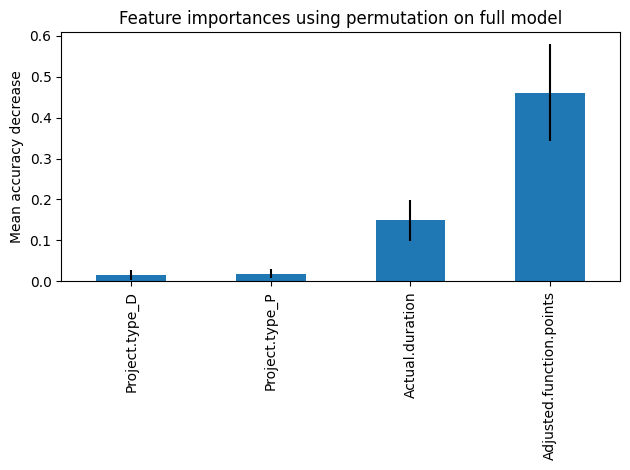

In [ ]:
# Uso de permutation importance
permu = permutation_importance(modelo_voting, x_test, y_test, n_repeats=20, random_state=42, n_jobs=2)
permu_importances = pd.Series(permu.importances_mean.round(3), index=feature_names)[permu.importances_mean.round(3) > 0.000]
fig, ax = plt.subplots()
permu_importances.plot.bar(yerr=permu.importances_std[permu.importances_mean.round(3) > 0.000], ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

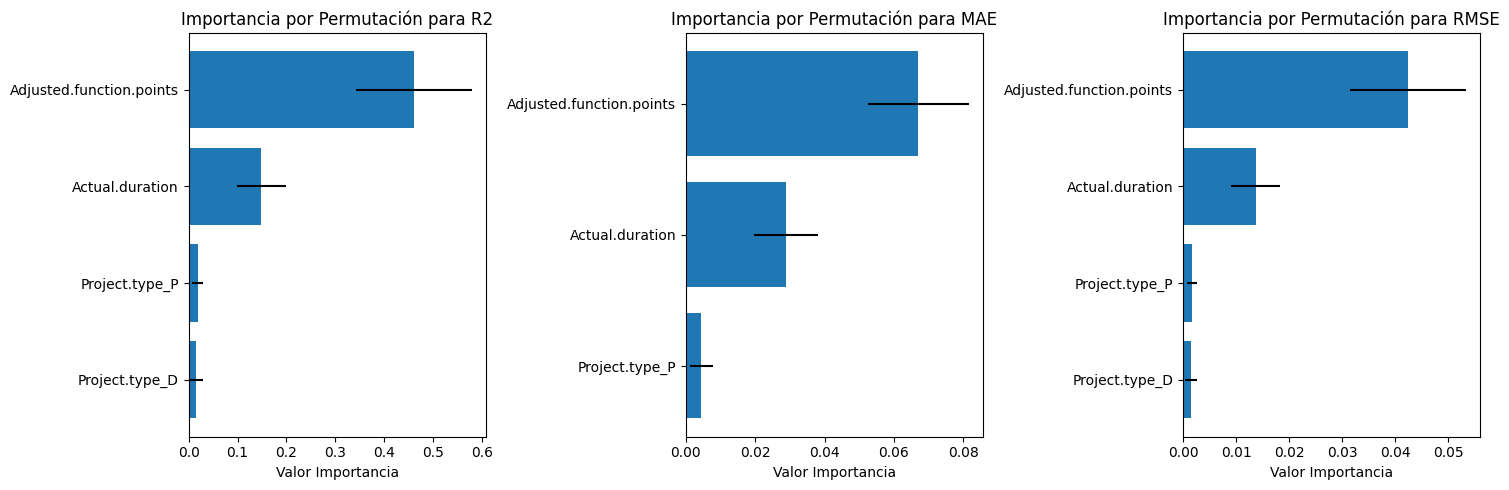

In [ ]:
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']
metric_names = ['R2', 'MAE', 'RMSE']

permu_score = permutation_importance(modelo_voting, x_test, y_test, n_repeats=20, random_state=42, scoring=scoring)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Itera a través de las métricas
for i, metric in enumerate(scoring):
    permu = permu_score[metric]

    # Filtra las características que cumplen la condición
    filtered_indices = [j for j in range(len(permu.importances_mean)) if permu.importances_mean[j].round(3) > 0.000]
    sorted_feature_names = [feature_names[j] for j in filtered_indices]
    importances_mean = permu.importances_mean[filtered_indices]
    importances_std = permu.importances_std[filtered_indices]

    # Ordena los datos por importancia de mayor a menor
    sorted_indices = np.argsort(importances_mean)[::1]
    sorted_feature_names = [sorted_feature_names[j] for j in sorted_indices]
    importances_mean = importances_mean[sorted_indices]
    importances_std = importances_std[sorted_indices]

    # Crea la representación gráfica en el subplot correspondiente
    axs[i].barh(range(len(sorted_feature_names)), importances_mean, xerr=importances_std, align='center')
    axs[i].set_yticks(range(len(sorted_feature_names)))
    axs[i].set_yticklabels(sorted_feature_names)
    axs[i].set_xlabel('Valor Importancia')
    axs[i].set_title(f'Importancia por Permutación para {metric_names[i]}')

# Ajusta los espacios entre subplots y muestra la figura
plt.tight_layout()
plt.show()

In [ ]:
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']

# Crea un diccionario para almacenar los DataFrames
results_global_vot = {}

permu_score = permutation_importance(modelo_voting, x_test, y_test, n_repeats=20, random_state=42, scoring=scoring)
for i, metric in enumerate(scoring):
  permu = permu_score[metric]

  # Filtra las características que cumplen la condición
  filtered_indices = [j for j in range(len(permu.importances_mean)) if permu.importances_mean[j].round(3) > 0.000]
  sorted_feature_names = [feature_names[j] for j in filtered_indices]
  importances_mean = permu.importances_mean[filtered_indices]
  importances_std = permu.importances_std[filtered_indices]



  # Crear un DataFrame con los resultados
  df_exp_global = pd.DataFrame({'Feature': sorted_feature_names,
                       'Importance_Mean': importances_mean,
                       'Importance_Std': importances_std})

  # Ordenar el DataFrame por importance_mean en orden descendente
  df_exp_global = df_exp_global.sort_values(by='Importance_Mean', ascending=False)

  # Asignar el DataFrame al diccionario con el nombre de la métrica
  results_global_vot[f'df_global_{metric_names[i]}'] = df_exp_global

In [ ]:
results_global_vot['df_global_R2']

,Feature,Importance_Mean,Importance_Std
3,Adjusted.function.points,0.460746,0.118396
2,Actual.duration,0.148876,0.050609
1,Project.type_P,0.018474,0.010816
0,Project.type_D,0.015861,0.012522


In [ ]:
results_global_vot['df_global_MAE']

,Feature,Importance_Mean,Importance_Std
2,Adjusted.function.points,0.067024,0.014549
1,Actual.duration,0.028794,0.009206
0,Project.type_P,0.004430,0.003300


In [ ]:
results_global_vot['df_global_RMSE']

,Feature,Importance_Mean,Importance_Std
3,Adjusted.function.points,0.042430,0.010903
2,Actual.duration,0.013710,0.004661
1,Project.type_P,0.001701,0.000996
0,Project.type_D,0.001461,0.001153


**BREAK-DOWN, SHAP Y LIME:**

In [ ]:
#primero definimos el explainer
exp = dx.Explainer(modelo_voting, x_train, y_train)

Preparation of a new explainer is initiated

  -> data              : 94 rows 8 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 94 values
  -> model_class       : sklearn.ensemble._voting.VotingRegressor (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x78483f08c670> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = -0.271, mean = -0.0482, max = 5.84
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.259, mean = 0.0642, max = 5.35
  -> model_info        : package sklearn

A new explainer has been created!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [ ]:
#Primero obtenemos las instancias con valor estimado máximo, minimo y en la mediana.
max_index = np.argmax(y_pred)
min_index = np.argmin(y_pred)
mediana = np.median(y_pred)
#Encontrar el índice de la instancia cuyo valor estimado está en la mediana
median_index = np.argmin(np.abs(y_pred - mediana))

print("Índice de la instancia del conjunto de entrenamiento con mayor esfuerzo estimado es: ", max_index)
print("El valor máximo obtenido es: ", y_pred[max_index])
print("Ínidce de la instancia del conjunto de entrenamiento con menor esfuerzo estimado es: ", min_index)
print("El valor mínimo obtenido es: ", y_pred[min_index])
print("Índice de la instancia del conjunto de entrenamiento con esfuerzo estimado en la mediana: ", median_index)
print("El valor de la mediana es: ", y_pred[median_index])

Índice de la instancia del conjunto de entrenamiento con mayor esfuerzo estimado es:  1
El valor máximo obtenido es:  0.28421945721959524
Ínidce de la instancia del conjunto de entrenamiento con menor esfuerzo estimado es:  6
El valor mínimo obtenido es:  -0.2694768717711071
Índice de la instancia del conjunto de entrenamiento con esfuerzo estimado en la mediana:  24
El valor de la mediana es:  -0.19978662234151176


In [ ]:
df_instancia_max = x_test.iloc[max_index]
df_instancia_median = x_test.iloc[median_index]
df_instancia_min = x_test.iloc[min_index]

In [ ]:
breakdown_max = exp.predict_parts(df_instancia_max, type="break_down",random_state=42)
breakdown_median = exp.predict_parts(df_instancia_median, type="break_down",random_state=42)
breakdown_min = exp.predict_parts(df_instancia_min, type="break_down",random_state=42)

shap_max = exp.predict_parts(df_instancia_max, type="shap",random_state=42)
shap_median = exp.predict_parts(df_instancia_median, type="shap",random_state=42)
shap_min = exp.predict_parts(df_instancia_min, type="shap",random_state=42)

lime_max = exp.predict_surrogate(df_instancia_max, random_state=42)
lime_median = exp.predict_surrogate(df_instancia_median, random_state=42)
lime_min = exp.predict_surrogate(df_instancia_min, random_state=42)

breakdown_df_max = breakdown_max.result
shap_df_max = shap_max.result
lime_df_max=lime_max.result
breakdown_df_median = breakdown_median.result
shap_df_median = shap_median.result
lime_df_median= lime_median.result
breakdown_df_min = breakdown_min.result
shap_df_min = shap_min.result
lime_df_min = lime_min.result

In [ ]:
breakdown_max.plot()
breakdown_median.plot()
breakdown_min.plot()

In [ ]:
shap_max.plot()
shap_median.plot()
shap_min.plot()

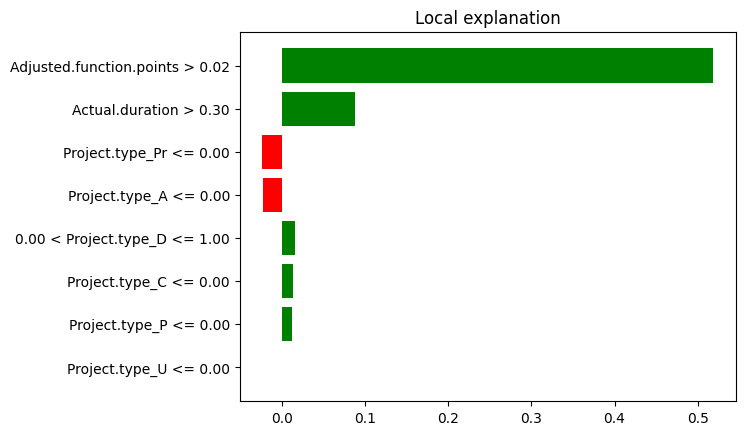

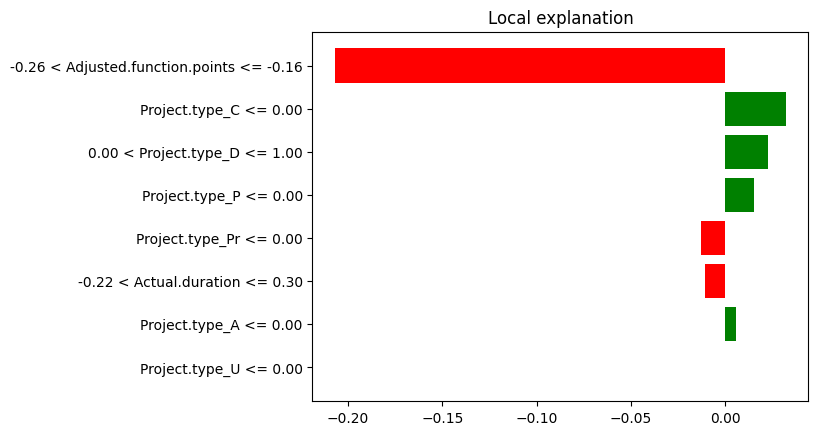

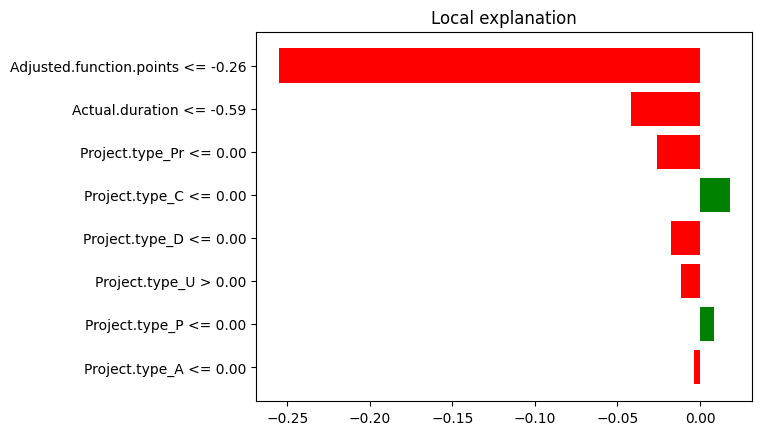

In [ ]:
lime_max.plot()
lime_median.plot()
lime_min.plot()

In [ ]:
lime_max.show_in_notebook()
lime_median.show_in_notebook()
lime_min.show_in_notebook()

### MAX:

In [ ]:
breakdown_df_max = breakdown_df_max.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_max = breakdown_df_max.drop(index=[0, 9])
breakdown_df_max['sign'] = breakdown_df_max['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_max = breakdown_df_max.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_max = shap_df_max.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_max = shap_df_max.tail(8)
shap_df_max['sign'] = shap_df_max['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_max = shap_df_max.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_max["Variable"] = lime_df_max["variable"].str.split(" ").str[0]
lime_df_max["Signo"] = lime_df_max["effect"].apply(evaluar_valor)
lime_df_max = lime_df_max.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_max = lime_df_max.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_max['Ranking'] = breakdown_df_max['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_max.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_max = breakdown_df_max[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_max['Ranking'] = shap_df_max['contribution'].abs().rank(ascending=False).astype(int)
shap_df_max.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_max = shap_df_max[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_max['Ranking'] = lime_df_max['effect'].abs().rank(ascending=False).astype(int)
lime_df_max = lime_df_max.head(5)
lime_df_max = lime_df_max[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_max = breakdown_df_max.drop(columns=['contribution'])
shap_df_max = shap_df_max.drop(columns=['contribution'])
lime_df_max = lime_df_max.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_max = breakdown_df_max.head(5)
breakdown_df_max = breakdown_df_max.reset_index(drop=True)

shap_df_max = shap_df_max.head(5)
shap_df_max = shap_df_max.reset_index(drop=True)

lime_df_max = lime_df_max.reset_index(drop=True)
lime_df_max.at[4, "Variable"] = "Project.type_D"

print(breakdown_df_max)
print(shap_df_max)
print(lime_df_max)

                   Variable  Ranking     Signo
0  Adjusted.function.points        1  Positivo
1           Actual.duration        2  Positivo
2            Project.type_D        3  Positivo
3            Project.type_P        4  Positivo
4            Project.type_C        5  Positivo
                   Variable  Ranking     Signo
0  Adjusted.function.points        1  Positivo
1           Actual.duration        2  Positivo
2            Project.type_D        3  Positivo
3            Project.type_P        4  Negativo
4            Project.type_A        5  Negativo
                   Variable  Ranking     Signo
0  Adjusted.function.points        1  Positivo
1           Actual.duration        2  Positivo
2           Project.type_Pr        3  Negativo
3            Project.type_A        4  Negativo
4            Project.type_D        5  Positivo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_max['Variable'])
shapley_features = list(shap_df_max['Variable'])
lime_features = list(lime_df_max['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_max = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_max['Variable'] = list(all_features)
df_final_max= df_final_max[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_max['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_max[breakdown_df_max['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_max[shap_df_max['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_max[lime_df_max['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_max.loc[df_final_max['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_max

['Adjusted.function.points', 'Actual.duration', 'Project.type_D', 'Project.type_P', 'Project.type_C']
['Adjusted.function.points', 'Actual.duration', 'Project.type_D', 'Project.type_P', 'Project.type_A']
['Adjusted.function.points', 'Actual.duration', 'Project.type_Pr', 'Project.type_A', 'Project.type_D']
['Project.type_P', 'Project.type_D', 'Actual.duration', 'Project.type_C', 'Adjusted.function.points', 'Project.type_Pr', 'Project.type_A']


Variable Breakdown           Shapley              Lime  \
                              Ranking     Signo Ranking     Signo Ranking   
0            Project.type_P         4  Positivo       4  Negativo       -   
1            Project.type_D         3  Positivo       3  Positivo       5   
2           Actual.duration         2  Positivo       2  Positivo       2   
3            Project.type_C         5  Positivo       -         -       -   
4  Adjusted.function.points         1  Positivo       1  Positivo       1   
5           Project.type_Pr         -         -       -         -       3   
6            Project.type_A         -         -       5  Negativo       4   

             
      Signo  
0         -  
1  Positivo  
2  Positivo  
3         -  
4  Positivo  
5  Negativo  
6  Negativo

In [ ]:
df_final_max.set_index('Variable', inplace=True)
nuevo_orden = ["Adjusted.function.points", "Actual.duration", "Project.type_D", "Project.type_P", "Project.type_C", "Project.type_A", "Project.type_Pr"]

# Reorganizar el DataFrame según el nuevo orden
df_final_max = df_final_max.reindex(nuevo_orden)

df_final_max

Breakdown           Shapley              Lime  \
                           Ranking     Signo Ranking     Signo Ranking   
Variable                                                                 
Adjusted.function.points         1  Positivo       1  Positivo       1   
Actual.duration                  2  Positivo       2  Positivo       2   
Project.type_D                   3  Positivo       3  Positivo       5   
Project.type_P                   4  Positivo       4  Negativo       -   
Project.type_C                   5  Positivo       -         -       -   
Project.type_A                   -         -       5  Negativo       4   
Project.type_Pr                  -         -       -         -       3   

                                    
                             Signo  
Variable                            
Adjusted.function.points  Positivo  
Actual.duration           Positivo  
Project.type_D            Positivo  
Project.type_P                   -  
Project.type_C                   -  
Project.type_A            Negativo  
Project.type_Pr           Negativo

### MEDIAN:

In [ ]:
breakdown_df_median = breakdown_df_median.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_median = breakdown_df_median.drop(index=[0, 9])
breakdown_df_median['sign'] = breakdown_df_median['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_median = breakdown_df_median.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_median = shap_df_median.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_median = shap_df_median.tail(8)
shap_df_median['sign'] = shap_df_median['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_median = shap_df_median.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_median["Variable"] = lime_df_median["variable"].str.split(" ").str[0]
lime_df_median["Signo"] = lime_df_median["effect"].apply(evaluar_valor)
lime_df_median = lime_df_median.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_median = lime_df_median.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_median['Ranking'] = breakdown_df_median['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_median.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_median = breakdown_df_median[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_median['Ranking'] = shap_df_median['contribution'].abs().rank(ascending=False).astype(int)
shap_df_median.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_median = shap_df_median[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_median['Ranking'] = lime_df_median['effect'].abs().rank(ascending=False).astype(int)
lime_df_median = lime_df_median.head(5)
lime_df_median = lime_df_median[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_median = breakdown_df_median.drop(columns=['contribution'])
shap_df_median = shap_df_median.drop(columns=['contribution'])
lime_df_median = lime_df_median.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_median = breakdown_df_median.head(5)
breakdown_df_median = breakdown_df_median.reset_index(drop=True)

shap_df_median = shap_df_median.head(5)
shap_df_median = shap_df_median.reset_index(drop=True)

lime_df_median = lime_df_median.reset_index(drop=True)
lime_df_median.at[0, "Variable"] = "Adjusted.function.points"
lime_df_median.at[2, "Variable"] = "Project.type_D"

print(breakdown_df_median)
print(shap_df_median)
print(lime_df_median)

                   Variable  Ranking     Signo
0  Adjusted.function.points        1  Negativo
1           Actual.duration        2  Negativo
2            Project.type_P        3  Negativo
3            Project.type_D        4  Positivo
4            Project.type_A        5  Negativo
                   Variable  Ranking     Signo
0  Adjusted.function.points        1  Negativo
1           Actual.duration        2  Negativo
2            Project.type_D        3  Positivo
3            Project.type_P        4  Negativo
4            Project.type_A        5  Negativo
                   Variable  Ranking     Signo
0  Adjusted.function.points        1  Negativo
1            Project.type_C        2  Positivo
2            Project.type_D        3  Positivo
3            Project.type_P        4  Positivo
4           Project.type_Pr        5  Negativo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_median['Variable'])
shapley_features = list(shap_df_median['Variable'])
lime_features = list(lime_df_median['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_median = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_median['Variable'] = list(all_features)
df_final_median= df_final_median[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_median['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_median[breakdown_df_median['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_median[shap_df_median['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_median[lime_df_median['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_median.loc[df_final_median['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_median

['Adjusted.function.points', 'Actual.duration', 'Project.type_P', 'Project.type_D', 'Project.type_A']
['Adjusted.function.points', 'Actual.duration', 'Project.type_D', 'Project.type_P', 'Project.type_A']
['Adjusted.function.points', 'Project.type_C', 'Project.type_D', 'Project.type_P', 'Project.type_Pr']
['Project.type_P', 'Project.type_D', 'Actual.duration', 'Project.type_C', 'Adjusted.function.points', 'Project.type_Pr', 'Project.type_A']


Variable Breakdown           Shapley              Lime  \
                              Ranking     Signo Ranking     Signo Ranking   
0            Project.type_P         3  Negativo       4  Negativo       4   
1            Project.type_D         4  Positivo       3  Positivo       3   
2           Actual.duration         2  Negativo       2  Negativo       -   
3            Project.type_C         -         -       -         -       2   
4  Adjusted.function.points         1  Negativo       1  Negativo       1   
5           Project.type_Pr         -         -       -         -       5   
6            Project.type_A         5  Negativo       5  Negativo       -   

             
      Signo  
0  Positivo  
1  Positivo  
2         -  
3  Positivo  
4  Negativo  
5  Negativo  
6         -

In [ ]:
df_final_median.set_index('Variable', inplace=True)
nuevo_orden = ["Adjusted.function.points", "Actual.duration", "Project.type_P", "Project.type_D", "Project.type_A", "Project.type_C", "Project.type_Pr"]

# Reorganizar el DataFrame según el nuevo orden
df_final_median = df_final_median.reindex(nuevo_orden)

df_final_median

Breakdown           Shapley              Lime  \
                           Ranking     Signo Ranking     Signo Ranking   
Variable                                                                 
Adjusted.function.points         1  Negativo       1  Negativo       1   
Actual.duration                  2  Negativo       2  Negativo       -   
Project.type_P                   3  Negativo       4  Negativo       4   
Project.type_D                   4  Positivo       3  Positivo       3   
Project.type_A                   5  Negativo       5  Negativo       -   
Project.type_C                   -         -       -         -       2   
Project.type_Pr                  -         -       -         -       5   

                                    
                             Signo  
Variable                            
Adjusted.function.points  Negativo  
Actual.duration                  -  
Project.type_P            Positivo  
Project.type_D            Positivo  
Project.type_A                   -  
Project.type_C            Positivo  
Project.type_Pr           Negativo

### MIN:

In [ ]:
breakdown_df_min = breakdown_df_min.loc[:, ['variable_name', 'contribution', 'sign']]
breakdown_df_min = breakdown_df_min.drop(index=[0, 9])
breakdown_df_min['sign'] = breakdown_df_min['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
breakdown_df_min = breakdown_df_min.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

shap_df_min = shap_df_min.loc[:, ['variable_name', 'contribution', 'sign']]
shap_df_min = shap_df_min.tail(8)
shap_df_min['sign'] = shap_df_min['sign'].replace({1.0: 'Positivo', 0.0: 'Nulo', -1.0: 'Negativo'})
shap_df_min = shap_df_min.sort_values(by='contribution', key=lambda x: abs(x), ascending=False)

lime_df_min["Variable"] = lime_df_min["variable"].str.split(" ").str[0]
lime_df_min["Signo"] = lime_df_min["effect"].apply(evaluar_valor)
lime_df_min = lime_df_min.sort_values(by='effect', key=lambda x: abs(x), ascending=False)
lime_df_min = lime_df_min.drop(columns=['variable'])

# Agregar una columna de ranking
breakdown_df_min['Ranking'] = breakdown_df_min['contribution'].abs().rank(ascending=False).astype(int)
breakdown_df_min.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
breakdown_df_min = breakdown_df_min[['Variable', 'Ranking', 'contribution', 'Signo']]

shap_df_min['Ranking'] = shap_df_min['contribution'].abs().rank(ascending=False).astype(int)
shap_df_min.rename(columns={'sign': 'Signo', 'variable_name':'Variable'}, inplace=True)
shap_df_min = shap_df_min[['Variable', 'Ranking', 'contribution', 'Signo']]

lime_df_min['Ranking'] = lime_df_min['effect'].abs().rank(ascending=False).astype(int)
lime_df_min = lime_df_min.head(5)
lime_df_min = lime_df_min[['Variable', 'Ranking', 'effect', 'Signo']]

# Elimino la columna de la contribucion
breakdown_df_min = breakdown_df_min.drop(columns=['contribution'])
shap_df_min = shap_df_min.drop(columns=['contribution'])
lime_df_min = lime_df_min.drop(columns=['effect'])

# Filtrar las 5 primeras contribuciones en valor absoluto
breakdown_df_min = breakdown_df_min.head(5)
breakdown_df_min = breakdown_df_min.reset_index(drop=True)

shap_df_min = shap_df_min.head(5)
shap_df_min = shap_df_min.reset_index(drop=True)

lime_df_min = lime_df_min.reset_index(drop=True)

print(breakdown_df_min)
print(shap_df_min)
print(lime_df_min)

                   Variable  Ranking     Signo
0  Adjusted.function.points        1  Negativo
1           Actual.duration        2  Negativo
2            Project.type_P        3  Negativo
3            Project.type_D        4  Negativo
4            Project.type_A        5  Negativo
                   Variable  Ranking     Signo
0  Adjusted.function.points        1  Negativo
1           Actual.duration        2  Negativo
2            Project.type_P        3  Negativo
3            Project.type_D        4  Negativo
4            Project.type_A        5  Negativo
                   Variable  Ranking     Signo
0  Adjusted.function.points        1  Negativo
1           Actual.duration        2  Negativo
2           Project.type_Pr        3  Negativo
3            Project.type_C        4  Positivo
4            Project.type_D        5  Negativo


In [ ]:
# Obtener todas las características únicas de las tres técnicas
breakdown_features = list(breakdown_df_min['Variable'])
shapley_features = list(shap_df_min['Variable'])
lime_features = list(lime_df_min['Variable'])
all_features = list(set(breakdown_features + shapley_features + lime_features))
all_features = all_features[::-1]

df_final_min = pd.DataFrame(index=range(len(all_features)), columns=columns_multi)
df_final_min['Variable'] = list(all_features)
df_final_min= df_final_min[['Variable', 'Breakdown', 'Shapley', 'Lime']]

print(breakdown_features)
print(shapley_features)
print(lime_features)
print(all_features)

for feature in df_final_min['Variable']:
    # Buscar la característica en el DataFrame de Breakdown
    breakdown_row = breakdown_df_min[breakdown_df_min['Variable'] == feature]
    if not breakdown_row.empty:
        # Si se encuentra, obtener los valores de "Ranking" y "Signo"
        ranking_breakdown = breakdown_row.iloc[0]['Ranking']
        signo_breakdown = breakdown_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Ranking')] = ranking_breakdown
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Signo')] = signo_breakdown
    else:
        # Si no se encuentra, añadir "-"
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Breakdown', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Shapley
    shap_row = shap_df_min[shap_df_min['Variable'] == feature]
    if not shap_row.empty:
        ranking_shap = shap_row.iloc[0]['Ranking']
        signo_shap = shap_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Ranking')] = ranking_shap
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Signo')] = signo_shap
    else:
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Shapley', 'Signo')] = '-'

    # Repetir el proceso para el DataFrame de Lime
    lime_row = lime_df_min[lime_df_min['Variable'] == feature]
    if not lime_row.empty:
        ranking_lime = lime_row.iloc[0]['Ranking']
        signo_lime = lime_row.iloc[0]['Signo']
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Ranking')] = ranking_lime
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Signo')] = signo_lime
    else:
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Ranking')] = '-'
        df_final_min.loc[df_final_min['Variable'] == feature, ('Lime', 'Signo')] = '-'

df_final_min

['Adjusted.function.points', 'Actual.duration', 'Project.type_P', 'Project.type_D', 'Project.type_A']
['Adjusted.function.points', 'Actual.duration', 'Project.type_P', 'Project.type_D', 'Project.type_A']
['Adjusted.function.points', 'Actual.duration', 'Project.type_Pr', 'Project.type_C', 'Project.type_D']
['Project.type_P', 'Project.type_D', 'Actual.duration', 'Project.type_C', 'Adjusted.function.points', 'Project.type_Pr', 'Project.type_A']


Variable Breakdown           Shapley              Lime  \
                              Ranking     Signo Ranking     Signo Ranking   
0            Project.type_P         3  Negativo       3  Negativo       -   
1            Project.type_D         4  Negativo       4  Negativo       5   
2           Actual.duration         2  Negativo       2  Negativo       2   
3            Project.type_C         -         -       -         -       4   
4  Adjusted.function.points         1  Negativo       1  Negativo       1   
5           Project.type_Pr         -         -       -         -       3   
6            Project.type_A         5  Negativo       5  Negativo       -   

             
      Signo  
0         -  
1  Negativo  
2  Negativo  
3  Positivo  
4  Negativo  
5  Negativo  
6         -

In [ ]:
df_final_min.set_index('Variable', inplace=True)
nuevo_orden = ["Adjusted.function.points", "Actual.duration", "Project.type_P", "Project.type_D", "Project.type_A", "Project.type_Pr", "Project.type_C"]

# Reorganizar el DataFrame según el nuevo orden
df_final_min = df_final_min.reindex(nuevo_orden)

df_final_min

Breakdown           Shapley              Lime  \
                           Ranking     Signo Ranking     Signo Ranking   
Variable                                                                 
Adjusted.function.points         1  Negativo       1  Negativo       1   
Actual.duration                  2  Negativo       2  Negativo       2   
Project.type_P                   3  Negativo       3  Negativo       -   
Project.type_D                   4  Negativo       4  Negativo       5   
Project.type_A                   5  Negativo       5  Negativo       -   
Project.type_Pr                  -         -       -         -       3   
Project.type_C                   -         -       -         -       4   

                                    
                             Signo  
Variable                            
Adjusted.function.points  Negativo  
Actual.duration           Negativo  
Project.type_P                   -  
Project.type_D            Negativo  
Project.type_A                   -  
Project.type_Pr           Negativo  
Project.type_C            Positivo

### GLOBAL

In [ ]:
ranking_valores = {
    'Breakdown': [],
    'Shapley': [],
    'Lime': []
}

# Recorre los DataFrames y almacena los pares de valores por técnica
for tecnica in ranking_valores:
    for caracteristica in df_final_max.index:
        ranking = df_final_max[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

    for caracteristica in df_final_median.index:
        ranking = df_final_median[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

    for caracteristica in df_final_min.index:
        ranking = df_final_min[(tecnica, 'Ranking')][caracteristica]
        if ranking != "-":
            ranking_valores[tecnica].append((caracteristica, int(ranking)))

# Calcula el ranking medio por técnica y característica
ranking_medio = {
    'Breakdown': {},
    'Shapley': {},
    'Lime': {}
}

for tecnica, ranking_values in ranking_valores.items():
    for caracteristica, ranking in ranking_values:
        if caracteristica not in ranking_medio[tecnica]:
            ranking_medio[tecnica][caracteristica] = [ranking]
        else:
            ranking_medio[tecnica][caracteristica].append(ranking)

for tecnica, ranking_values in ranking_medio.items():
    for caracteristica in ranking_values:
        ranking_medio[tecnica][caracteristica] = sum(ranking_values[caracteristica]) / len(ranking_values[caracteristica])


# Ahora el conteo de apariciones por característica y técnica
apariciones_count = {
    'Breakdown': {},
    'Shapley': {},
    'Lime': {}
}

for tecnica, ranking_values in ranking_valores.items():
    for caracteristica, _ in ranking_values:
        if caracteristica not in apariciones_count[tecnica]:
            apariciones_count[tecnica][caracteristica] = 1
        else:
            apariciones_count[tecnica][caracteristica] += 1

# Tengo los valores, los conteos de apariciones y los ranking medios por técnica en los respectivos diccionarios
print(ranking_valores)
print(apariciones_count)
print(ranking_medio)

{'Breakdown': [('Adjusted.function.points', 1), ('Actual.duration', 2), ('Project.type_D', 3), ('Project.type_P', 4), ('Project.type_C', 5), ('Adjusted.function.points', 1), ('Actual.duration', 2), ('Project.type_P', 3), ('Project.type_D', 4), ('Project.type_A', 5), ('Adjusted.function.points', 1), ('Actual.duration', 2), ('Project.type_P', 3), ('Project.type_D', 4), ('Project.type_A', 5)], 'Shapley': [('Adjusted.function.points', 1), ('Actual.duration', 2), ('Project.type_D', 3), ('Project.type_P', 4), ('Project.type_A', 5), ('Adjusted.function.points', 1), ('Actual.duration', 2), ('Project.type_P', 4), ('Project.type_D', 3), ('Project.type_A', 5), ('Adjusted.function.points', 1), ('Actual.duration', 2), ('Project.type_P', 3), ('Project.type_D', 4), ('Project.type_A', 5)], 'Lime': [('Adjusted.function.points', 1), ('Actual.duration', 2), ('Project.type_D', 5), ('Project.type_A', 4), ('Project.type_Pr', 3), ('Adjusted.function.points', 1), ('Project.type_P', 4), ('Project.type_D', 3), 

In [ ]:
# Lista de técnicas
techniques = ['Breakdown', 'Shapley', 'Lime']

# Diccionario para almacenar los datos
data_dict = {}

# Crear una lista de todas las características
all_caract = list(set().union(*[set(ranking_medio[technique]) for technique in techniques]))

# Recorrer las técnicas y las características
for technique in techniques:
    caract = list(ranking_medio[technique].keys())
    rank = [ranking_medio[technique].get(c, "-") for c in all_caract]
    apar = [apariciones_count[technique].get(c, "-") for c in all_caract]

    # Agregar los datos al diccionario
    data_dict[(technique, "Ranking Medio")] = rank
    data_dict[(technique, "Conteo")] = apar

# Crear el DataFrame resumen
df_resumen_vot = pd.DataFrame(data_dict, index=all_caract)

df_resumen_vot

Breakdown              Shapley         \
                         Ranking Medio Conteo Ranking Medio Conteo   
Project.type_A                     5.0      2           5.0      3   
Project.type_Pr                      -      -             -      -   
Adjusted.function.points           1.0      3           1.0      3   
Project.type_C                     5.0      1             -      -   
Actual.duration                    2.0      3           2.0      3   
Project.type_D                3.666667      3      3.333333      3   
Project.type_P                3.333333      3      3.666667      3   

                                  Lime         
                         Ranking Medio Conteo  
Project.type_A                4.000000      1  
Project.type_Pr               3.666667      3  
Adjusted.function.points      1.000000      3  
Project.type_C                3.000000      2  
Actual.duration               2.000000      2  
Project.type_D                4.333333      3  
Project.type_P                4.000000      1

In [ ]:
# Calcular el ranking medio general omitiendo los valores "-"
df_resumen_vot[("General", "Ranking")] = df_resumen_vot[[(tech, "Ranking Medio") for tech in techniques]].replace('-', np.nan).mean(axis=1)

# Calcular la suma total de apariciones omitiendo los valores "-"
df_resumen_vot[("General", "Conteo Total")] = df_resumen_vot[[(tech, "Conteo") for tech in techniques]].replace('-', 0).sum(axis=1)

# Mostrar el DataFrame resumen actualizado
df_resumen_vot

Breakdown              Shapley         \
                         Ranking Medio Conteo Ranking Medio Conteo   
Project.type_A                     5.0      2           5.0      3   
Project.type_Pr                      -      -             -      -   
Adjusted.function.points           1.0      3           1.0      3   
Project.type_C                     5.0      1             -      -   
Actual.duration                    2.0      3           2.0      3   
Project.type_D                3.666667      3      3.333333      3   
Project.type_P                3.333333      3      3.666667      3   

                                  Lime          General               
                         Ranking Medio Conteo   Ranking Conteo Total  
Project.type_A                4.000000      1  4.666667            6  
Project.type_Pr               3.666667      3  3.666667            3  
Adjusted.function.points      1.000000      3  1.000000            9  
Project.type_C                3.000000      2  4.000000            3  
Actual.duration               2.000000      2  2.000000            8  
Project.type_D                4.333333      3  3.777778            9  
Project.type_P                4.000000      1  3.666667            7

In [ ]:
# Obtener el número de características
num_caract = df_resumen_vot.shape[0]

# Calcular el peso para el ranking y apariciones
df_resumen_vot[("General", "Peso Rango")] = 1 - ((df_resumen_vot[("General", "Ranking")].rank(ascending=True) - 1) / num_caract)
df_resumen_vot[("General", "Peso Conteo")] = df_resumen_vot[("General", "Conteo Total")].rank(ascending=True) / num_caract

# Calcular el puntaje final como suma de los pesos
df_resumen_vot[("General", "Puntaje")] = df_resumen_vot[("General", "Peso Rango")] + df_resumen_vot[("General", "Peso Conteo")]
df_resumen_vot[("General", "Ranking")] = df_resumen_vot[("General", "Puntaje")].rank(ascending=False, method="min")

# Eliminar la subcolumnas innecesarias
df_resumen_vot.drop("Peso Rango", axis=1, level=1, inplace=True)
df_resumen_vot.drop("Peso Conteo", axis=1, level=1, inplace=True)
df_resumen_vot.drop("Puntaje", axis=1, level=1, inplace=True)

df_resumen_vot

Breakdown              Shapley         \
                         Ranking Medio Conteo Ranking Medio Conteo   
Project.type_A                     5.0      2           5.0      3   
Project.type_Pr                      -      -             -      -   
Adjusted.function.points           1.0      3           1.0      3   
Project.type_C                     5.0      1             -      -   
Actual.duration                    2.0      3           2.0      3   
Project.type_D                3.666667      3      3.333333      3   
Project.type_P                3.333333      3      3.666667      3   

                                  Lime        General               
                         Ranking Medio Conteo Ranking Conteo Total  
Project.type_A                4.000000      1     6.0            6  
Project.type_Pr               3.666667      3     5.0            3  
Adjusted.function.points      1.000000      3     1.0            9  
Project.type_C                3.000000      2     7.0            3  
Actual.duration               2.000000      2     2.0            8  
Project.type_D                4.333333      3     3.0            9  
Project.type_P                4.000000      1     4.0            7

In [ ]:
# Obtener las columnas actuales del DataFrame
columns = df_resumen_vot.columns

# Extraer las columnas de "General" y sus subcolumnas
general_columns = columns.get_level_values(0) == "General"

# Crear una lista con las subcolumnas de "General"
general_subcolumns = [("General", "Ranking"), ("General", "Conteo Total")]

# Crear una lista con las subcolumnas asociadas a las técnicas
technique_subcolumns = list(columns[~general_columns])

# Reorganizar las columnas para mover "General" al principio
new_columns = general_subcolumns + technique_subcolumns

# Crear un nuevo DataFrame con las columnas reorganizadas
df_resumen_vot = df_resumen_vot[new_columns]

In [ ]:
df_resumen_vot.sort_values(by=("General", "Ranking"), ascending=True, inplace=True)

# Formatear los valores
for tech in techniques:
    df_resumen_vot[(tech, "Ranking Medio")] = df_resumen_vot[(tech, "Ranking Medio")].apply(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)

df_resumen_vot

General                  Breakdown         \
                         Ranking Conteo Total Ranking Medio Conteo   
Adjusted.function.points     1.0            9          1.00      3   
Actual.duration              2.0            8          2.00      3   
Project.type_D               3.0            9          3.67      3   
Project.type_P               4.0            7          3.33      3   
Project.type_Pr              5.0            3             -      -   
Project.type_A               6.0            6          5.00      2   
Project.type_C               7.0            3          5.00      1   

                               Shapley                 Lime         
                         Ranking Medio Conteo Ranking Medio Conteo  
Adjusted.function.points          1.00      3          1.00      3  
Actual.duration                   2.00      3          2.00      2  
Project.type_D                    3.33      3          4.33      3  
Project.type_P                    3.67      3          4.00      1  
Project.type_Pr                      -      -          3.67      3  
Project.type_A                    5.00      3          4.00      1  
Project.type_C                       -      -          3.00      2

## Local Datasets

In [ ]:
# Lista de DataFrames resumen y algoritmo
dfs_resumen = [df_resumen_svr, df_resumen_rf, df_resumen_gbr, df_resumen_vot]
algorithms = ['SVR', 'RF', 'GBR', 'VOT']

# Crear un conjunto de índices único
index_set = set()

# Iterar sobre cada DataFrame resumen y agregar sus índices al conjunto
for df_resumen in dfs_resumen:
    index_set.update(df_resumen.index)
index_list = list(index_set)

# Crear un nuevo DataFrame para el resultado final
df_resumen_final = pd.DataFrame(index=index_list)

# Agregar las columnas de "General" con "Ranking" y "Conteo Total" para cada algoritmo
for algorithm, df_resumen in zip(algorithms, dfs_resumen):
    df_resumen_final[(algorithm, 'Ranking')] = df_resumen[('General', 'Ranking')]
    df_resumen_final[(algorithm, 'Conteo Total')] = df_resumen[('General', 'Conteo Total')]

# Rellenar el DataFrame final con datos o '-'
df_resumen_final = df_resumen_final.fillna('-')

# Calcular el ranking final promediando los rankings de las técnicas
df_resumen_final["Ranking Final"] = df_resumen_final[[(algo, "Ranking") for algo in algorithms]].replace('-', np.nan).mean(axis=1)

# Calcular la suma total de apariciones omitiendo los valores "-"
df_resumen_final[("Conteo Final")] = df_resumen_final[[(algo, "Conteo Total") for algo in algorithms]].replace('-', 0).sum(axis=1)

# Obtener el número de características
num_caract = df_resumen_final.shape[0]

# Calcular el peso para el ranking y apariciones
df_resumen_final[("Peso Rango")] = 1 - ((df_resumen_final[("Ranking Final")].rank(ascending=True) - 1) / num_caract)
df_resumen_final[("Peso Conteo")] = df_resumen_final[("Conteo Final")].rank(ascending=True) / num_caract

# Calcular el puntaje final como suma de los pesos
df_resumen_final[("Puntaje")] = df_resumen_final[("Peso Rango")] + df_resumen_final[("Peso Conteo")]
df_resumen_final[("Ranking Final")] = df_resumen_final[("Puntaje")].rank(ascending=False, method="min")


# Eliminar las columnas innecesarias
df_resumen_final.drop("Peso Rango", axis=1, inplace=True)
df_resumen_final.drop("Peso Conteo", axis=1, inplace=True)
df_resumen_final.drop("Puntaje", axis=1, inplace=True)

df_resumen_final.sort_values(by=("Ranking Final"), ascending=True, inplace=True)

# Formatear los valores
for algo in algorithms:
    df_resumen_final[(algo, "Ranking")] = df_resumen_final[(algo, "Ranking")].apply(lambda x: f"{x:.0f}" if isinstance(x, (int, float)) else x)
    df_resumen_final[(algo, "Conteo Total")] = df_resumen_final[(algo, "Conteo Total")].apply(lambda x: f"{x:.0f}" if isinstance(x, (int, float)) else x)

df_resumen_final[("Ranking Final")] = df_resumen_final[("Ranking Final")].apply(lambda x: f"{x:.0f}" if isinstance(x, (int, float)) else x)
df_resumen_final[("Conteo Final")] = df_resumen_final[("Conteo Final")].apply(lambda x: f"{x:.0f}" if isinstance(x, (int, float)) else x)

df_resumen_final

,"(SVR, Ranking)","(SVR, Conteo Total)","(RF, Ranking)","(RF, Conteo Total)","(GBR, Ranking)","(GBR, Conteo Total)","(VOT, Ranking)","(VOT, Conteo Total)",Ranking Final,Conteo Final
Adjusted.function.points,1,9,1,9,1,9,1,9,1,36
Actual.duration,3,8,2,9,2,9,2,8,2,34
Project.type_P,2,9,3,9,3,9,4,7,3,34
Project.type_D,6,6,4,6,4,8,3,9,4,29
Project.type_A,7,1,6,6,6,6,6,6,5,19
Project.type_Pr,4,3,4,3,4,3,5,3,6,12
Project.type_C,5,8,7,3,-,-,7,3,7,14
Project.type_U,7,1,-,-,-,-,-,-,8,1


In [ ]:
# Lista de DataFrames resumen y algoritmo
dfs_resumen = [df_resumen_svr, df_resumen_rf, df_resumen_gbr, df_resumen_vot]
algorithms = ['SVR', 'RF', 'GBR', 'VOT']

# Crear un conjunto de índices único
index_set = set()

# Iterar sobre cada DataFrame resumen y agregar sus índices al conjunto
for df_resumen in dfs_resumen:
    index_set.update(df_resumen.index)

index_list = list(index_set)

# Crear un nuevo DataFrame para el resultado final con los índices únicos
df_resumen_final = pd.DataFrame(index=index_list)

# Agregar las columnas de "General" con "Ranking" y "Conteo Total" para cada algoritmo
for algorithm, df_resumen in zip(algorithms, dfs_resumen):
    df_resumen_final[(algorithm, 'Ranking')] = df_resumen[('General', 'Ranking')]
    df_resumen_final[(algorithm, 'Conteo Total')] = df_resumen[('General', 'Conteo Total')]

# Rellenar el DataFrame final con datos o '-'
df_resumen_final = df_resumen_final.fillna('-')

# Calcular el ranking final promediando los rankings de las técnicas
df_resumen_final["Ranking Final"] = df_resumen_final[[(algo, "Ranking") for algo in algorithms]].replace('-', np.nan).mean(axis=1)

# Calcular la suma total de apariciones omitiendo los valores "-"
df_resumen_final["Conteo Final"] = df_resumen_final[[(algo, "Conteo Total") for algo in algorithms]].replace('-', 0).sum(axis=1)

# Obtener el número de características
num_caract = df_resumen_final.shape[0]

# Calcular el peso para el ranking y apariciones
df_resumen_final[("Peso Rango")] = 1 - ((df_resumen_final[("Ranking Final")].rank(ascending=True) - 1) / num_caract)
df_resumen_final[("Peso Conteo")] = df_resumen_final[("Conteo Final")].rank(ascending=True) / num_caract

# Calcular el puntaje final como suma de los pesos
df_resumen_final[("Puntaje")] = df_resumen_final[("Peso Rango")] + df_resumen_final[("Peso Conteo")]
df_resumen_final[("Ranking Final")] = df_resumen_final[("Puntaje")].rank(ascending=False, method="min")

# Eliminar las subcolumnas innecesarias
df_resumen_final.drop("Peso Rango", axis=1, inplace=True)
df_resumen_final.drop("Peso Conteo", axis=1, inplace=True)
df_resumen_final.drop("Puntaje", axis=1, inplace=True)

df_resumen_final.sort_values(by=("Ranking Final"), ascending=True, inplace=True)

df_resumen_final

,"(SVR, Ranking)","(SVR, Conteo Total)","(RF, Ranking)","(RF, Conteo Total)","(GBR, Ranking)","(GBR, Conteo Total)","(VOT, Ranking)","(VOT, Conteo Total)",Ranking Final,Conteo Final
Adjusted.function.points,1.0,9,1.0,9.0,1.0,9.0,1.0,9.0,1.0,36.0
Actual.duration,3.0,8,2.0,9.0,2.0,9.0,2.0,8.0,2.0,34.0
Project.type_P,2.0,9,3.0,9.0,3.0,9.0,4.0,7.0,3.0,34.0
Project.type_D,6.0,6,4.0,6.0,4.0,8.0,3.0,9.0,4.0,29.0
Project.type_A,7.0,1,6.0,6.0,6.0,6.0,6.0,6.0,5.0,19.0
Project.type_Pr,4.0,3,4.0,3.0,4.0,3.0,5.0,3.0,6.0,12.0
Project.type_C,5.0,8,7.0,3.0,-,-,7.0,3.0,7.0,14.0
Project.type_U,7.0,1,-,-,-,-,-,-,8.0,1.0


# Resultados:

In [ ]:
score_result=score_result.drop("MSE",axis=1)

In [ ]:
score_result

,Modelo,MAE,RMSE,R2,MMRE,PRED(0.25)
0,SVR,0.184283,0.495620,0.377861,0.022127,0.807407
1,RandomForest,0.197110,0.545355,0.316481,0.038677,0.807407
2,GradientBoosting,0.193210,0.529498,0.333070,0.112486,0.822222
3,Voting,0.183787,0.514788,0.399769,0.070145,0.829630


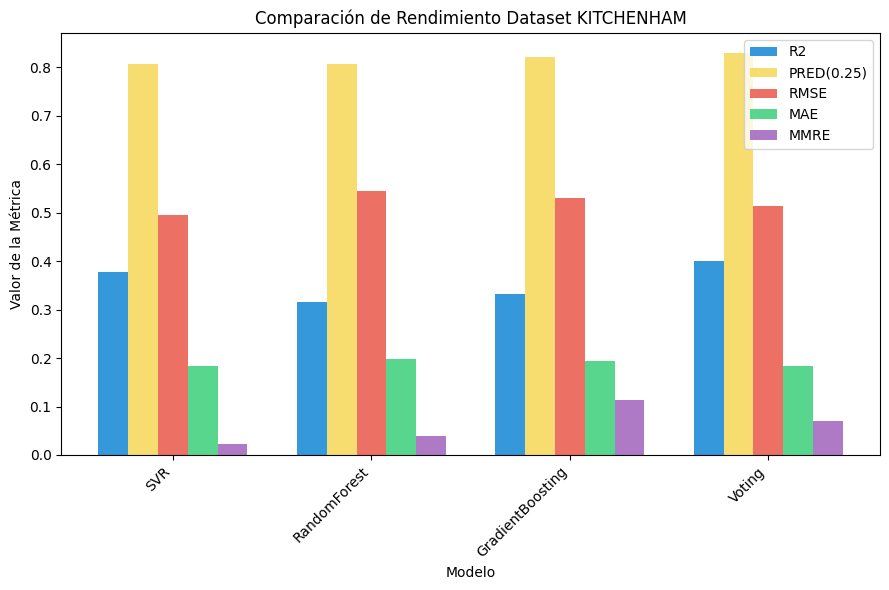

In [ ]:
metricas = ['R2', 'PRED(0.25)', 'RMSE', 'MAE', 'MMRE']
colores = ['#3498DB', '#F7DC6F','#EC7063', '#58D68D', '#AF7AC5']

num_modelos = len(score_result)
ancho_barra = 0.15
x = range(num_modelos)

plt.figure(figsize=(9, 6))

# Crear un gráfico de barras para cada métrica
for i, metrica in enumerate(metricas):
    # Calcular la posición para las barras de esta métrica
    posiciones_x = [pos + i * ancho_barra for pos in x]

    # Obtener los valores de la métrica actual
    valores_metrica = score_result[metrica]

    # Crear las barras para la métrica actual
    plt.bar(
        posiciones_x,
        valores_metrica,
        width=ancho_barra,
        label=metrica,
        color=colores[i],
    )

# Personalizar el gráfico
plt.xlabel('Modelo')
plt.ylabel('Valor de la Métrica')
plt.title('Comparación de Rendimiento Dataset KITCHENHAM')
plt.xticks([pos + (len(metricas) - 1) * ancho_barra / 2 for pos in x], score_result['Modelo'], rotation=45, ha="right")
plt.legend(loc='upper right')

# Mostrar el gráfico combinado
plt.tight_layout()
plt.show()

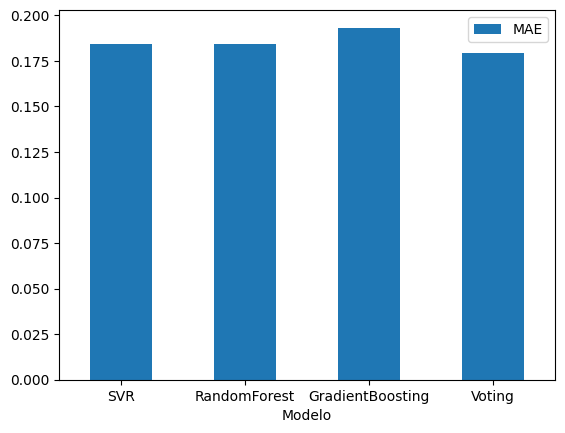

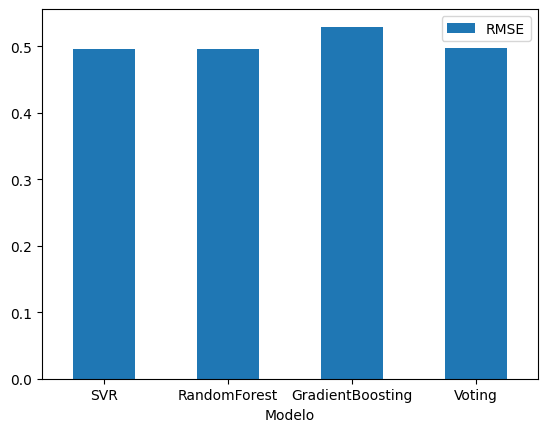

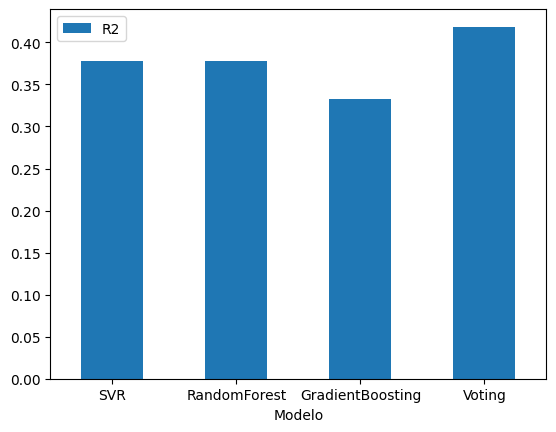

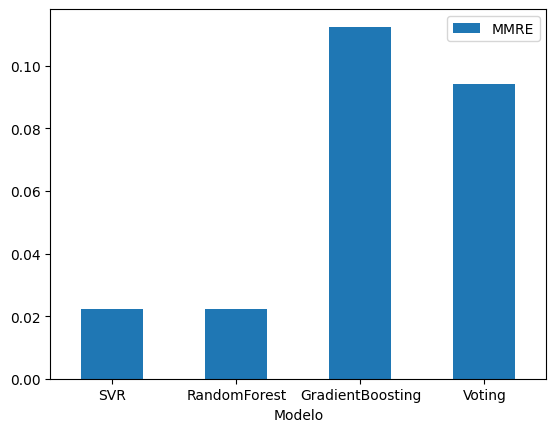

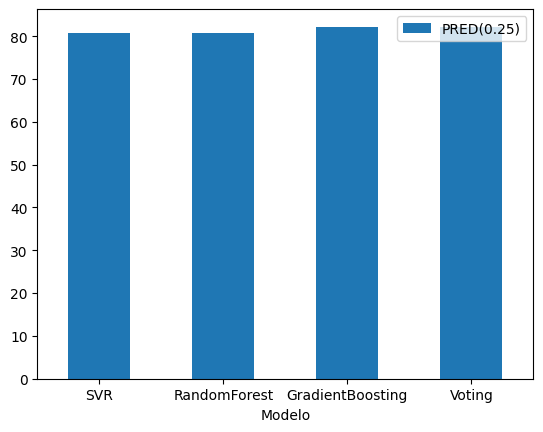

In [ ]:
variables=list(score_result)
variables.pop(0)

for var in variables:
  score_result.plot.bar(x='Modelo', y=var, rot=0)